In [1]:
#load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [2]:
#load both datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
#drop id column because it's not used as predictor but save test.ID in another df for submission purpose 
test_ID = test.Id
train=train.drop(['Id'], axis=1)
test=test.drop(['Id'], axis=1)

Data Cleaning

Handling missing values

In [4]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
# Missing values statistics of test.csv
missing_values = missing_values_table(test)
missing_values

Your selected dataframe has 79 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


In [5]:
# Missing values statistics of test.csv
missing_values = missing_values_table(train)
missing_values

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [6]:
#get info from test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [7]:
#get info from train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


test.csv does not have SalePrice, therefore, train.csv will be used as training and testing before predicting the SalePrice of test.csv
the data types in test.csv are correct and no null values

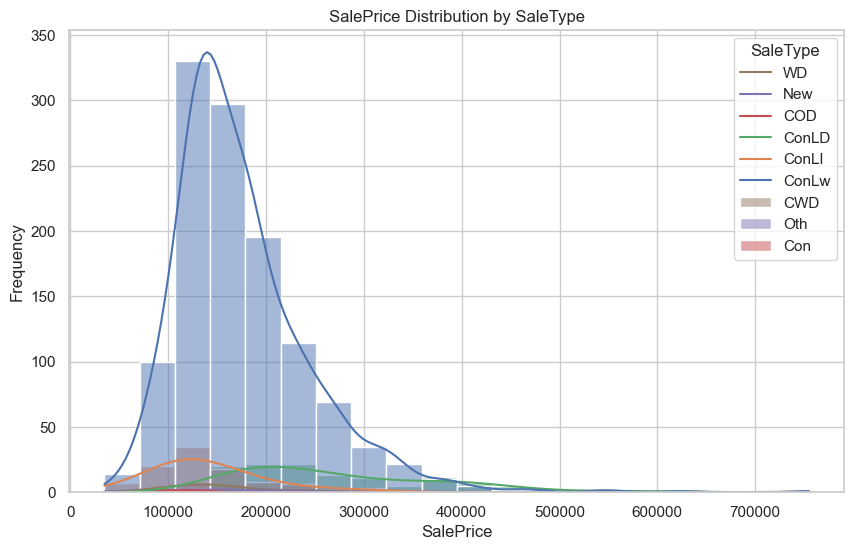

In [11]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='SalePrice', hue='SaleCondition', kde=True, bins=20)
plt.title('SalePrice Distribution by SaleType')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(["WD","New","COD","ConLD","ConLI","ConLw","CWD","Oth","Con"],title='SaleType')
plt.show()

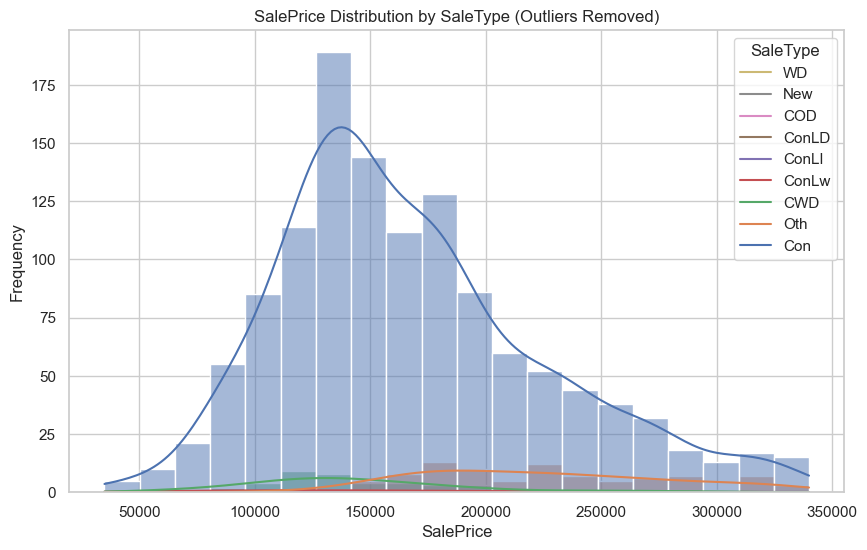

In [12]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_train = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_train, x='SalePrice', hue='SaleType', kde=True, bins=20)
plt.title('SalePrice Distribution by SaleType (Outliers Removed)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(["WD","New","COD","ConLD","ConLI","ConLw","CWD","Oth","Con"],title='SaleType')
plt.show()


In [31]:
def distribution_plot(column):
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")
    
    if train[column].dtype == 'object':
        train[column].value_counts().plot(kind='bar',figsize=(25, 10))
        plt.ylabel("Count")
        plt.xlabel(column)
    else:
        # Calculate the IQR to remove outliers
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        if len(train[column].value_counts()) <= 20:
            #plt.figure(figsize=(10, 10))
            ax=train[column].value_counts().plot(kind='bar',figsize=(25, 10))
            #ax=sns.histplot(train[column],color='g')
            plt.ylabel("Count")
            plt.xlabel(column)
            ax.bar_label(ax.containers[0])
            plt.show()
        else:
            # Remove outliers
            filtered_train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]

            # Create a histogram to visualize income distribution for default and non-default customers
            plt.figure(figsize=(25, 10))
            ax=sns.histplot(filtered_train[column],color='g')
            #ax=filtered_train[column].value_counts().plot(kind='bar')
            ax.bar_label(ax.containers[0])
            plt.show()

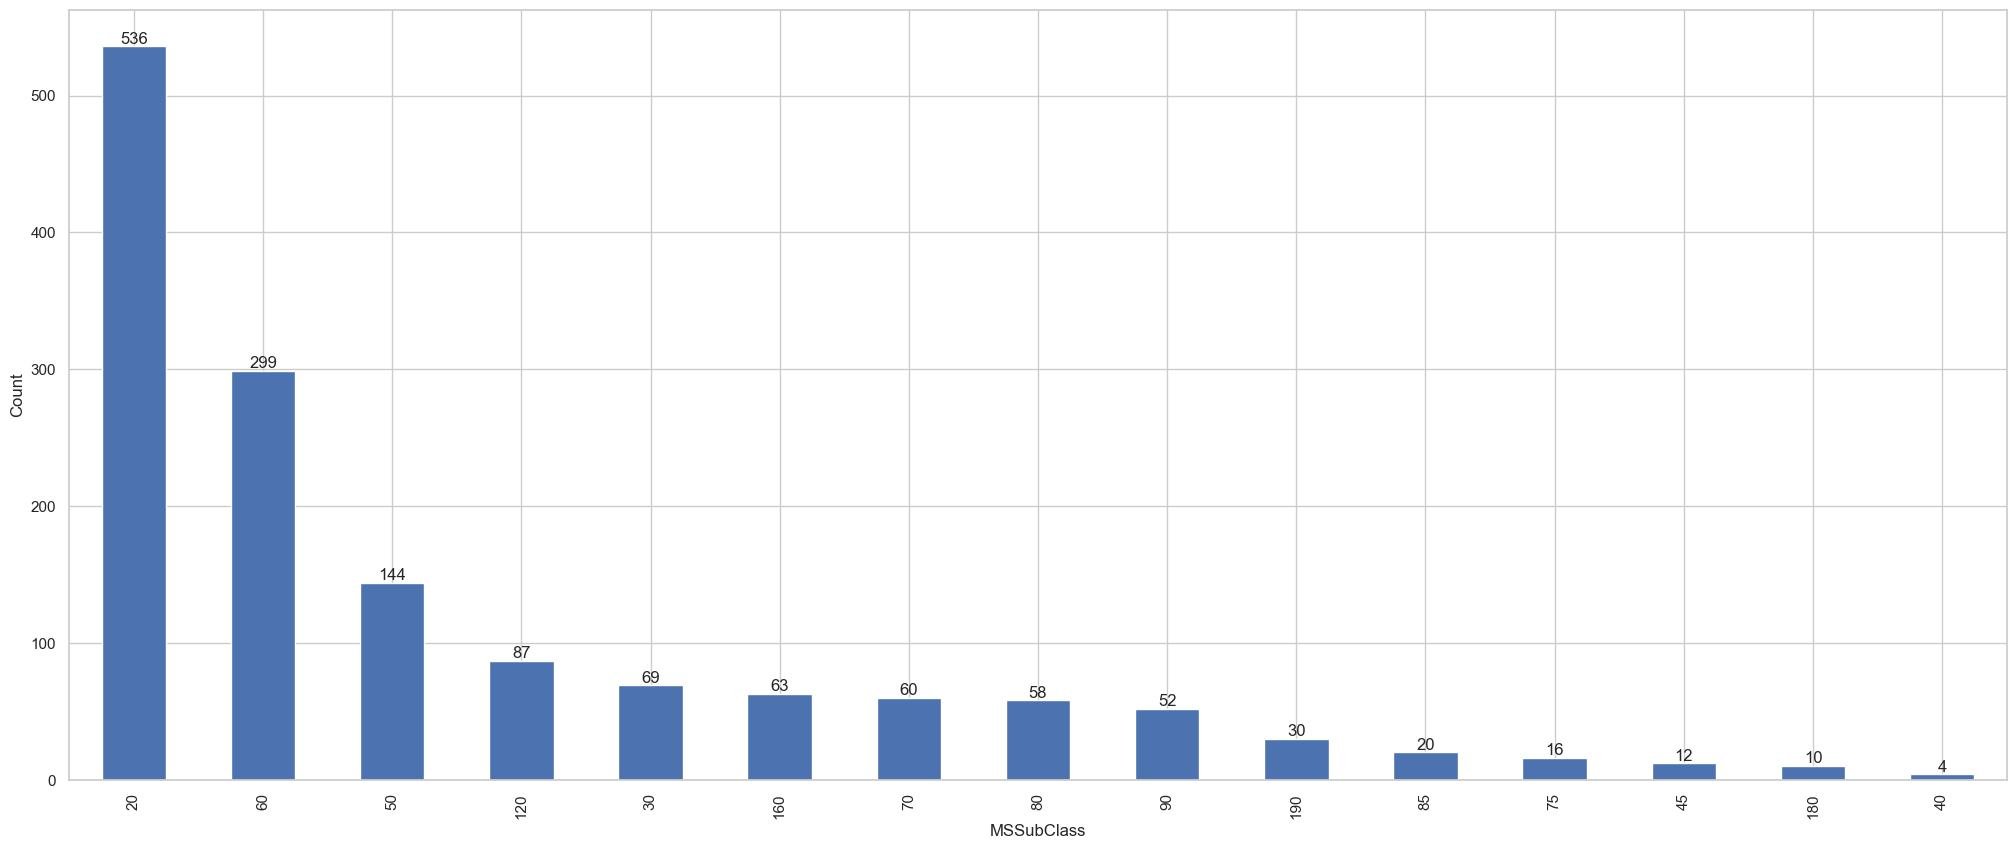

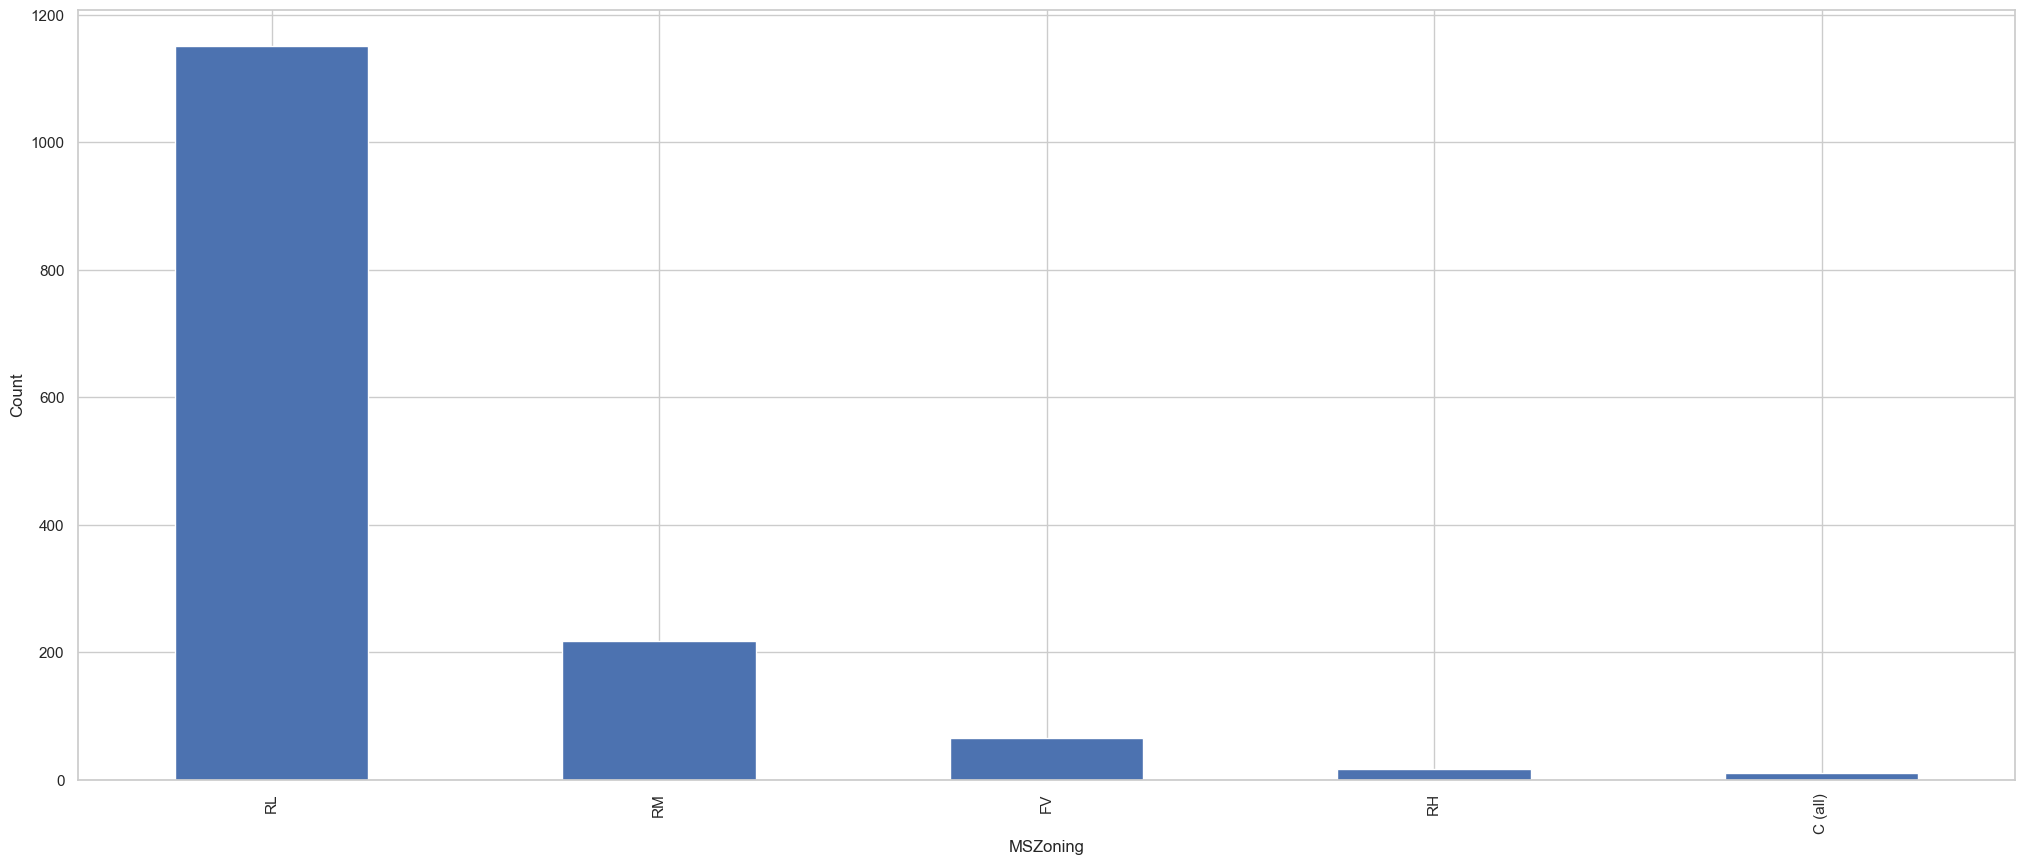

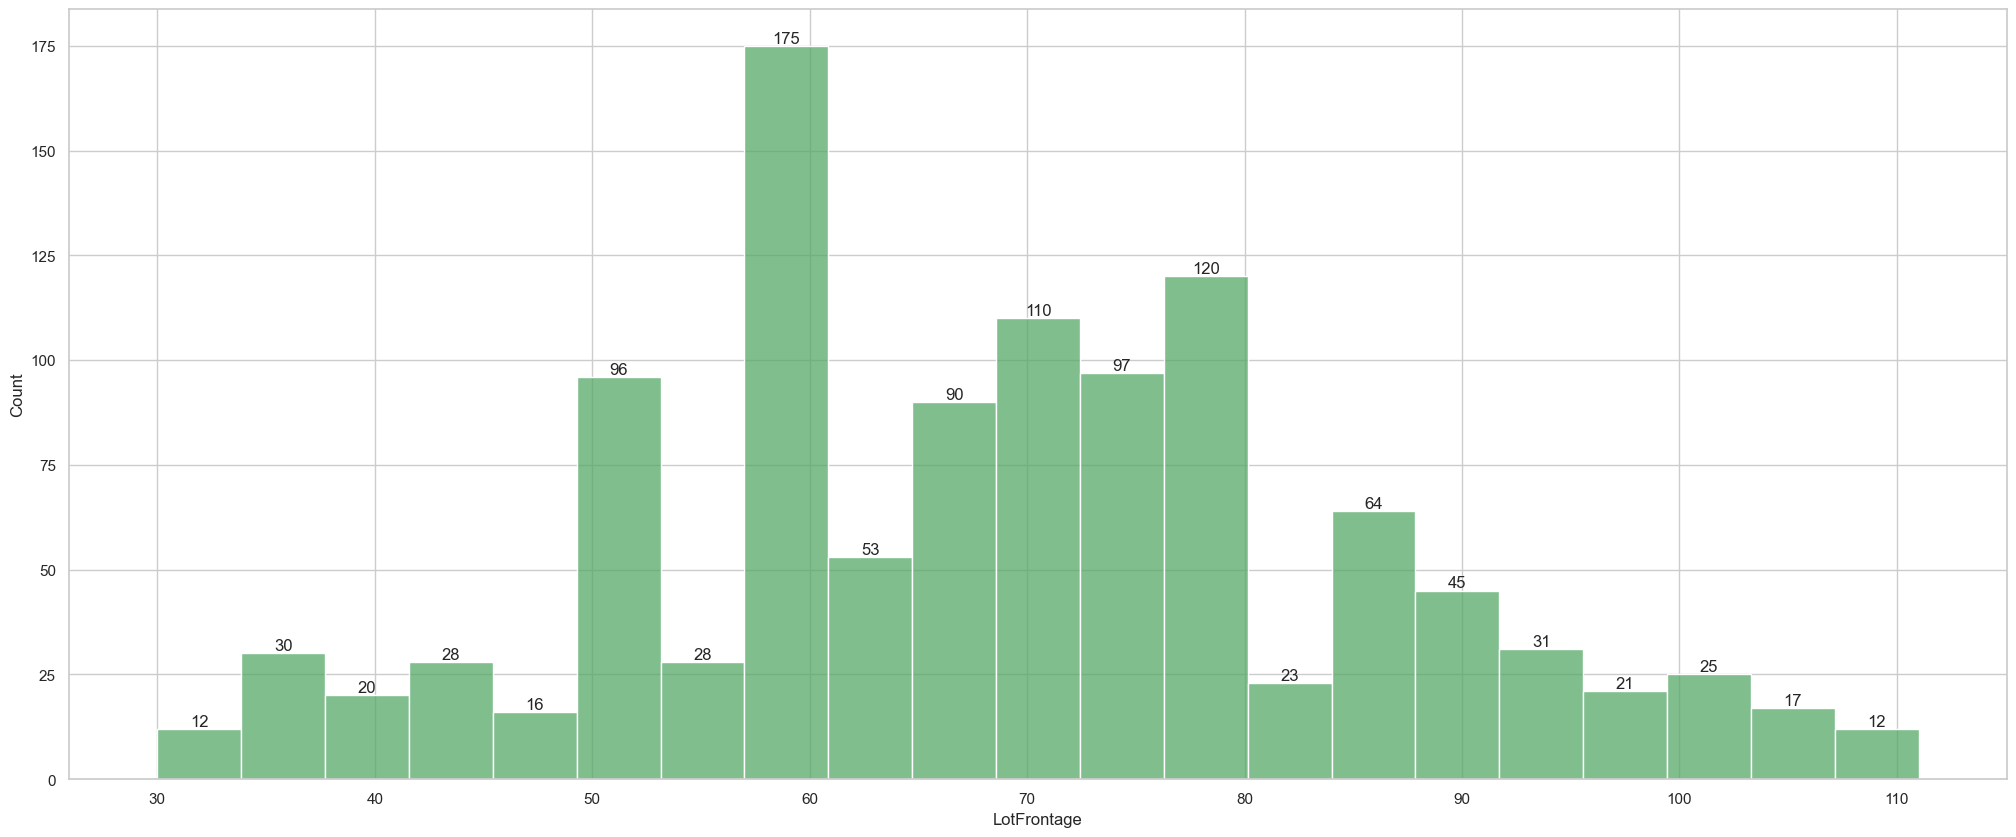

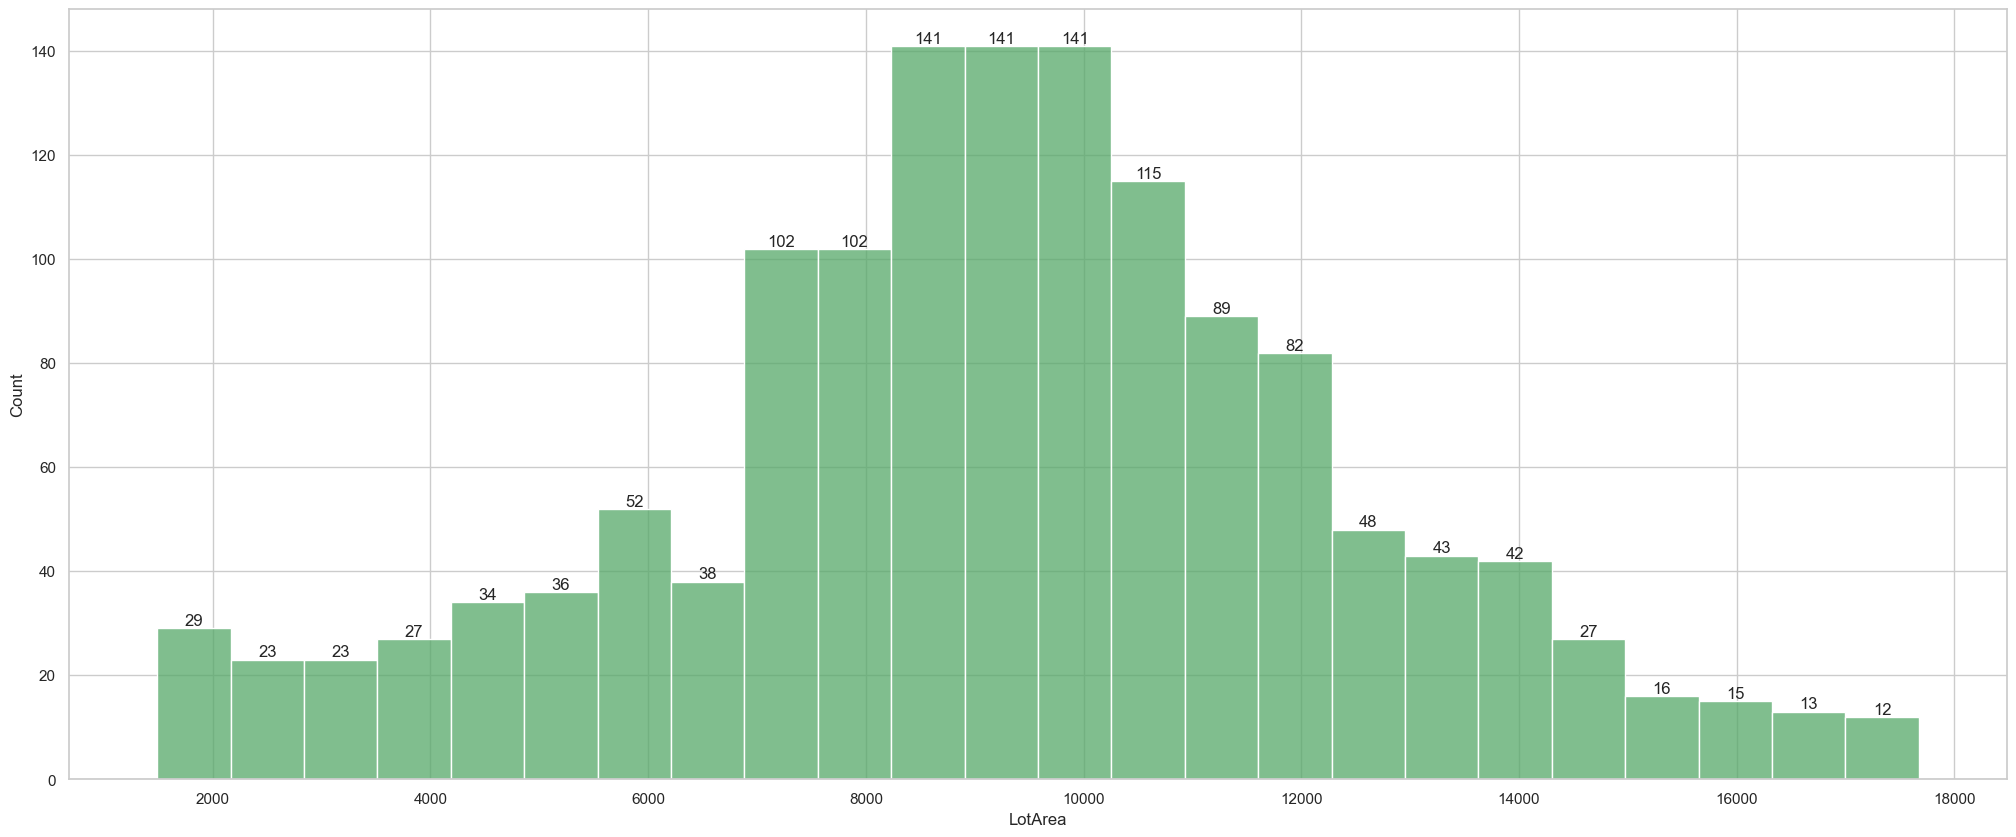

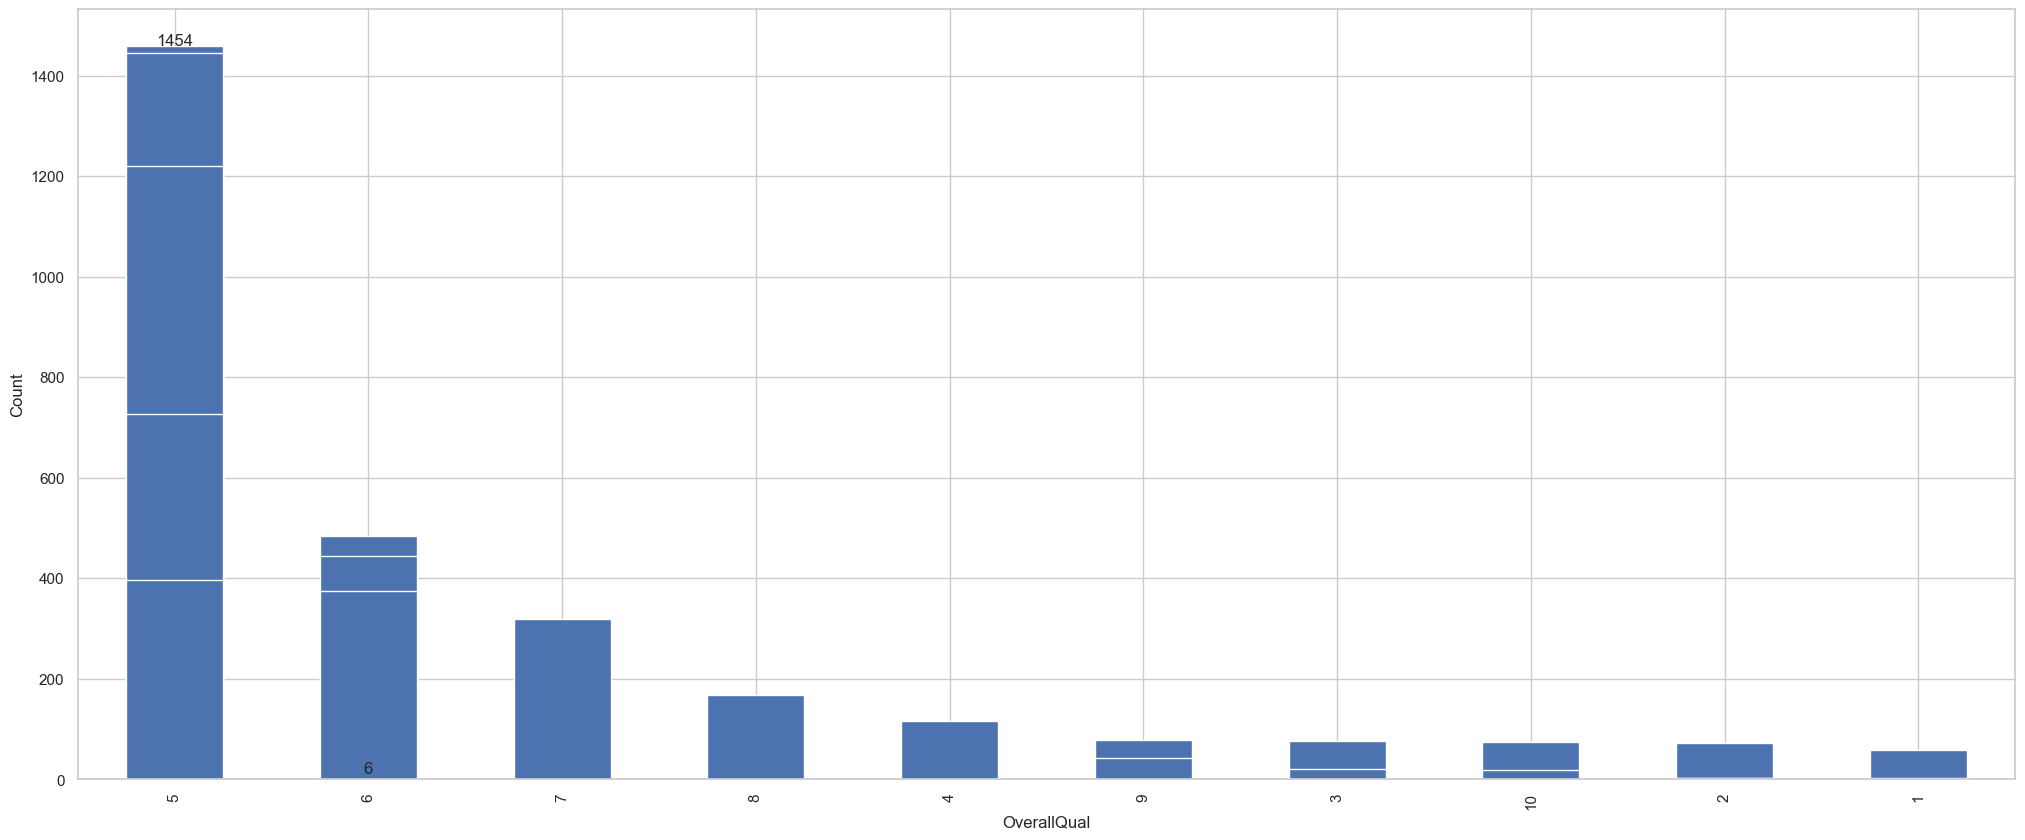

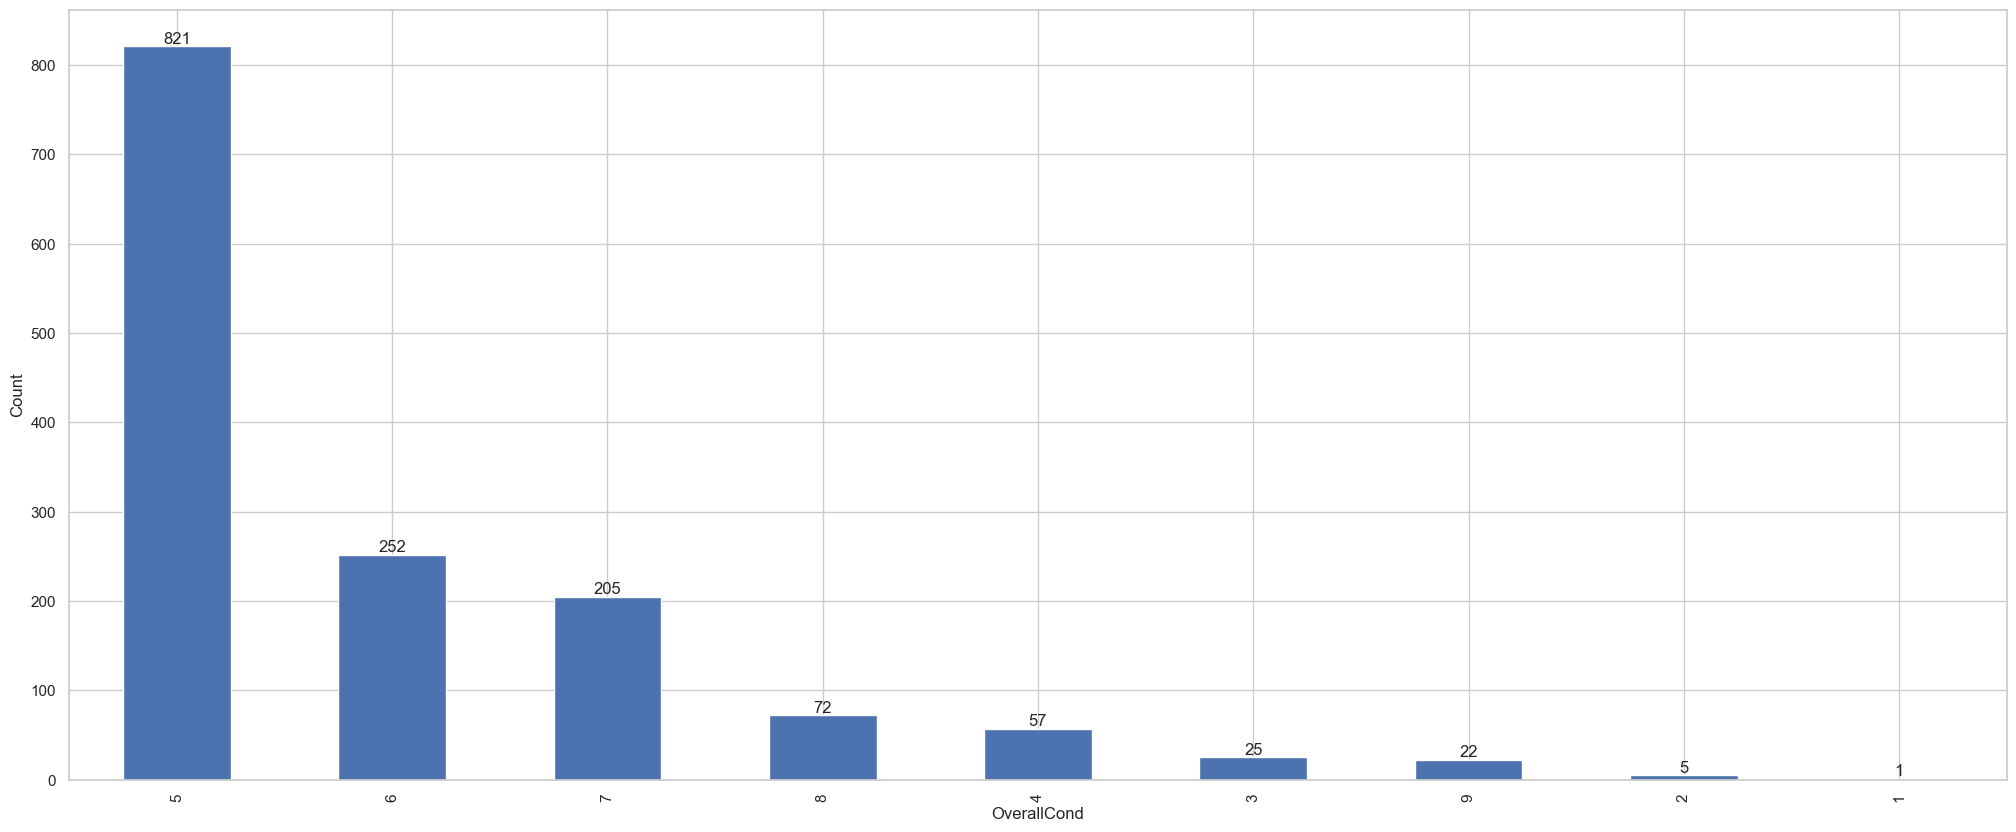

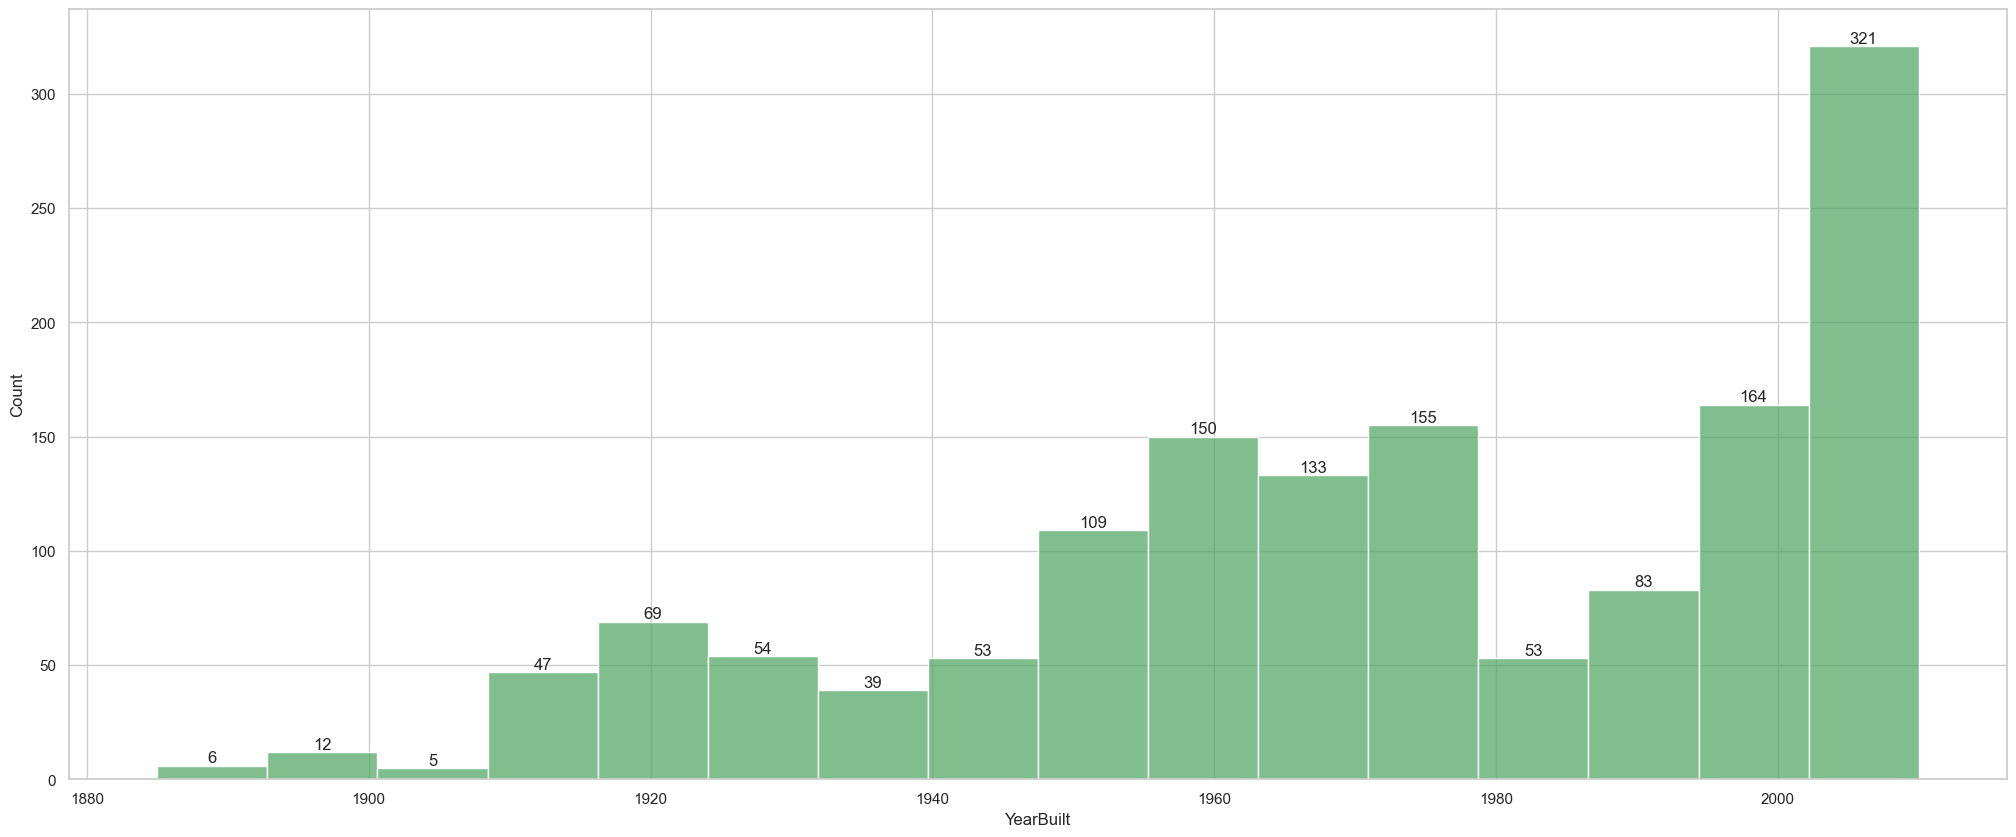

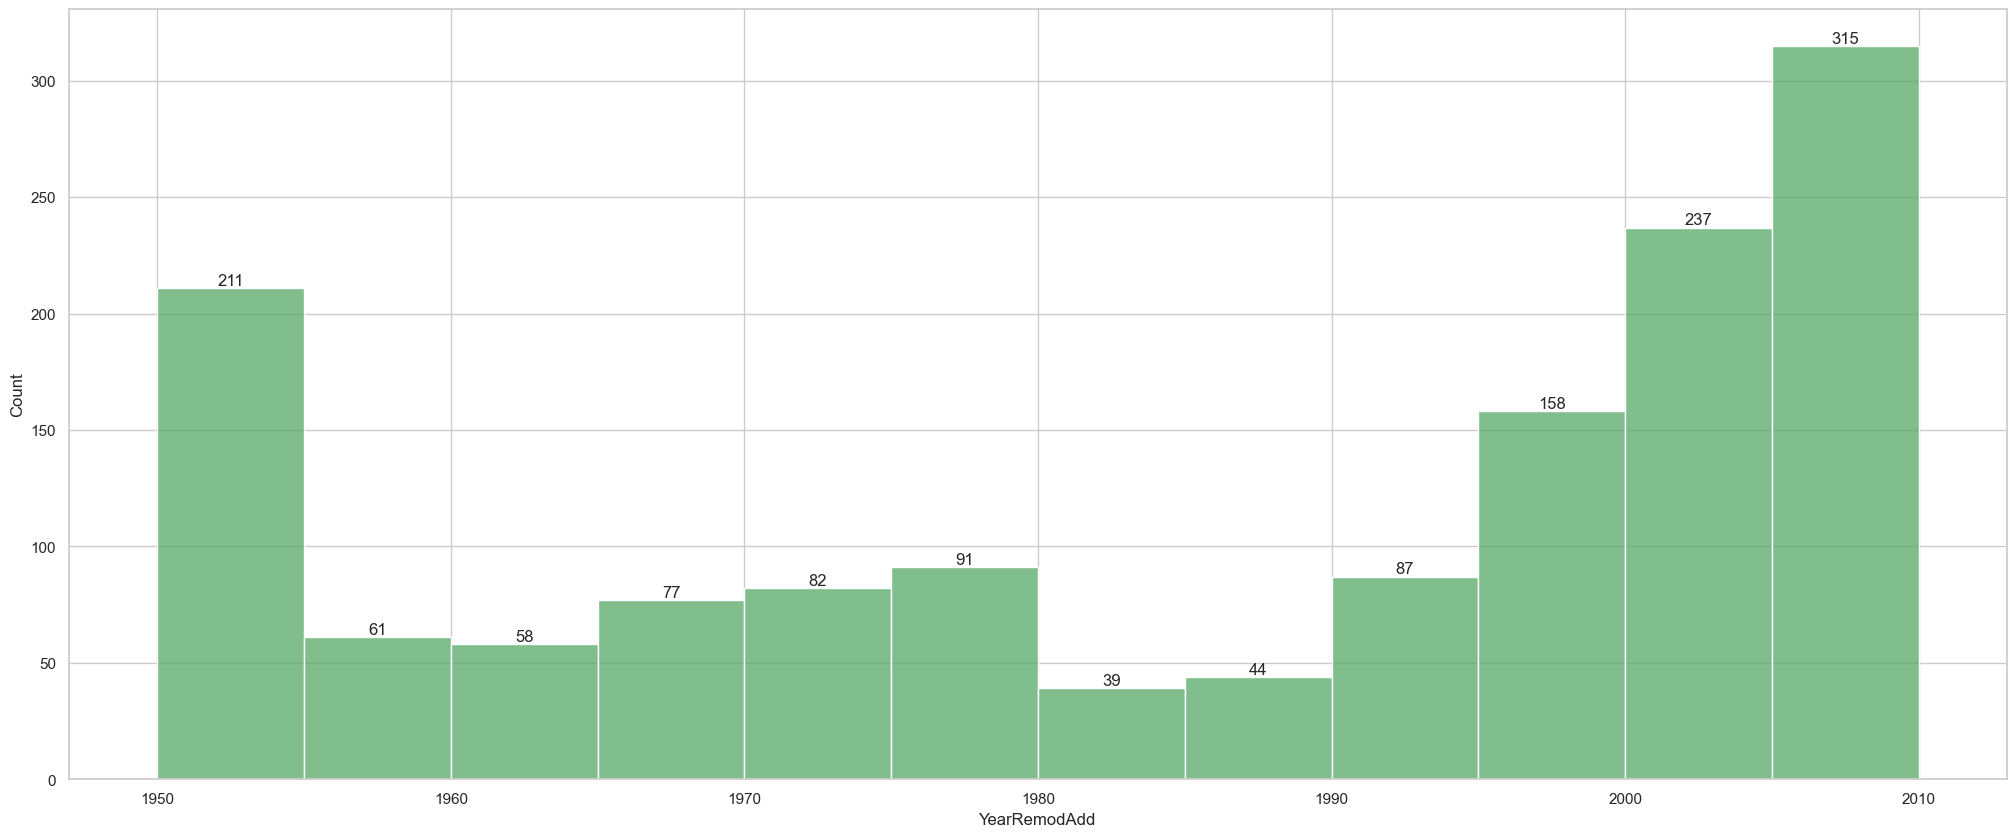

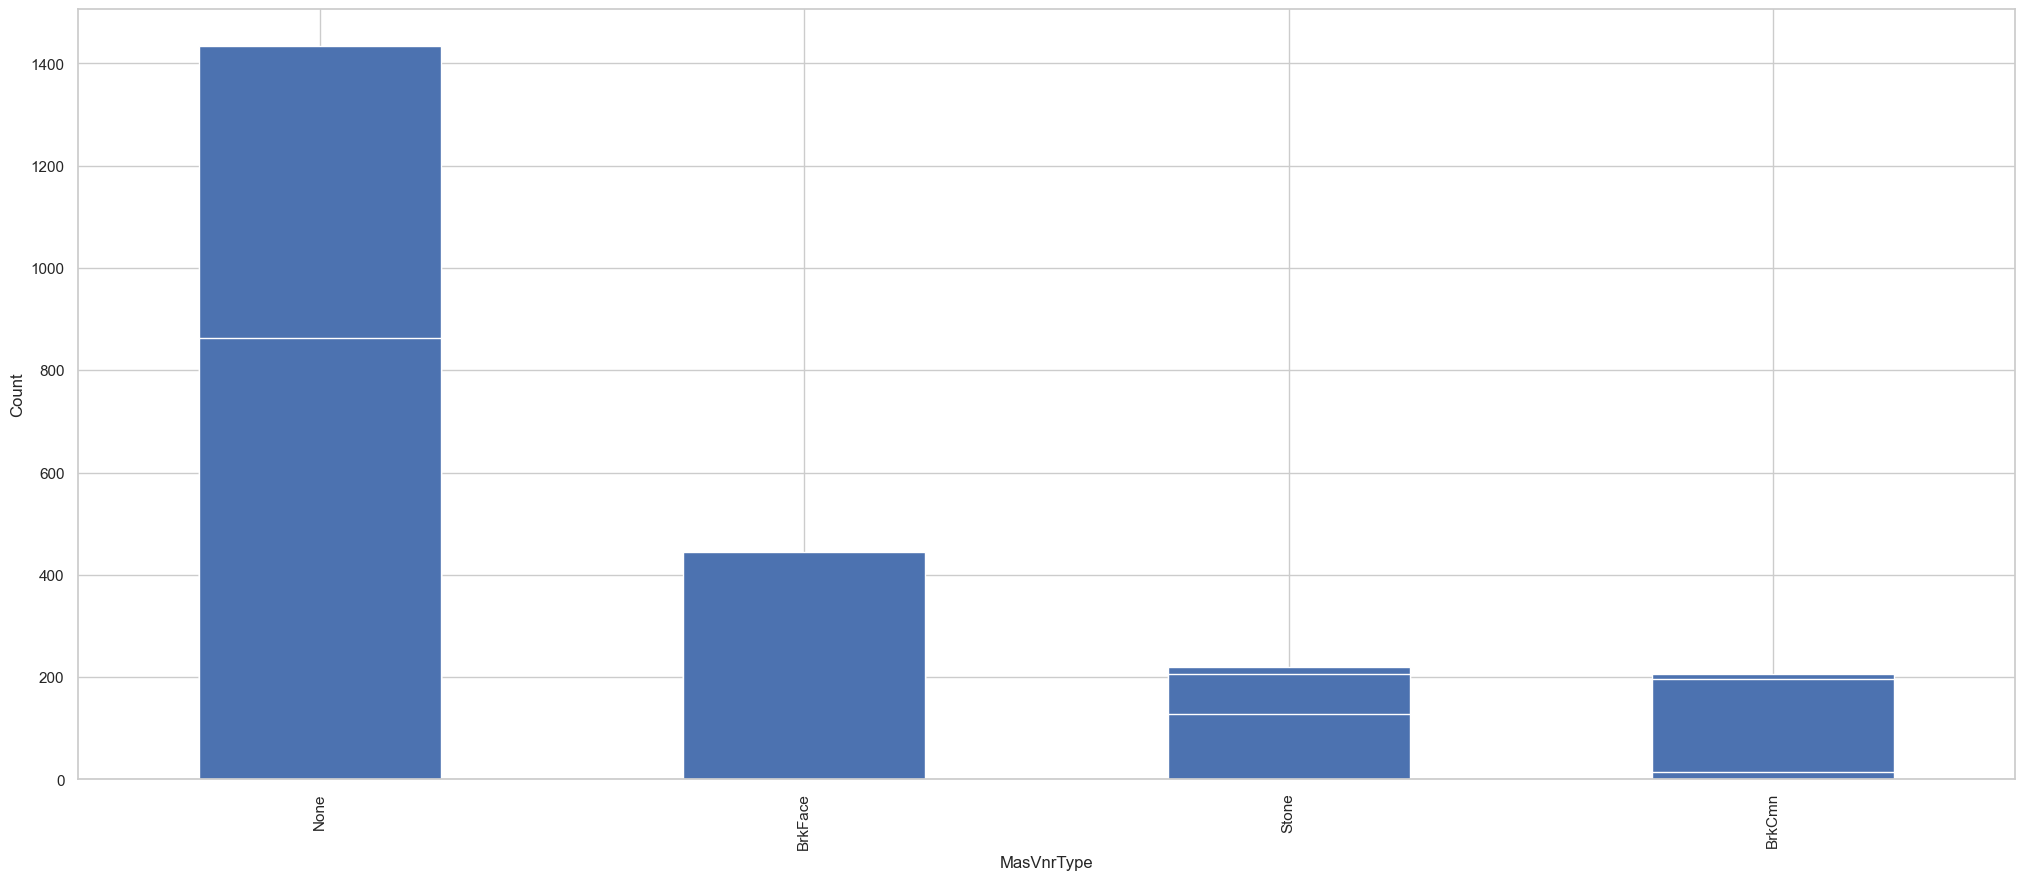

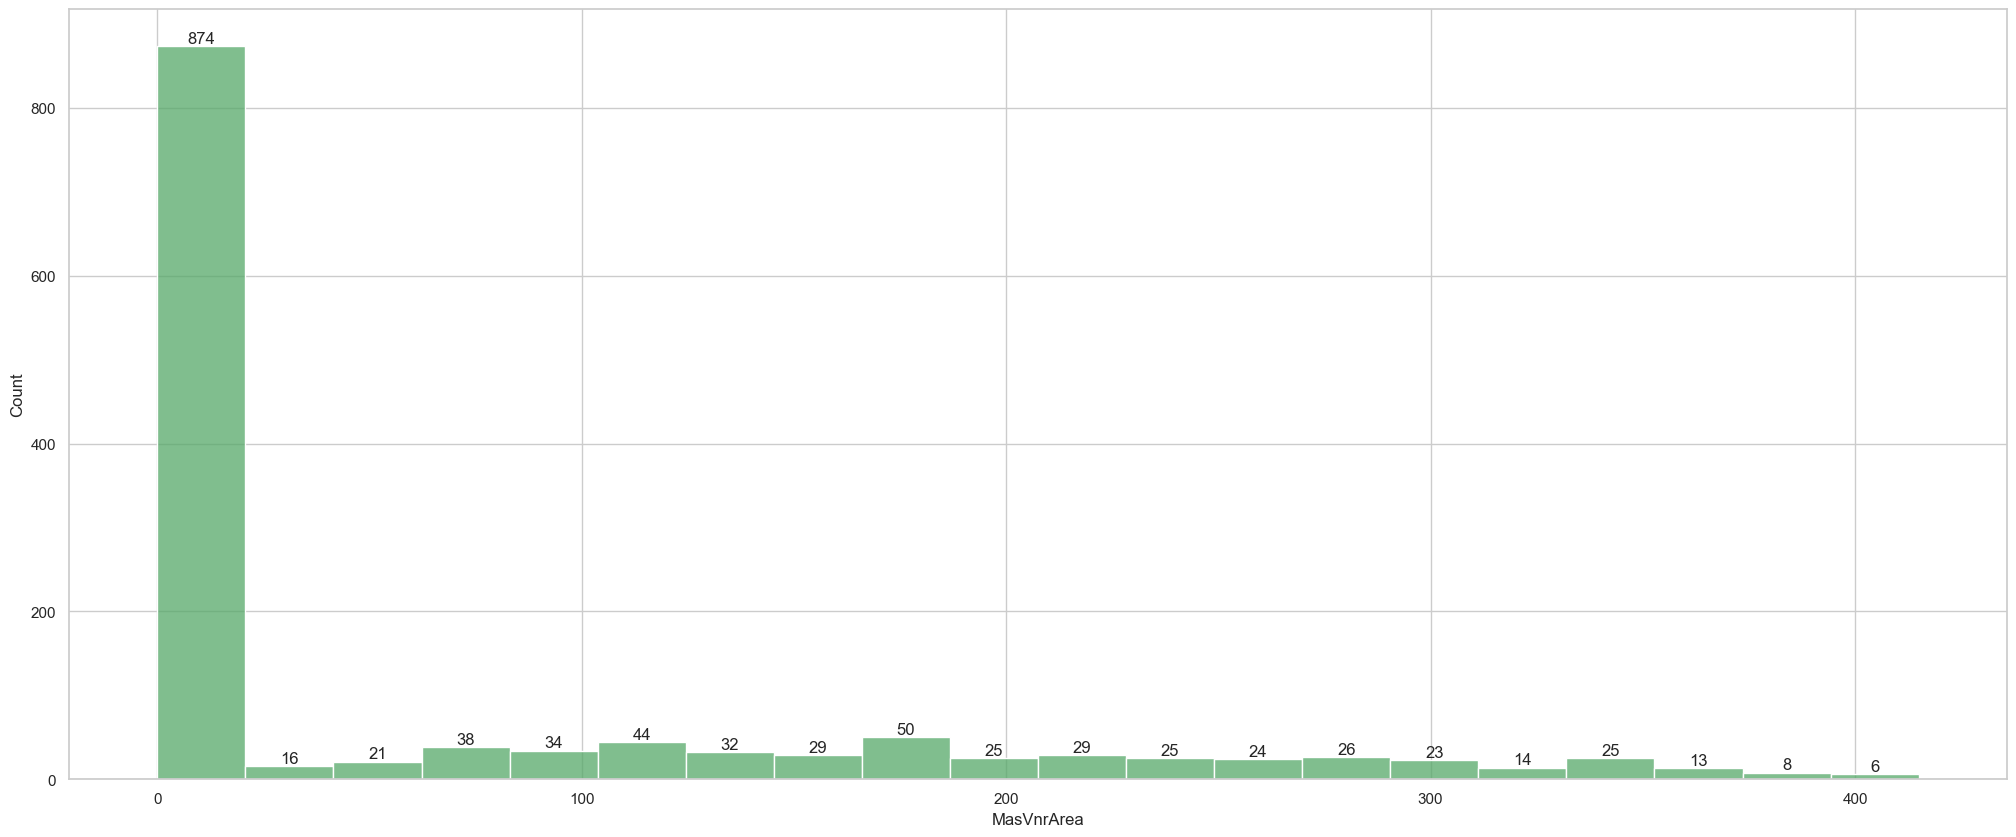

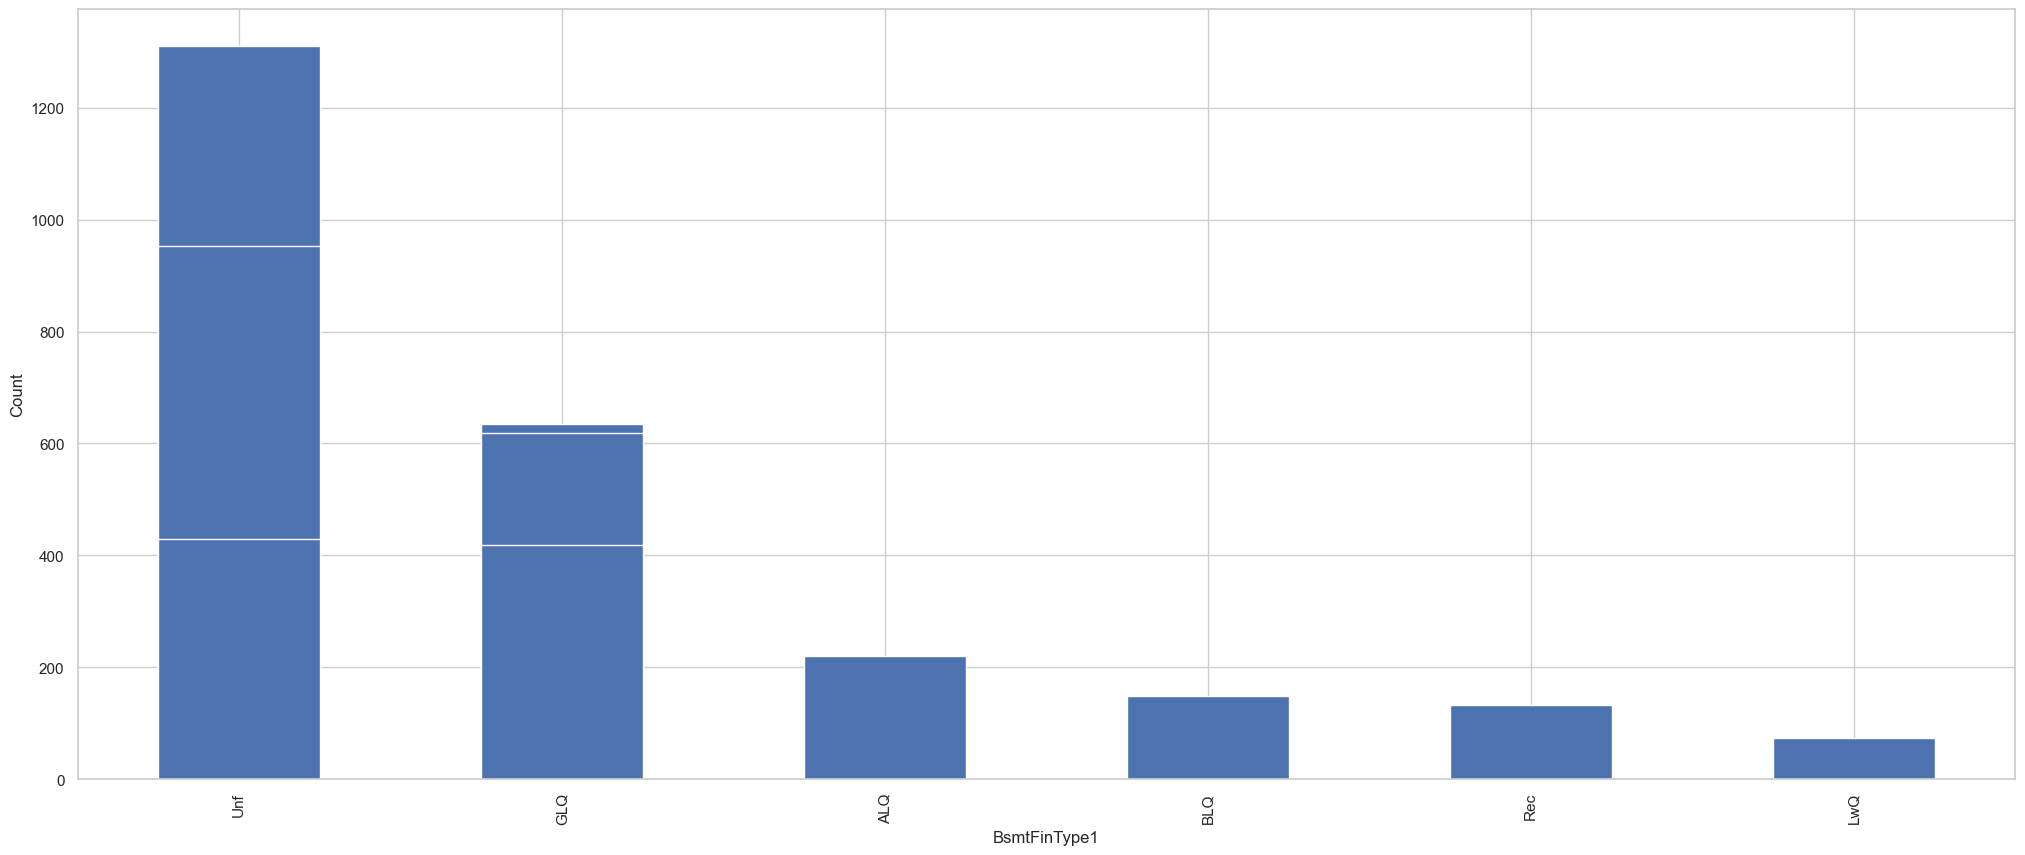

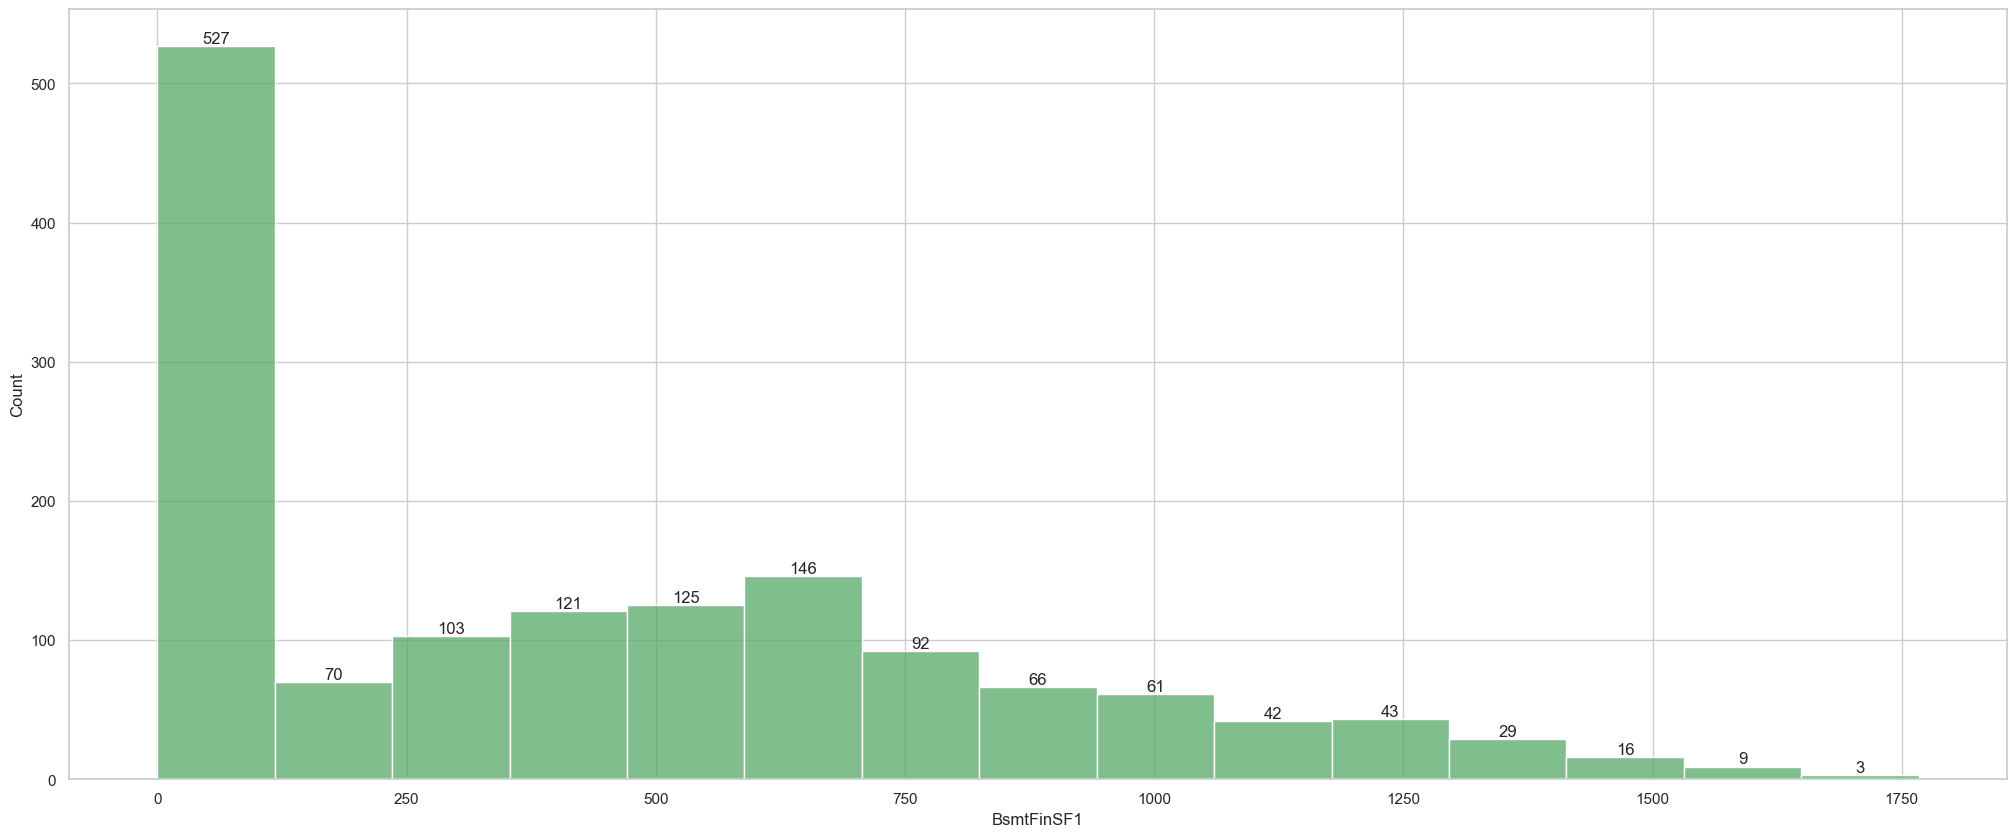

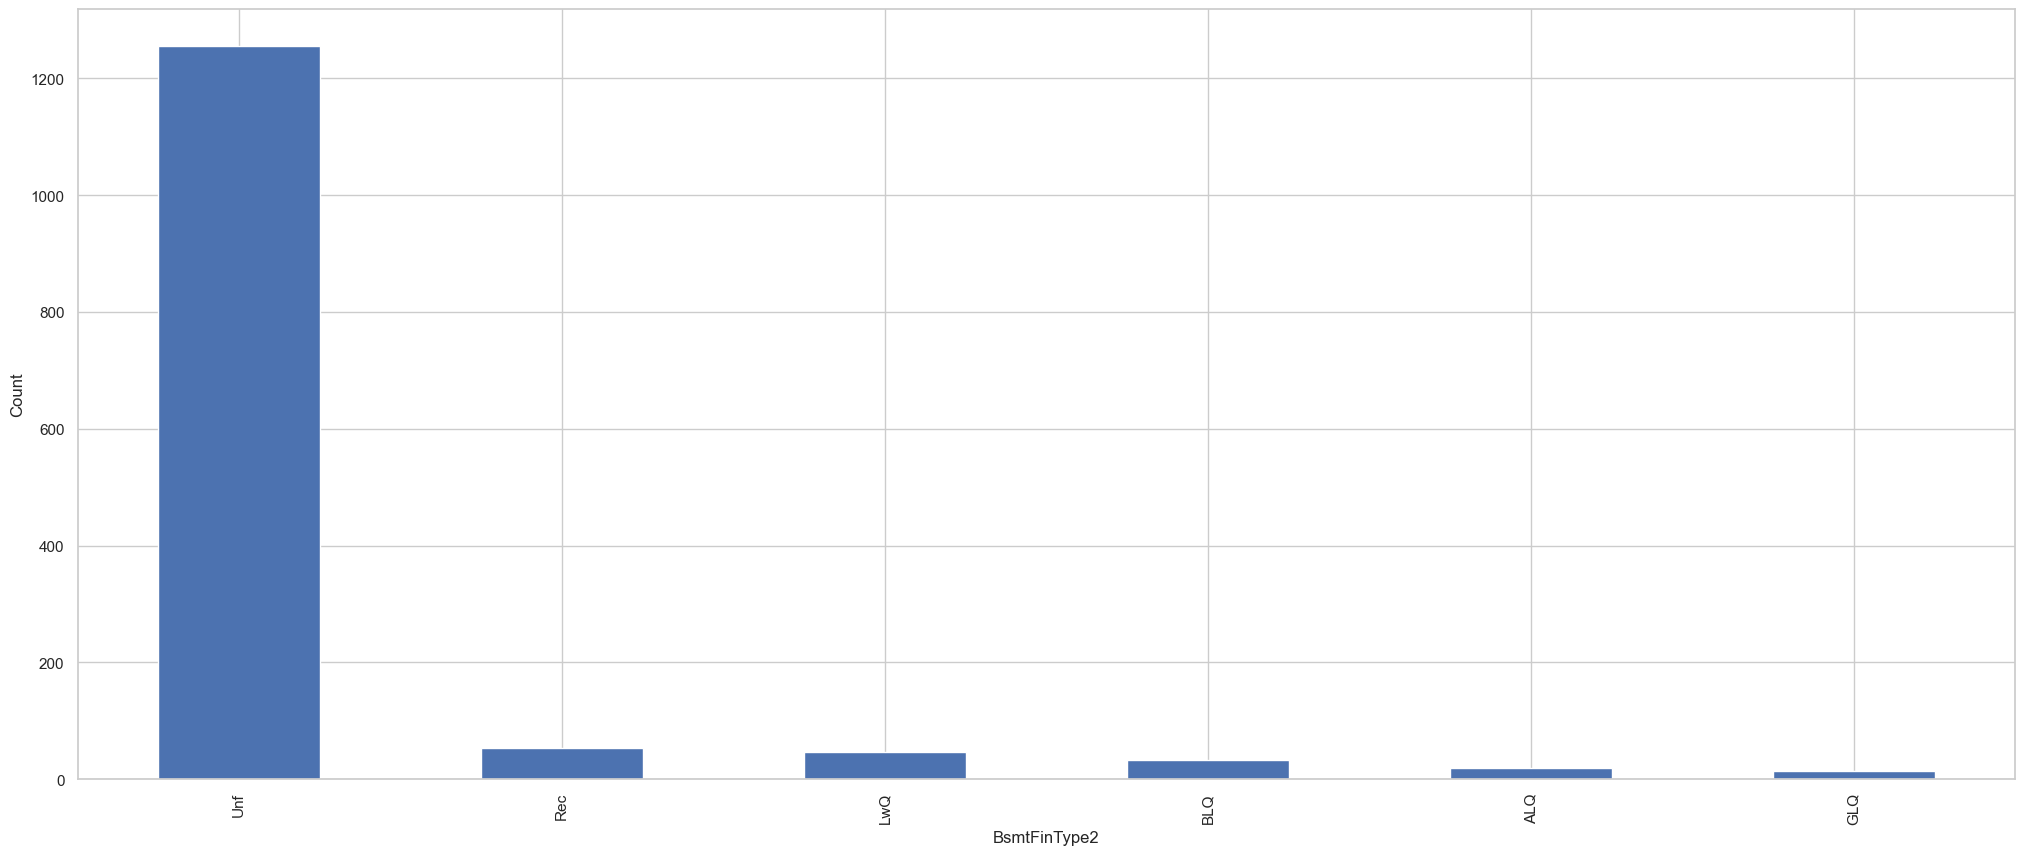

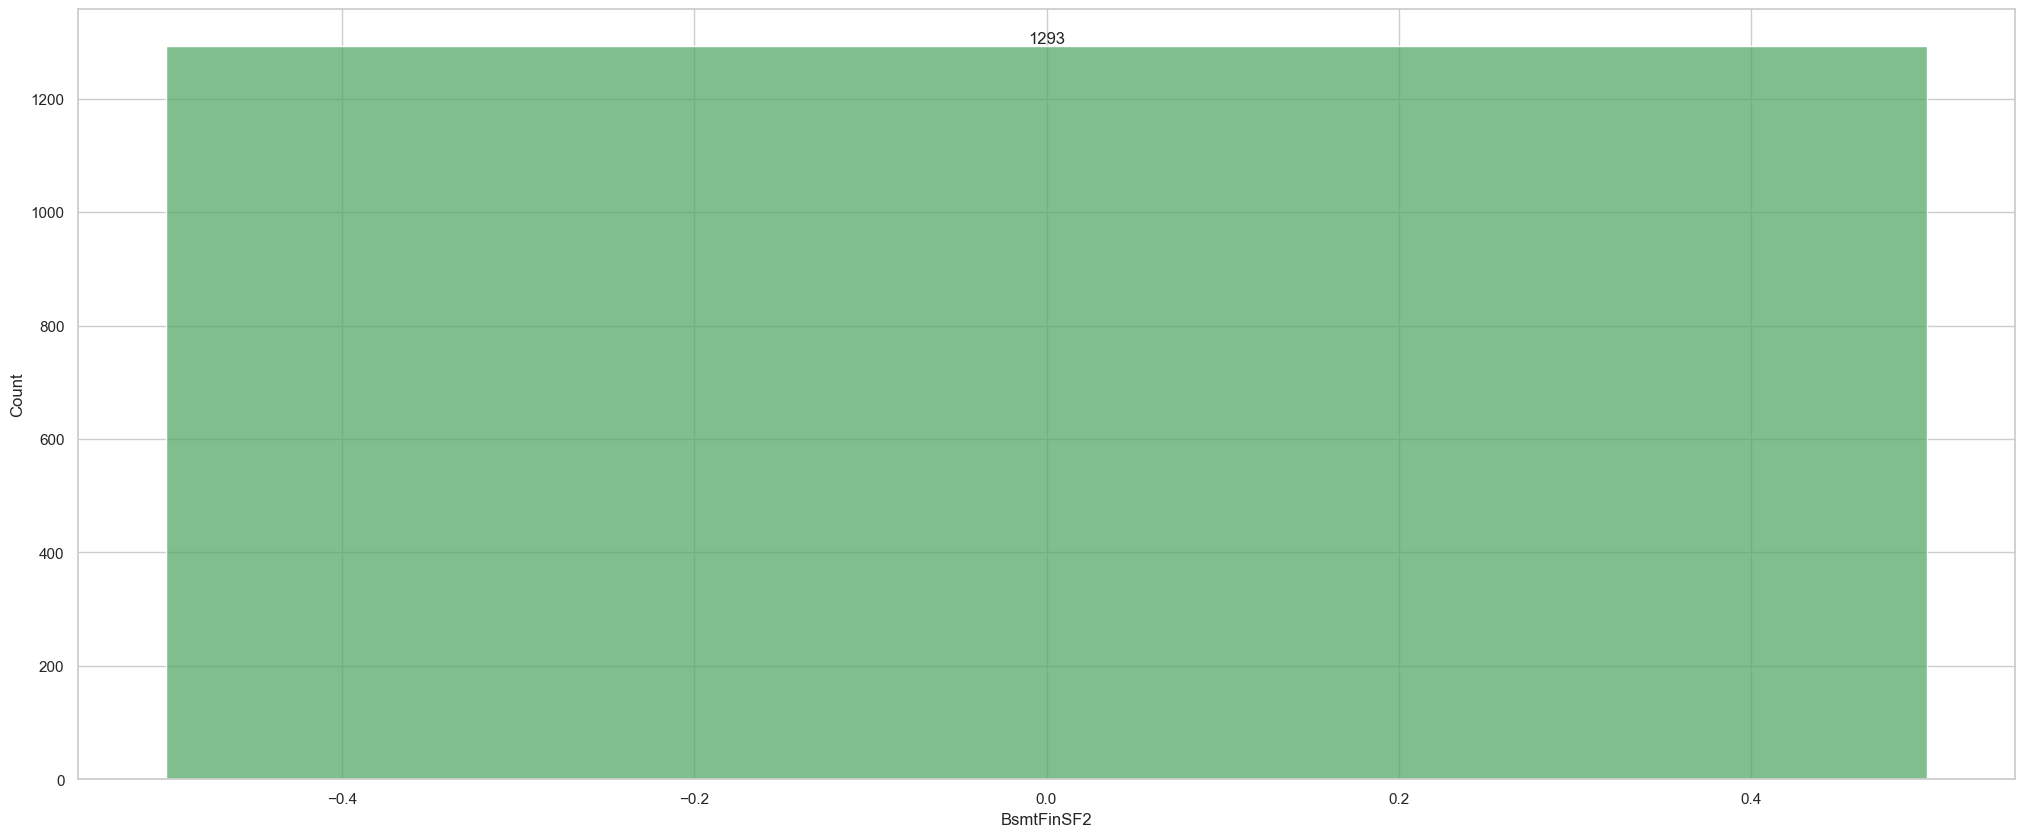

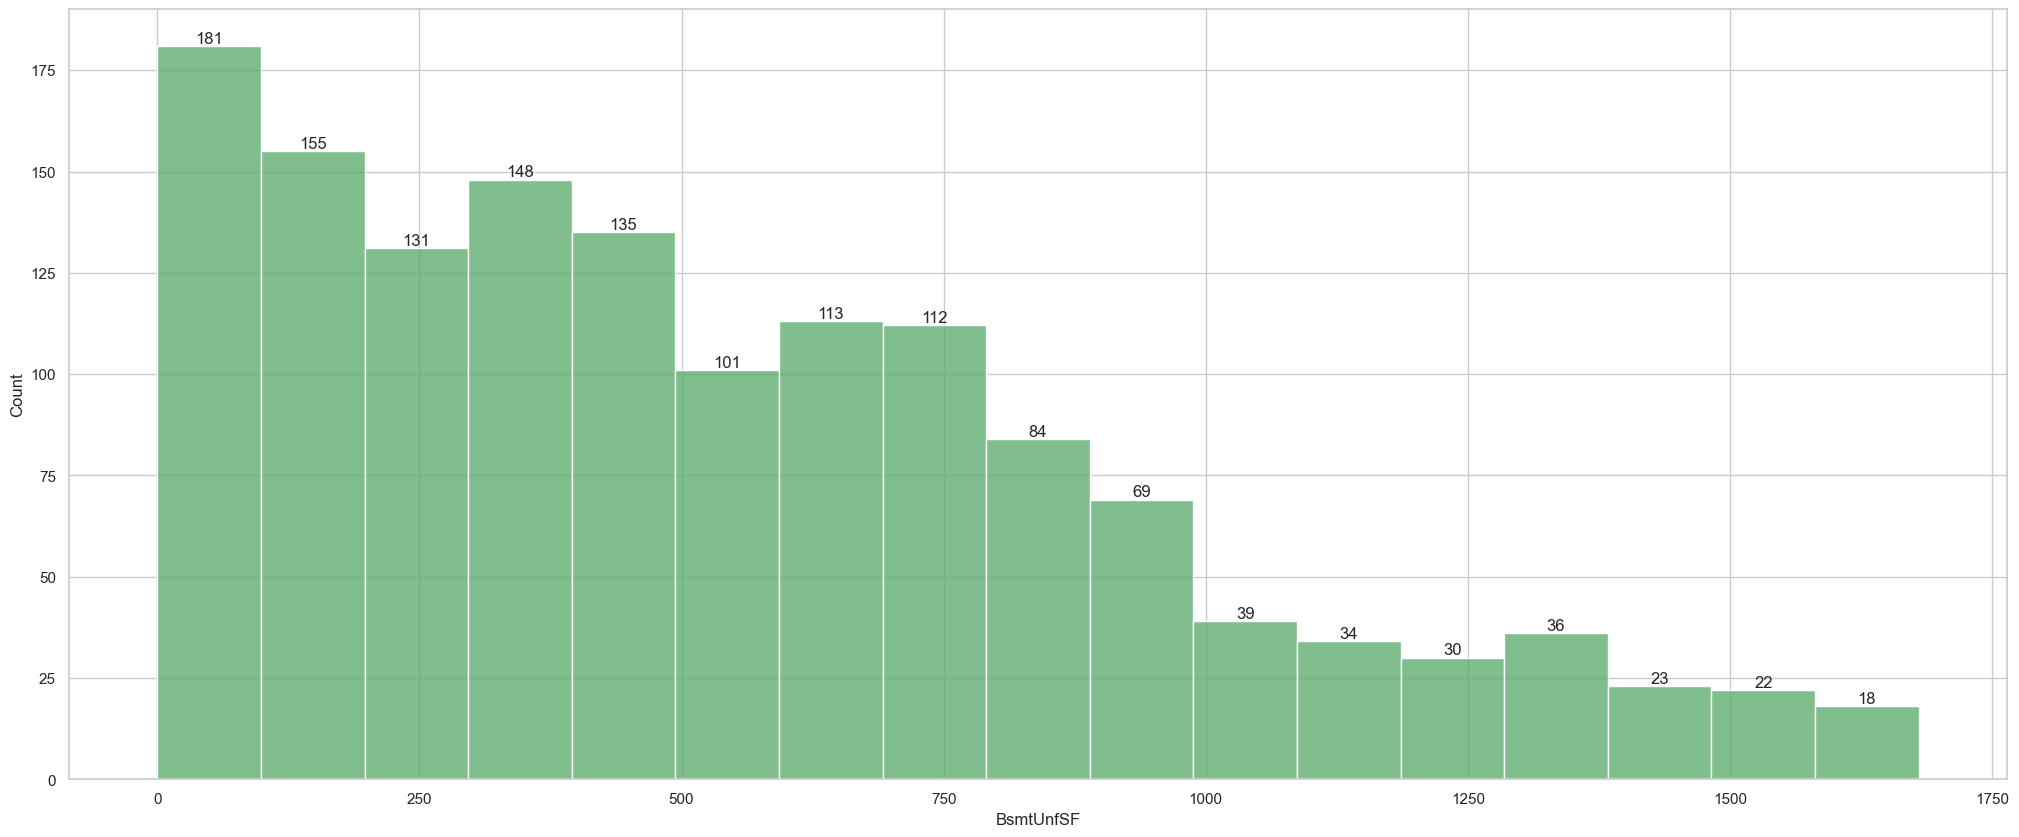

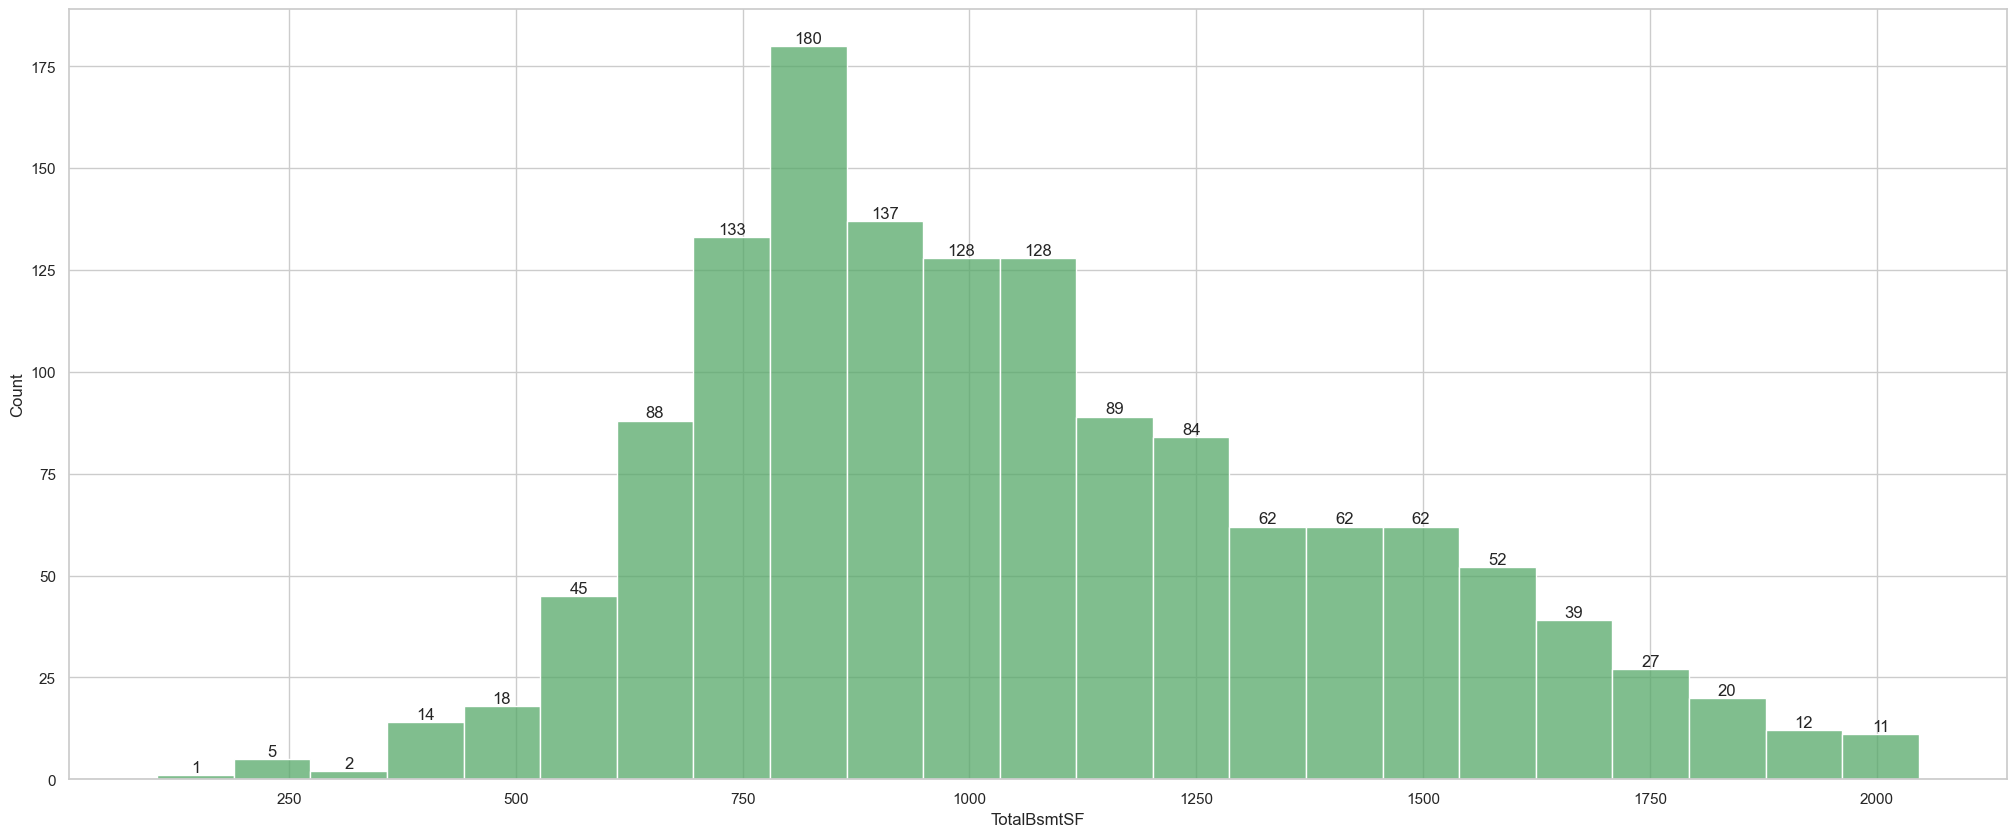

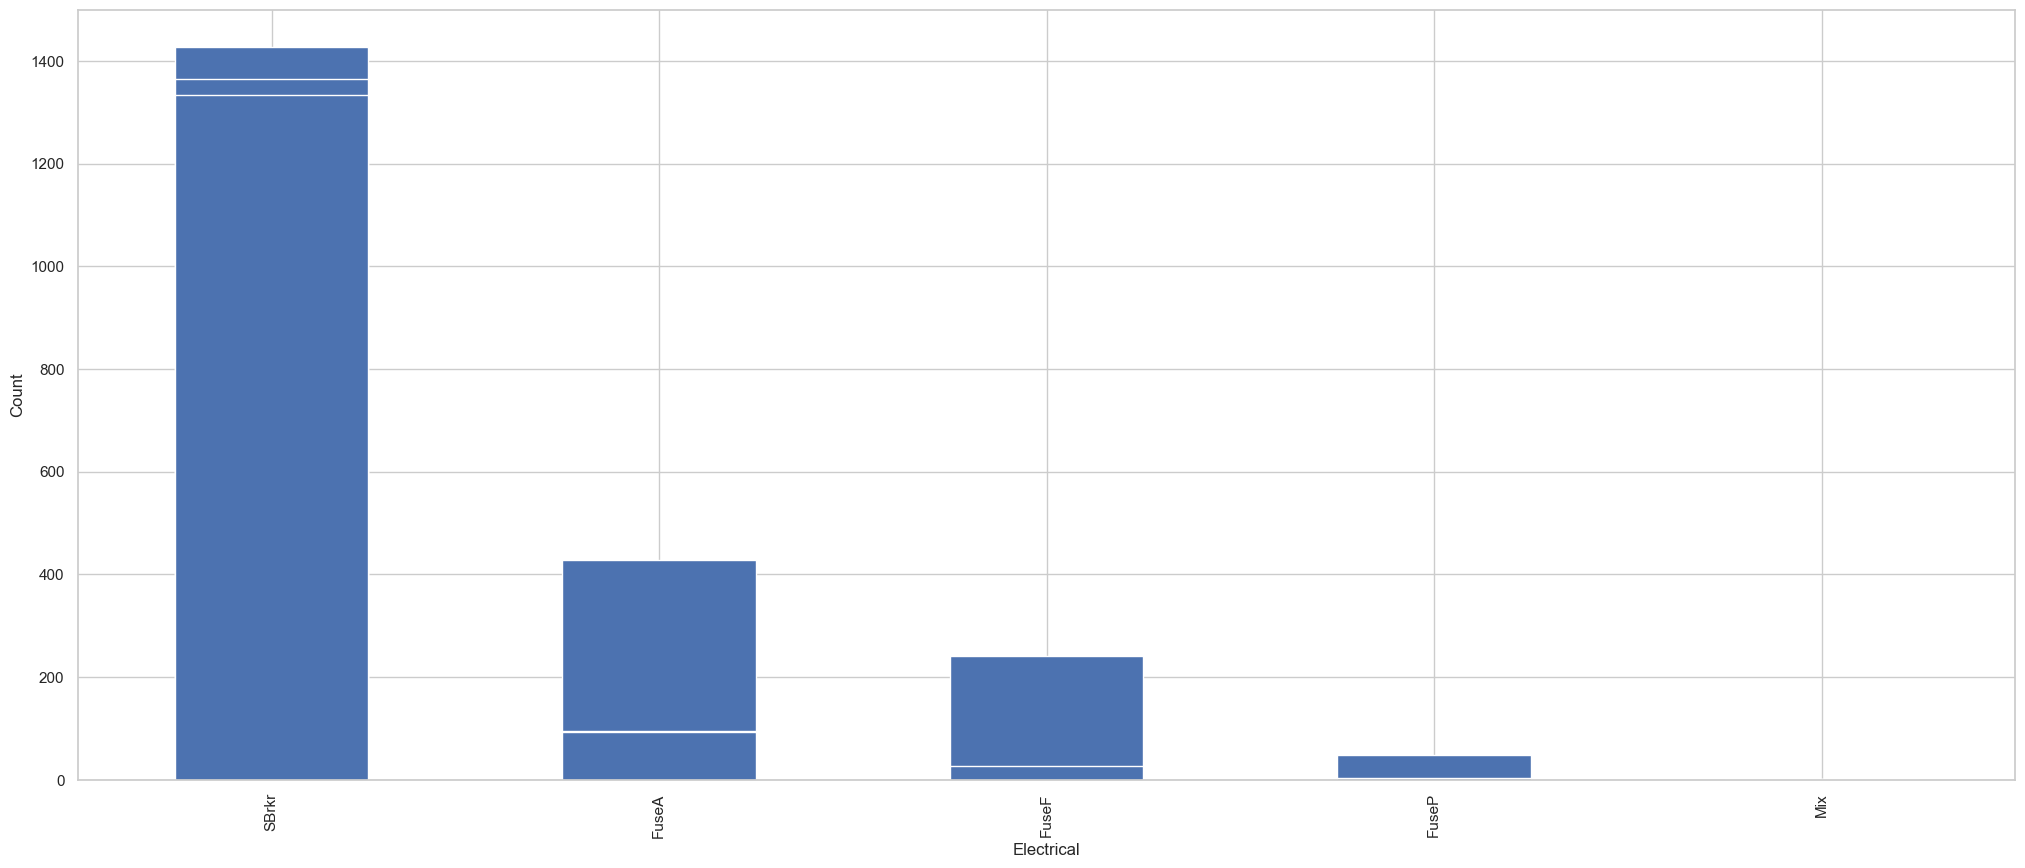

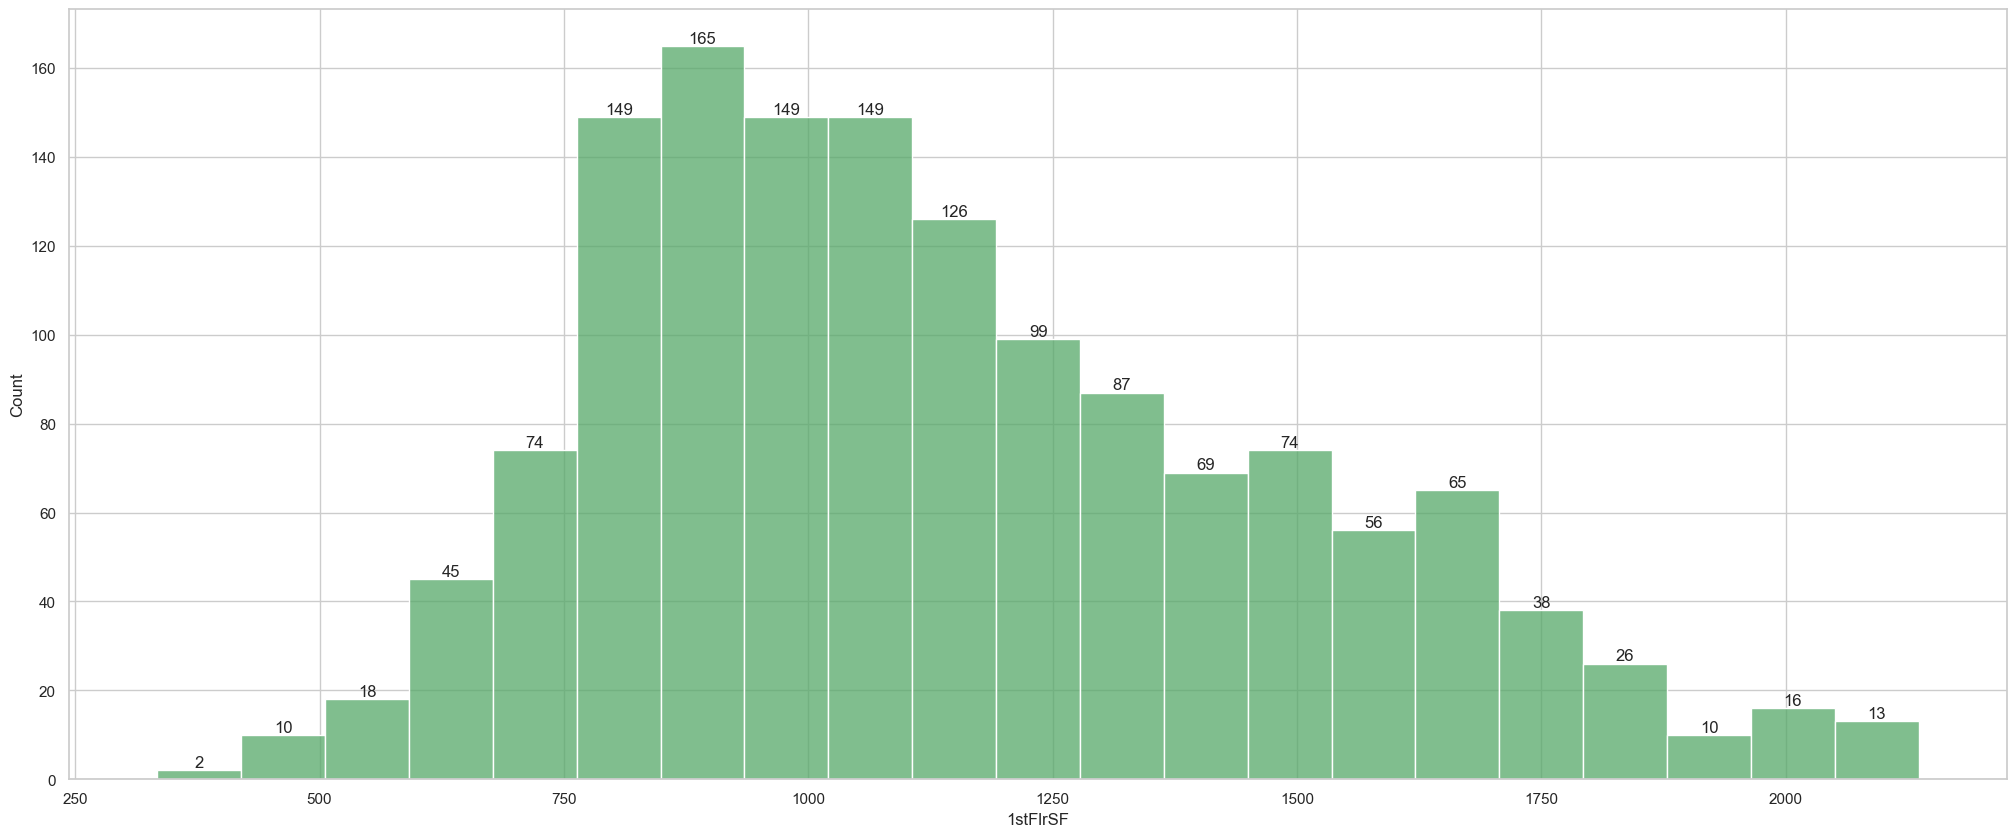

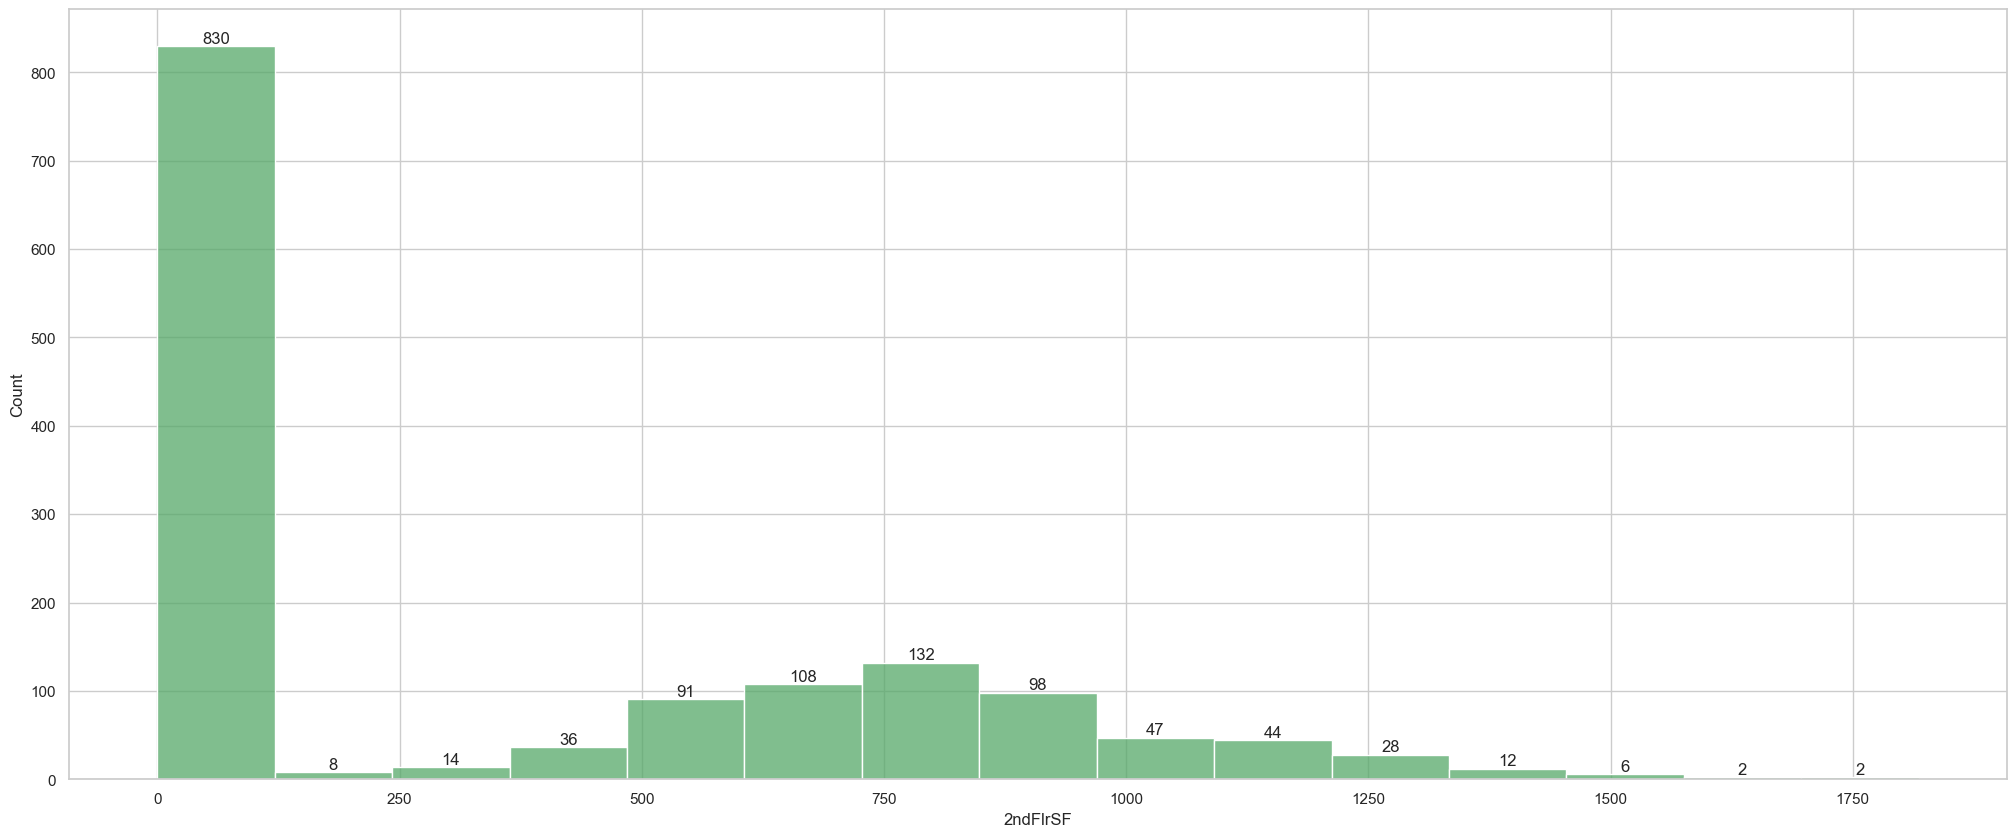

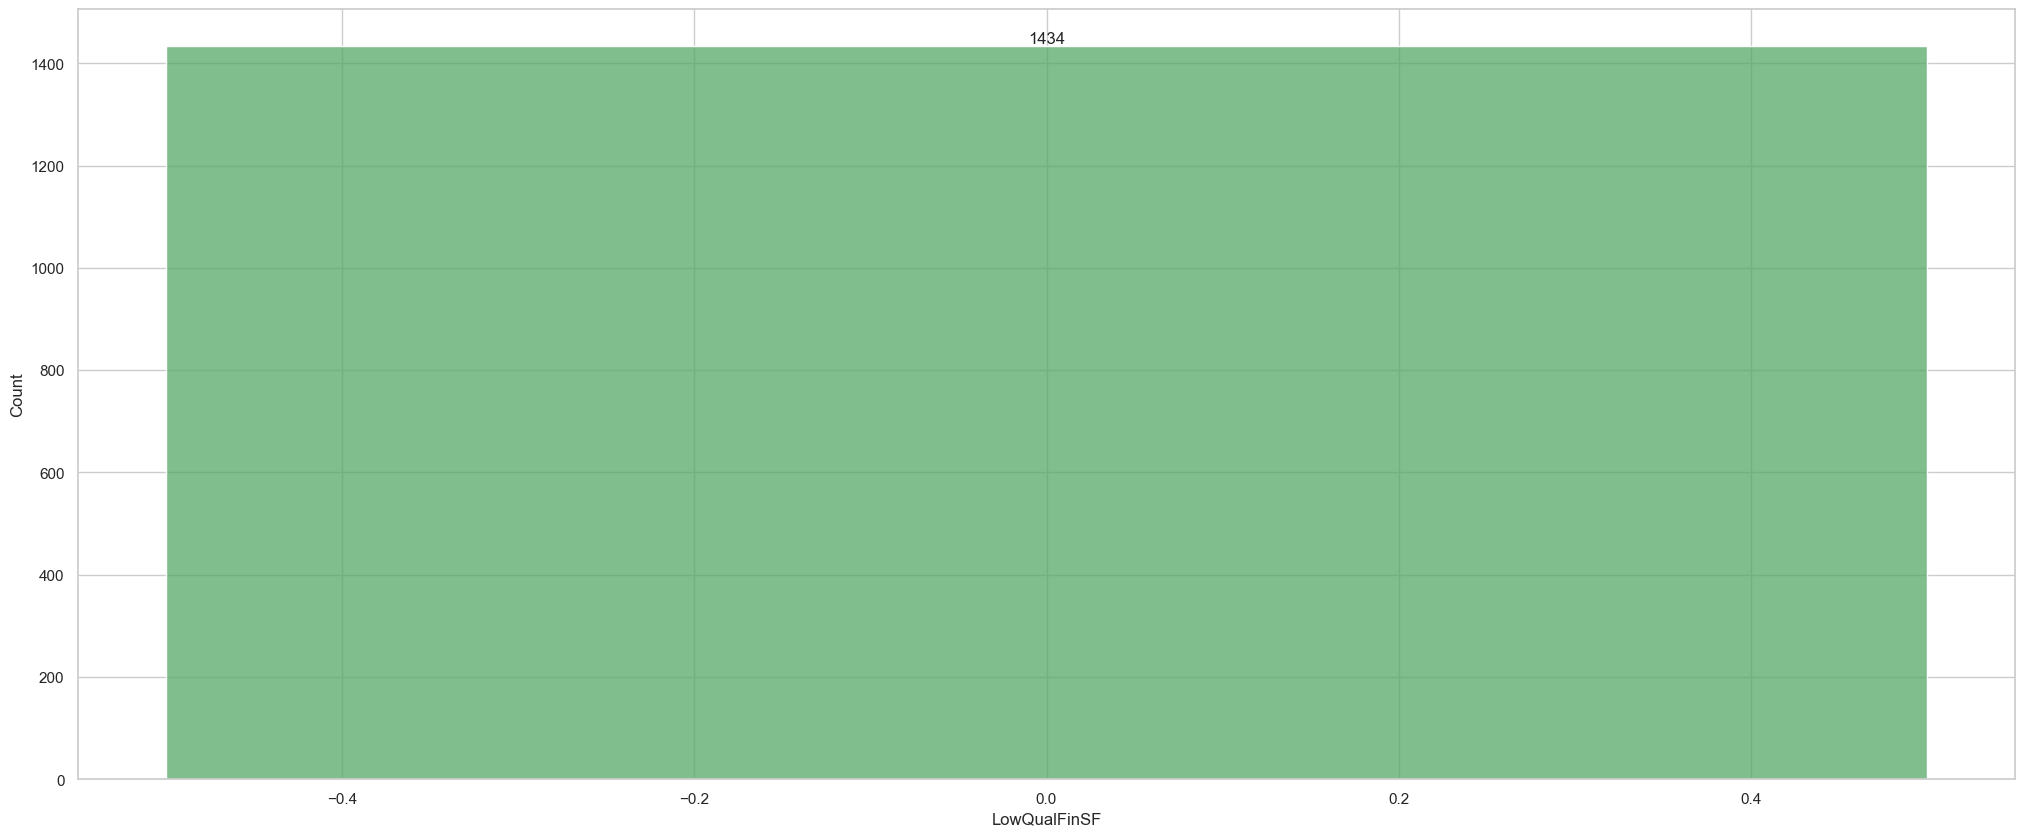

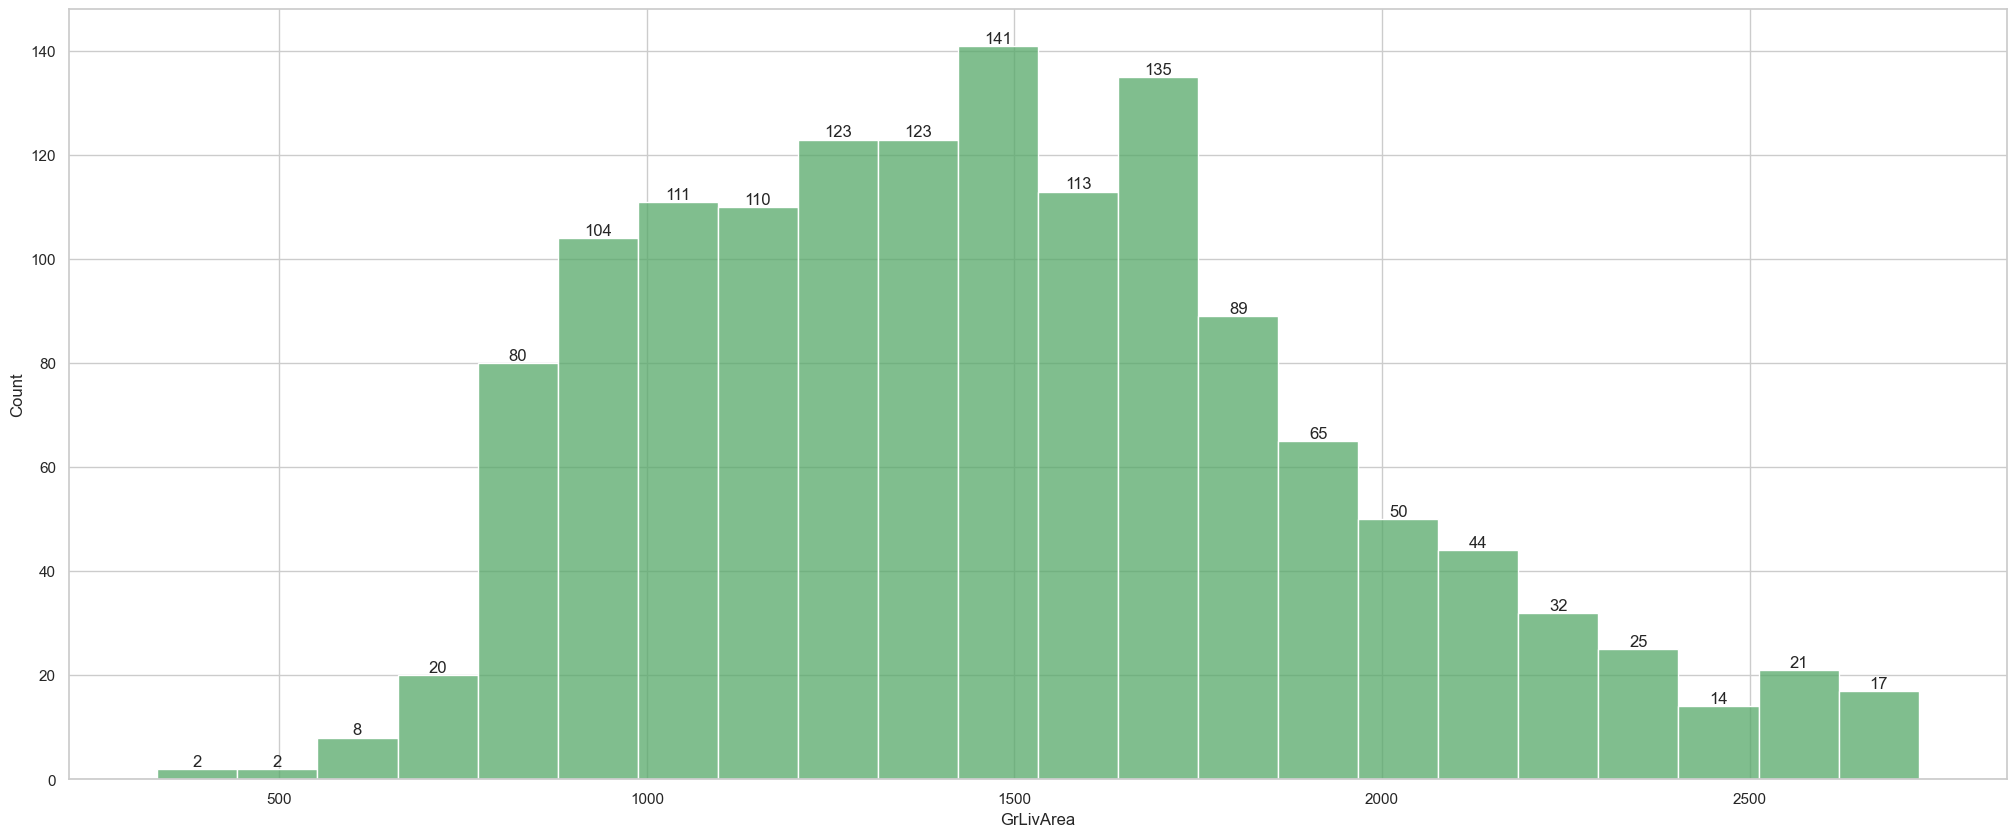

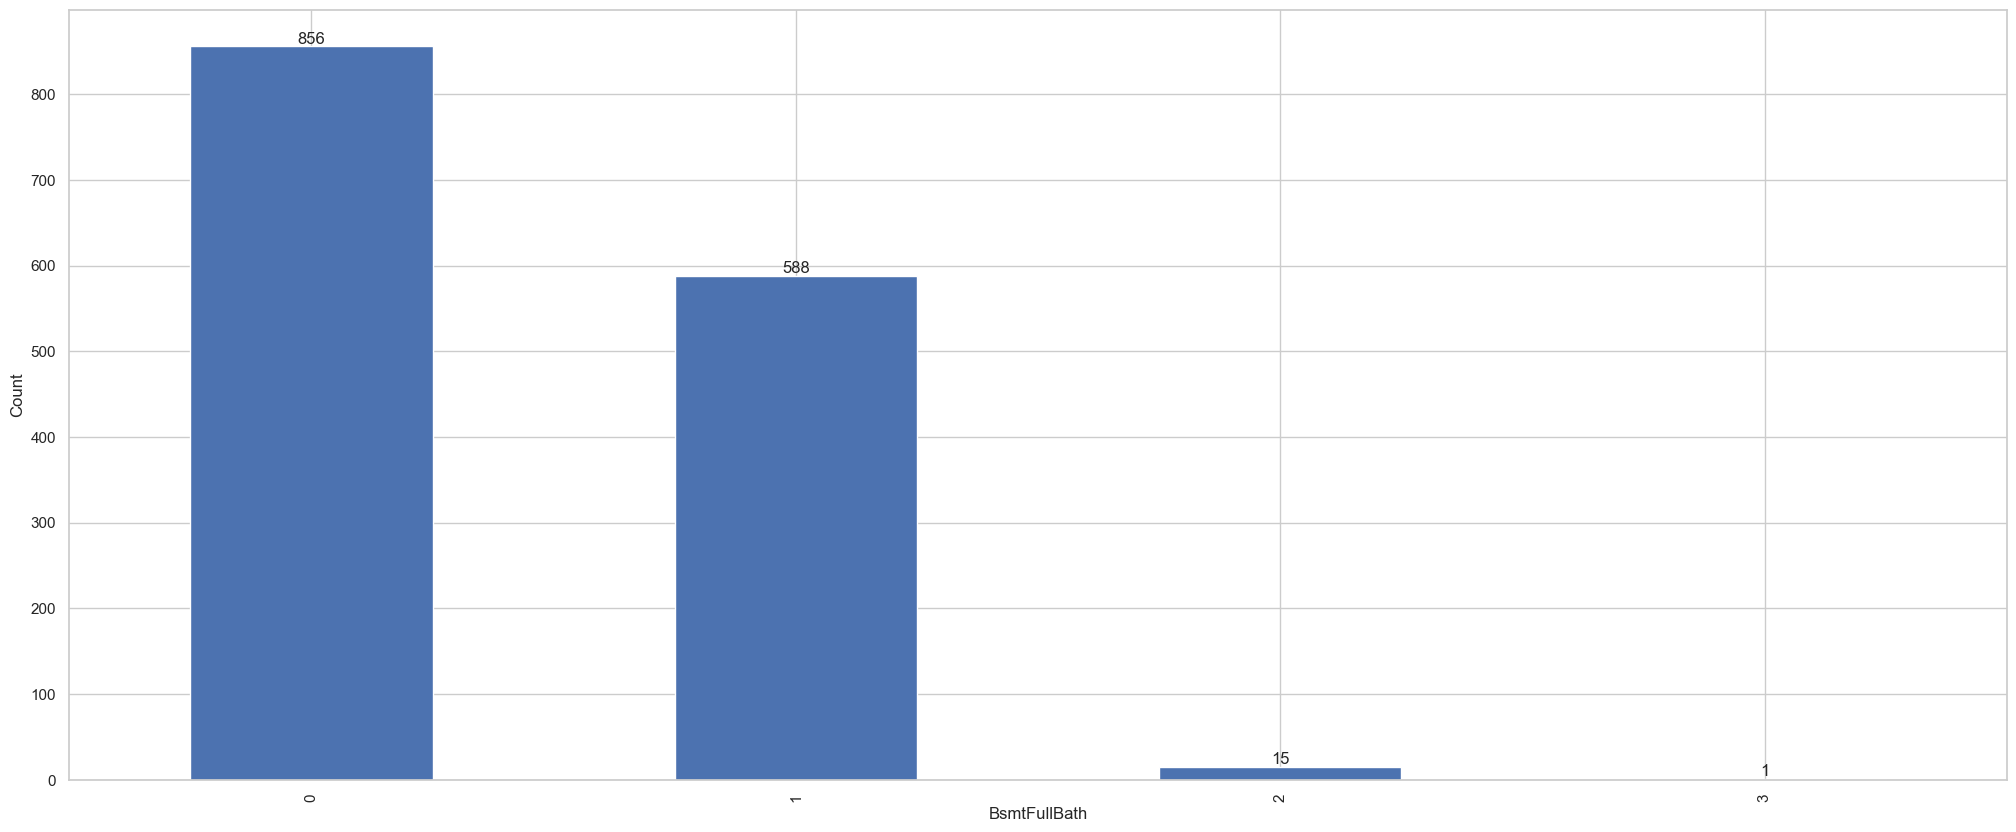

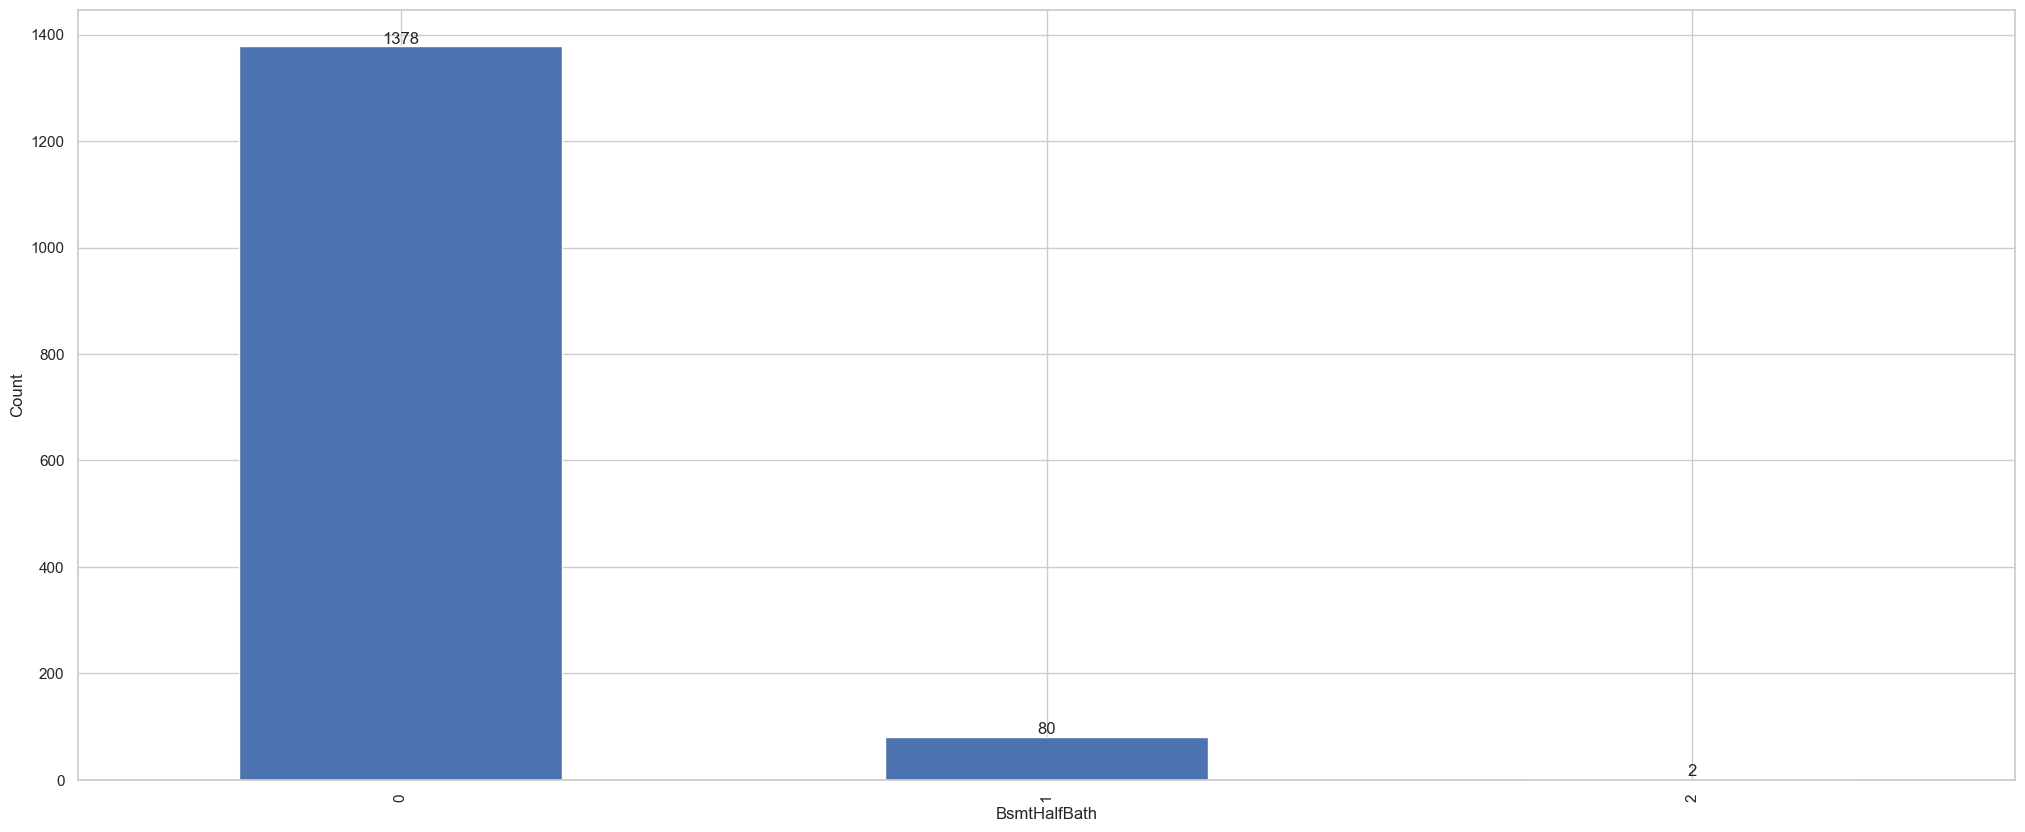

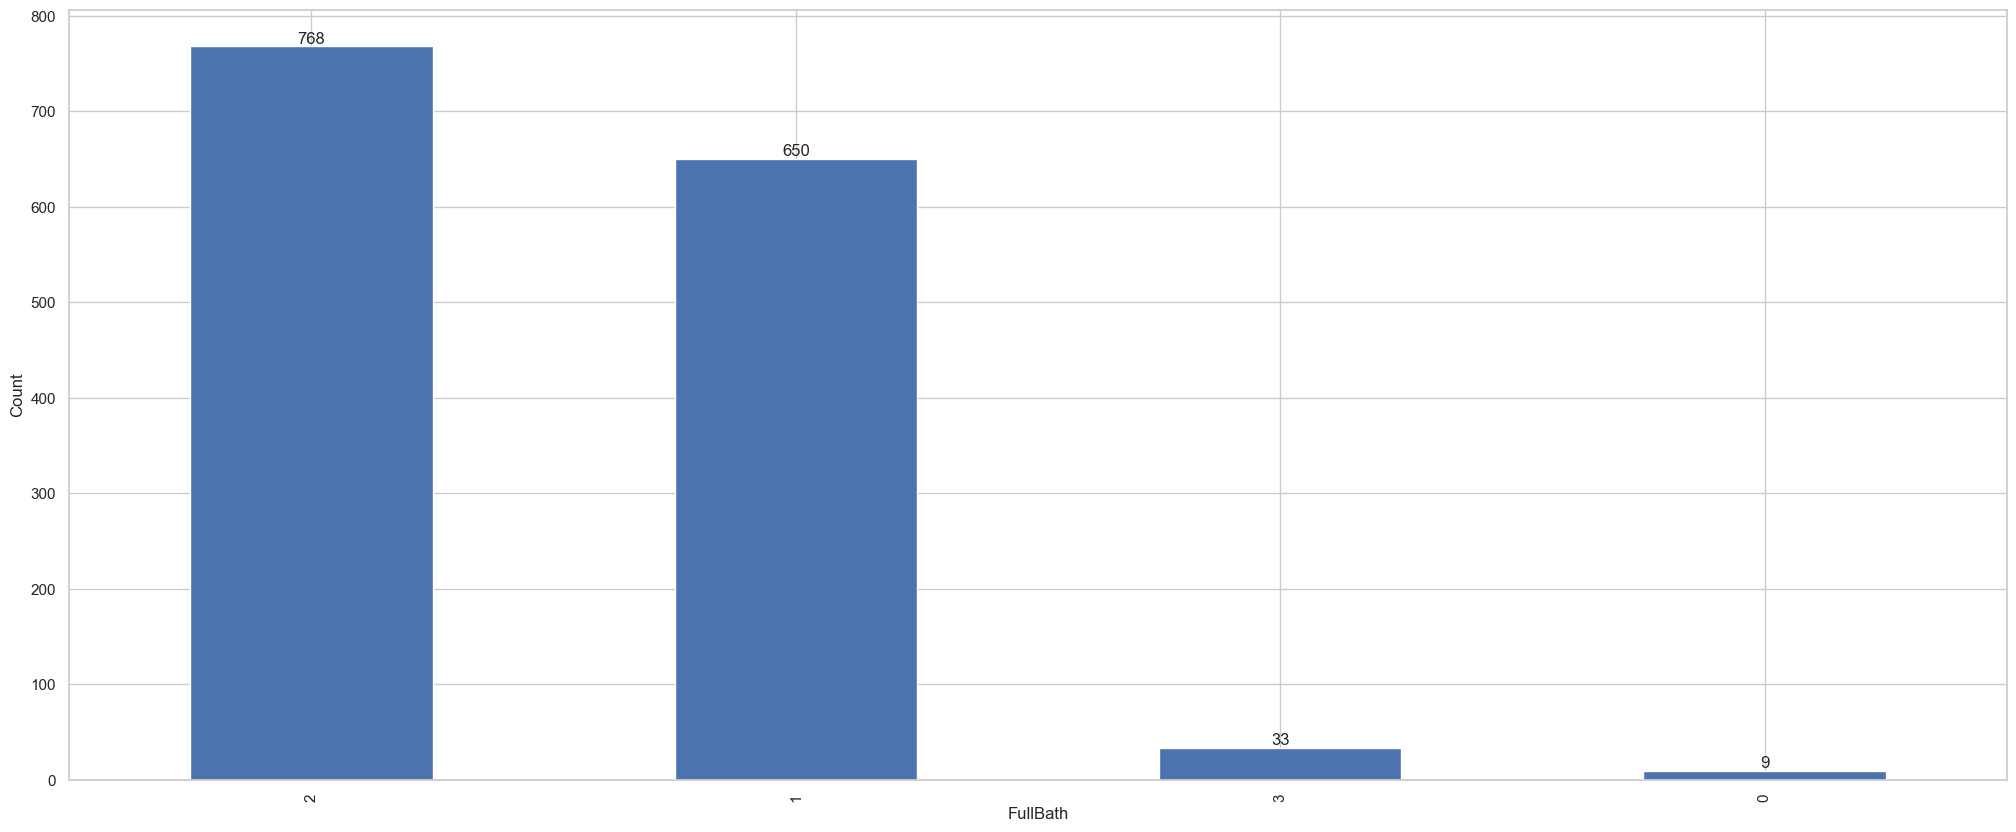

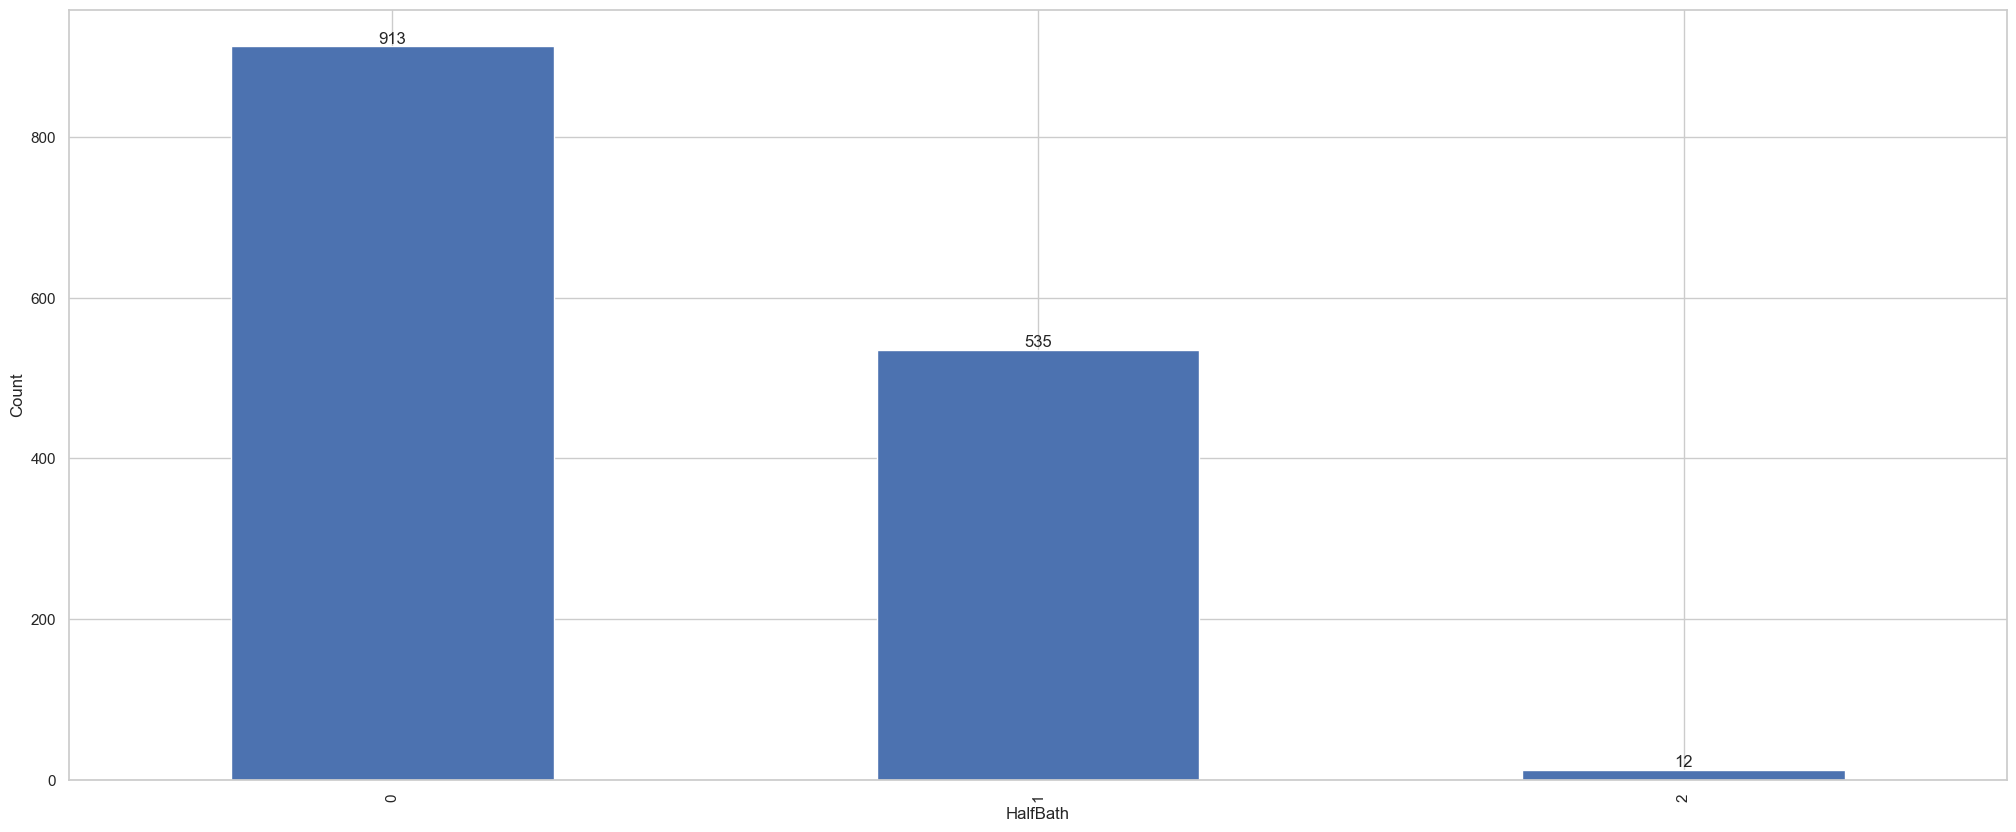

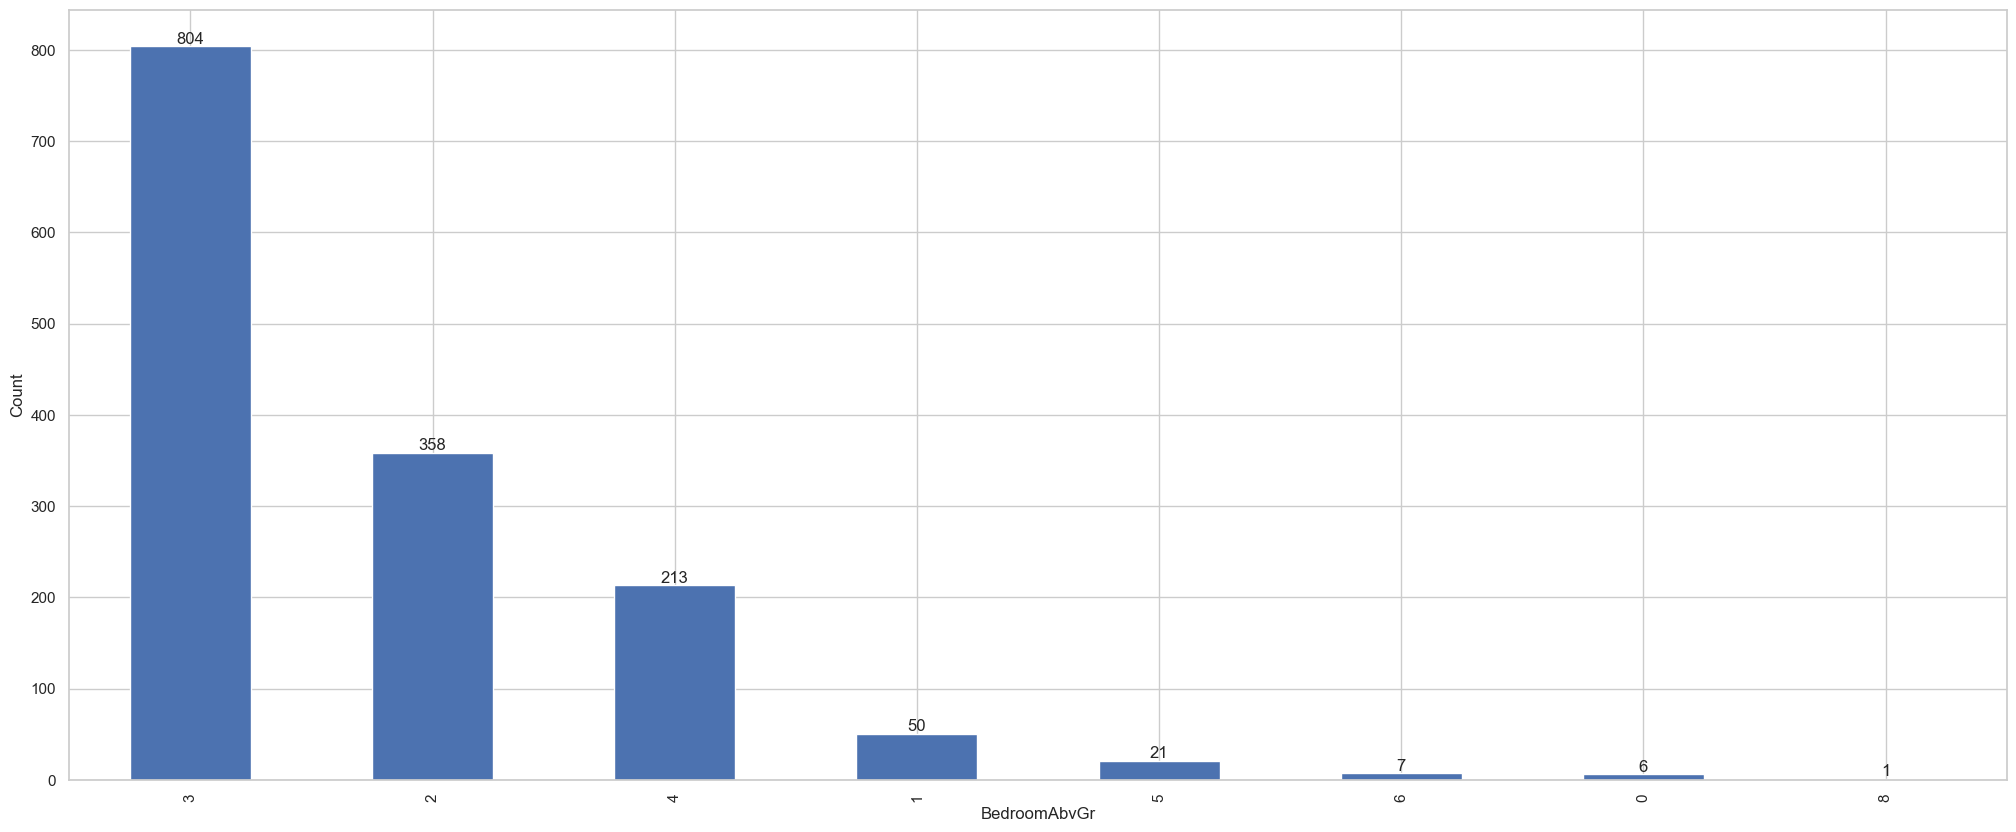

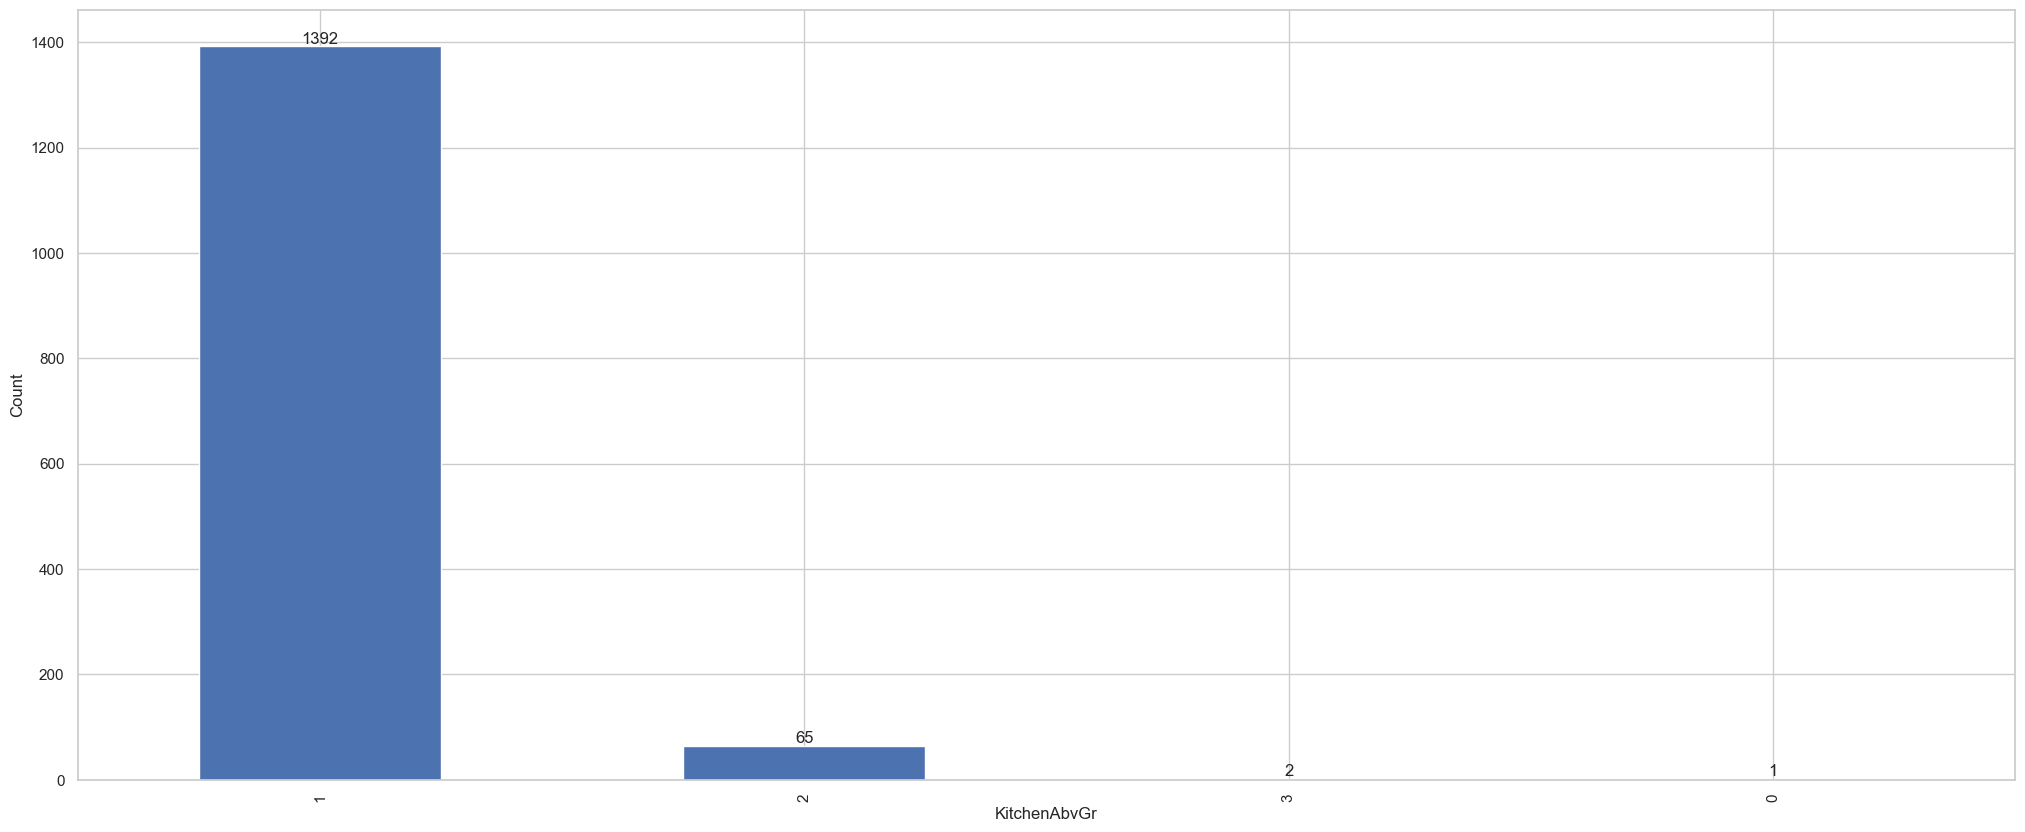

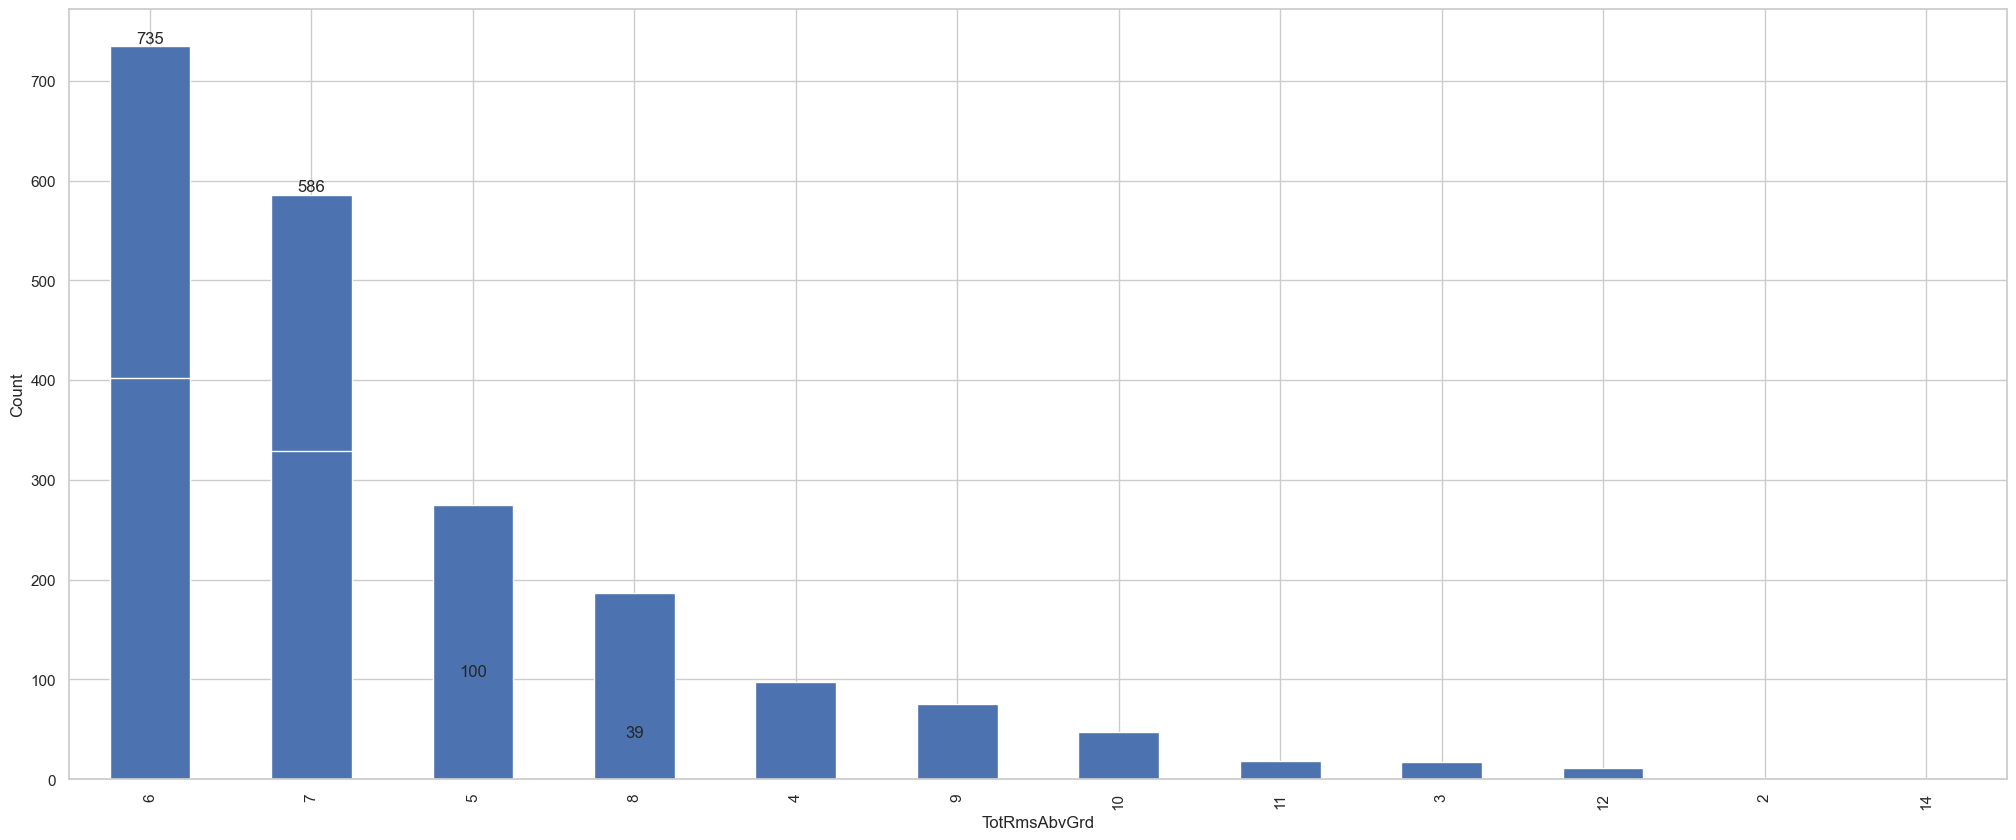

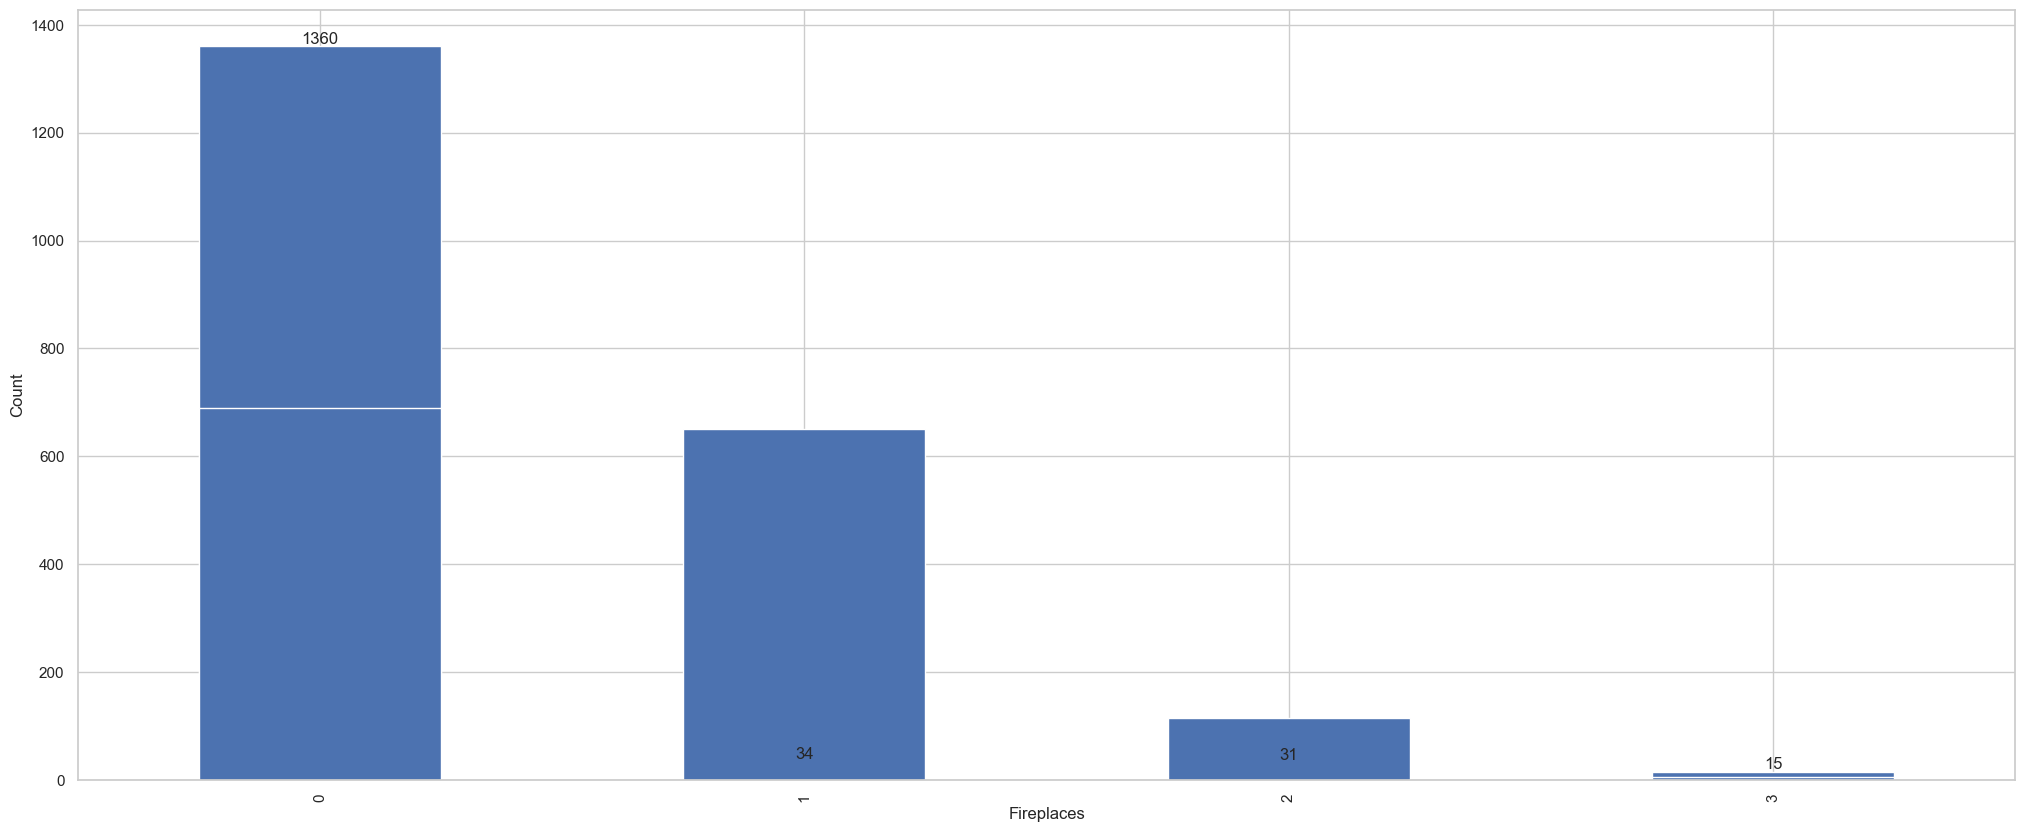

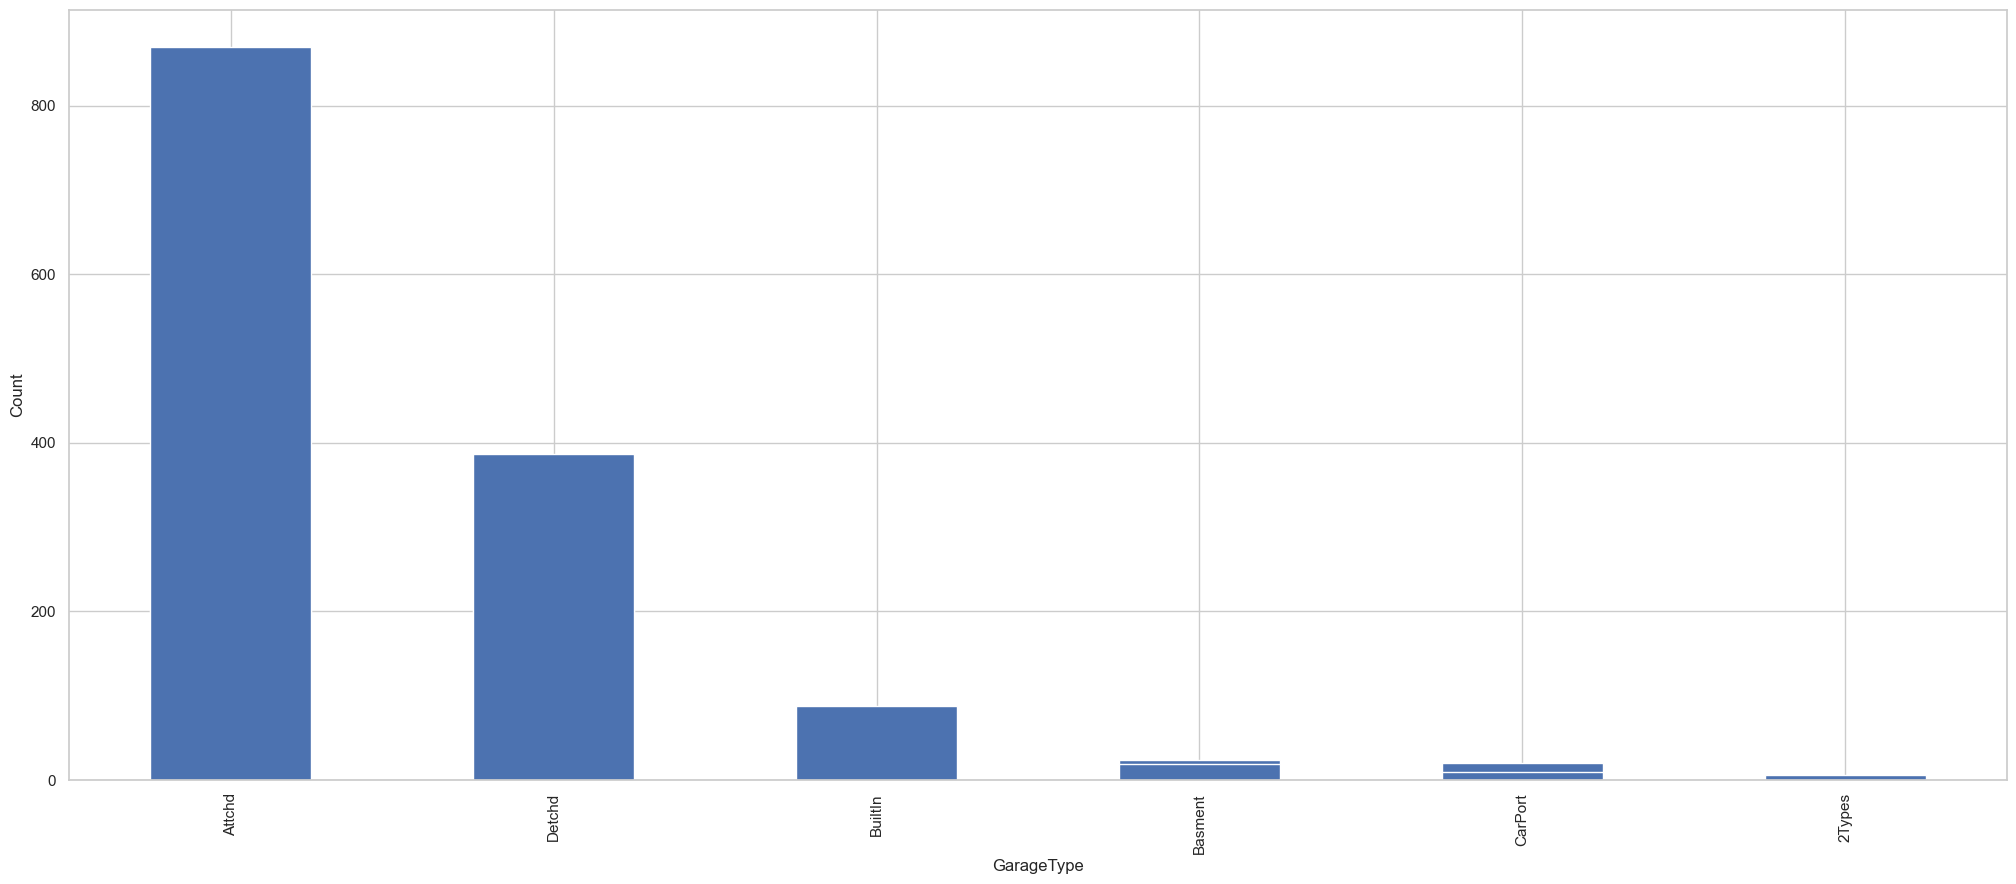

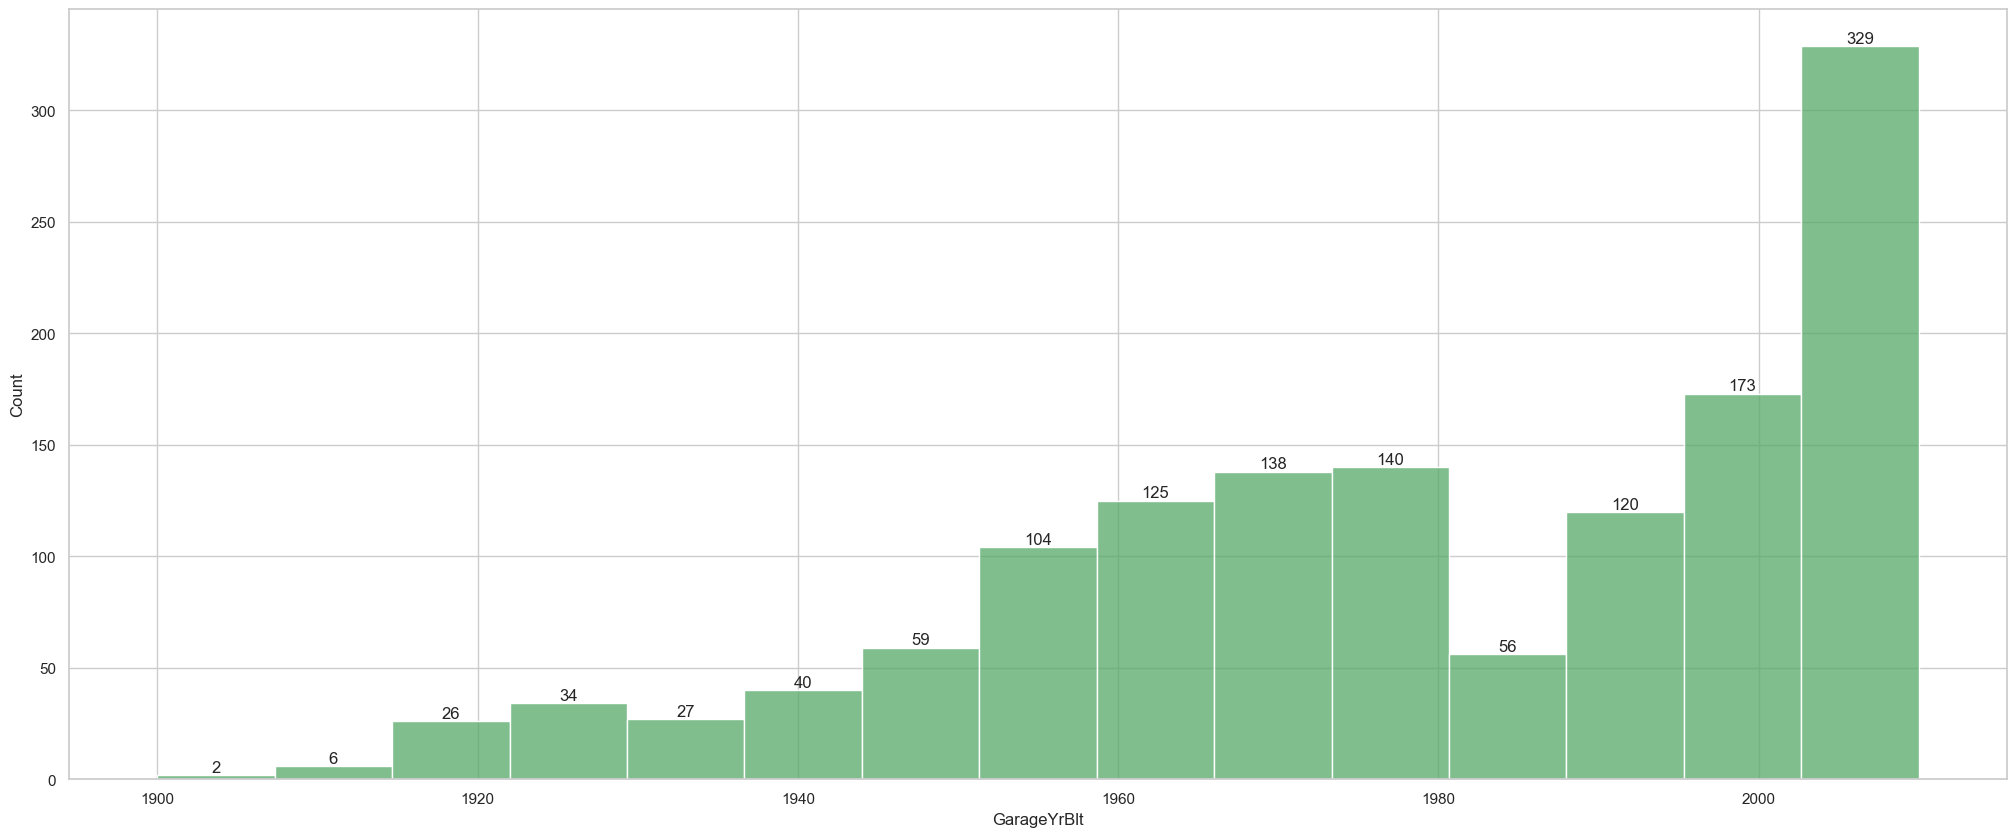

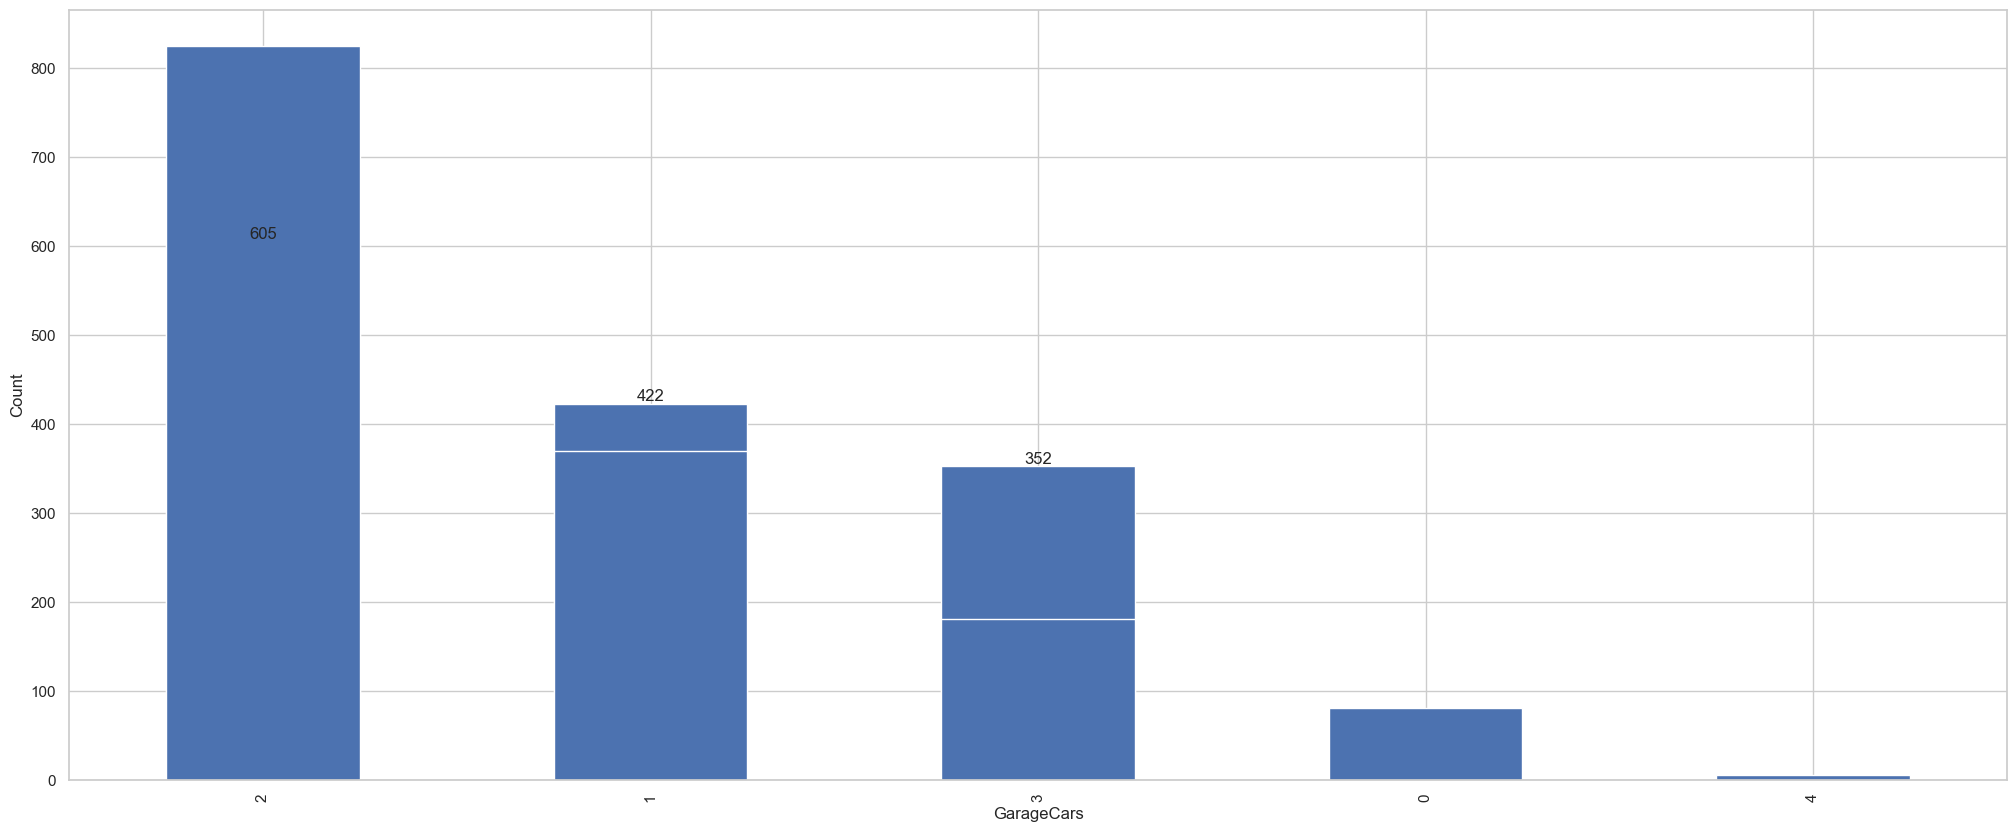

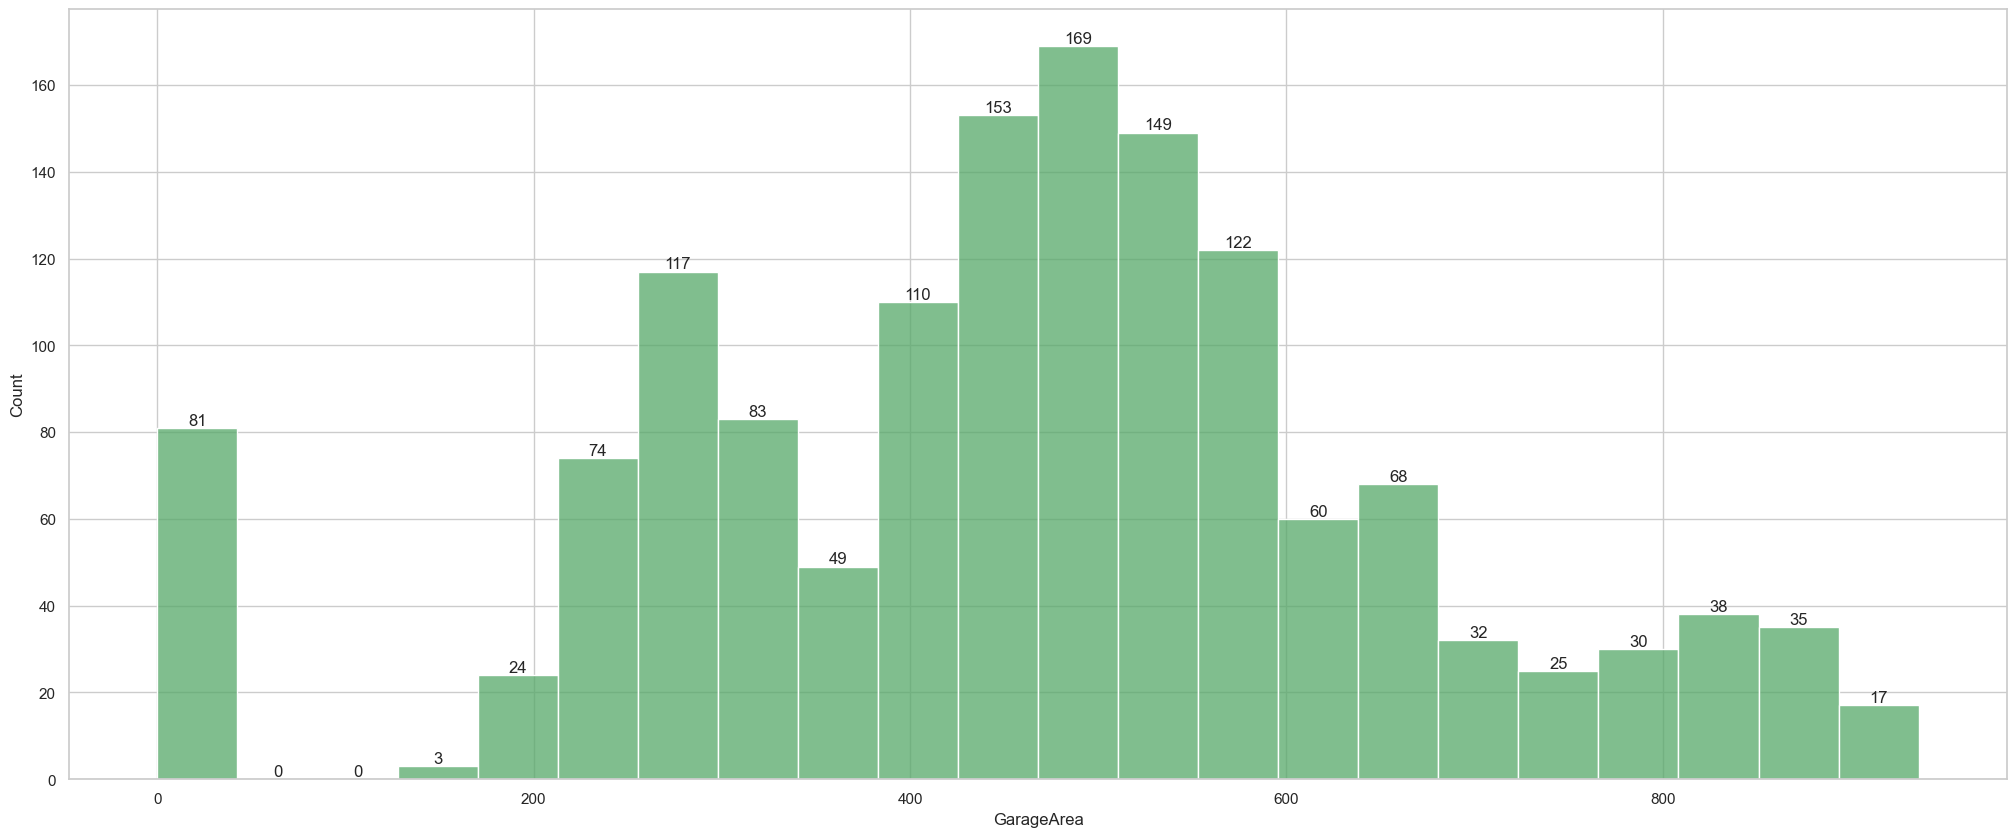

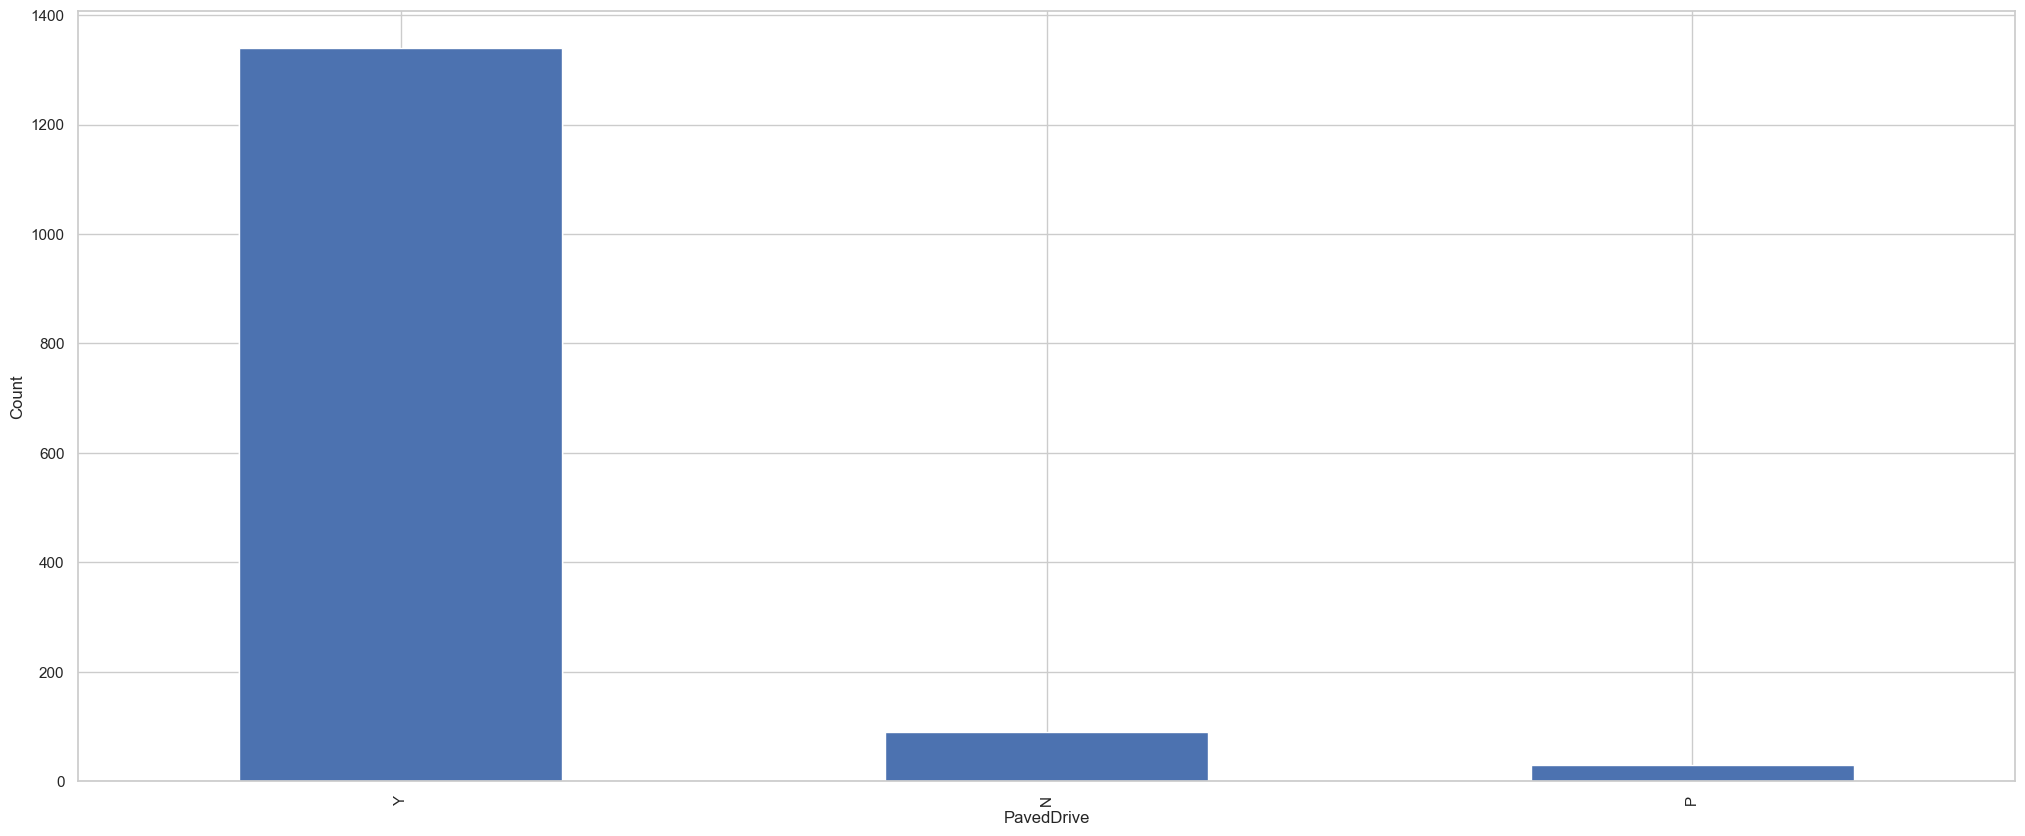

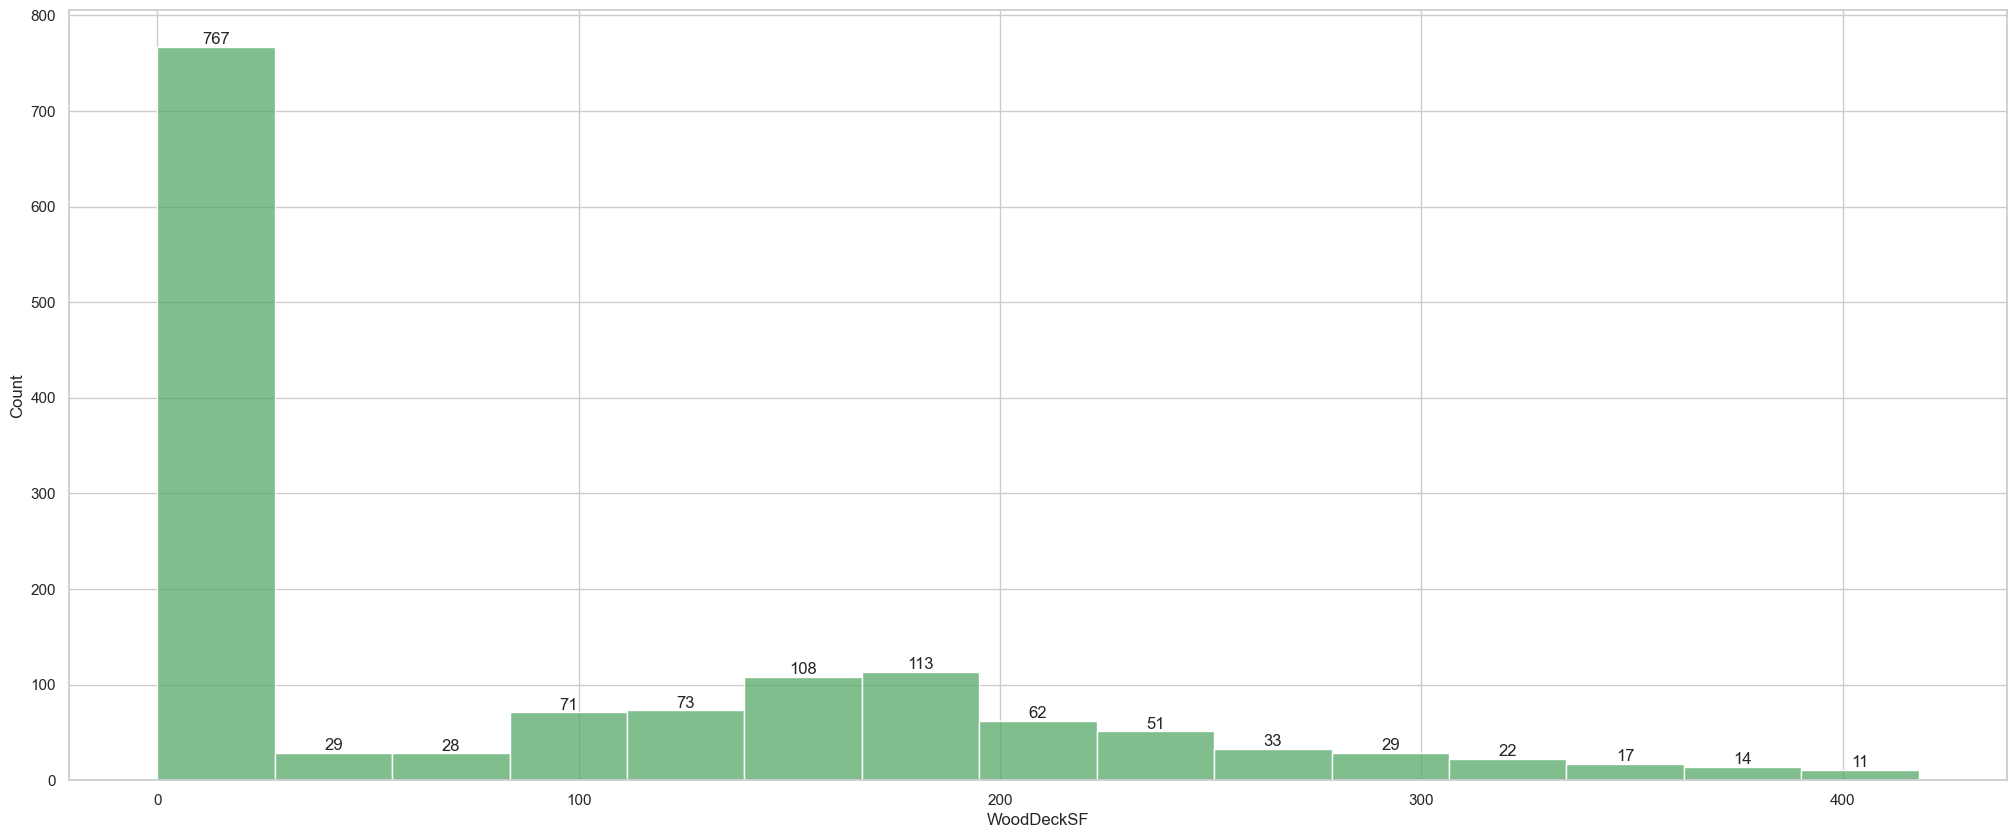

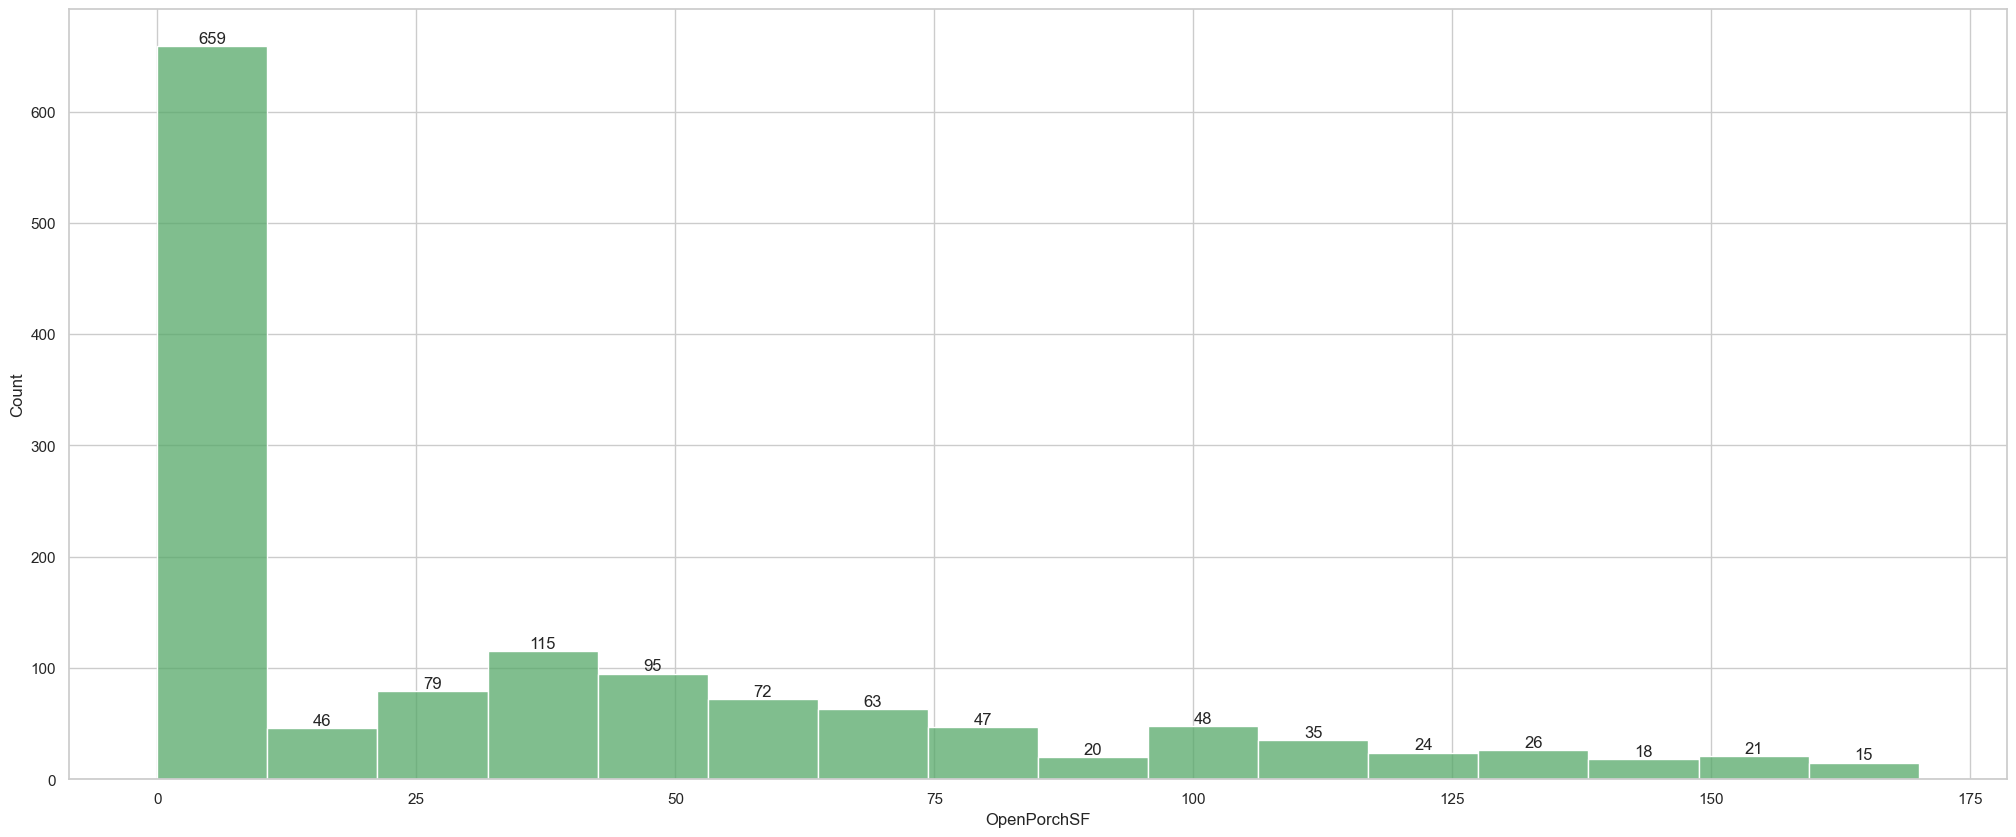

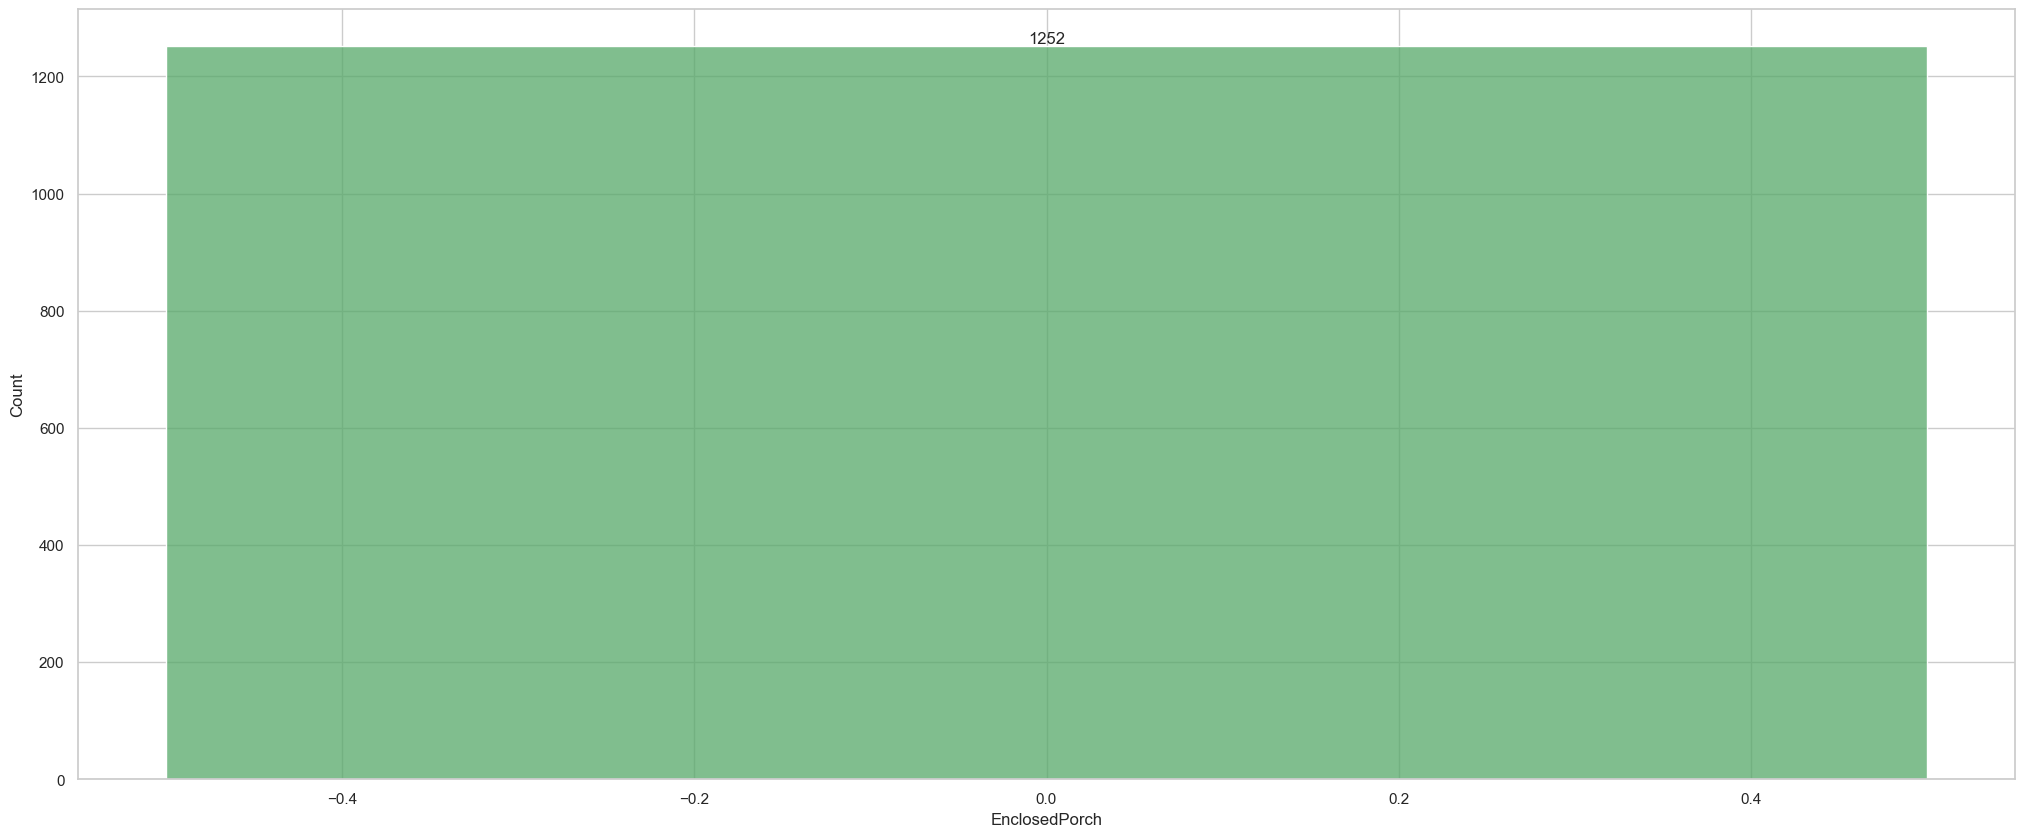

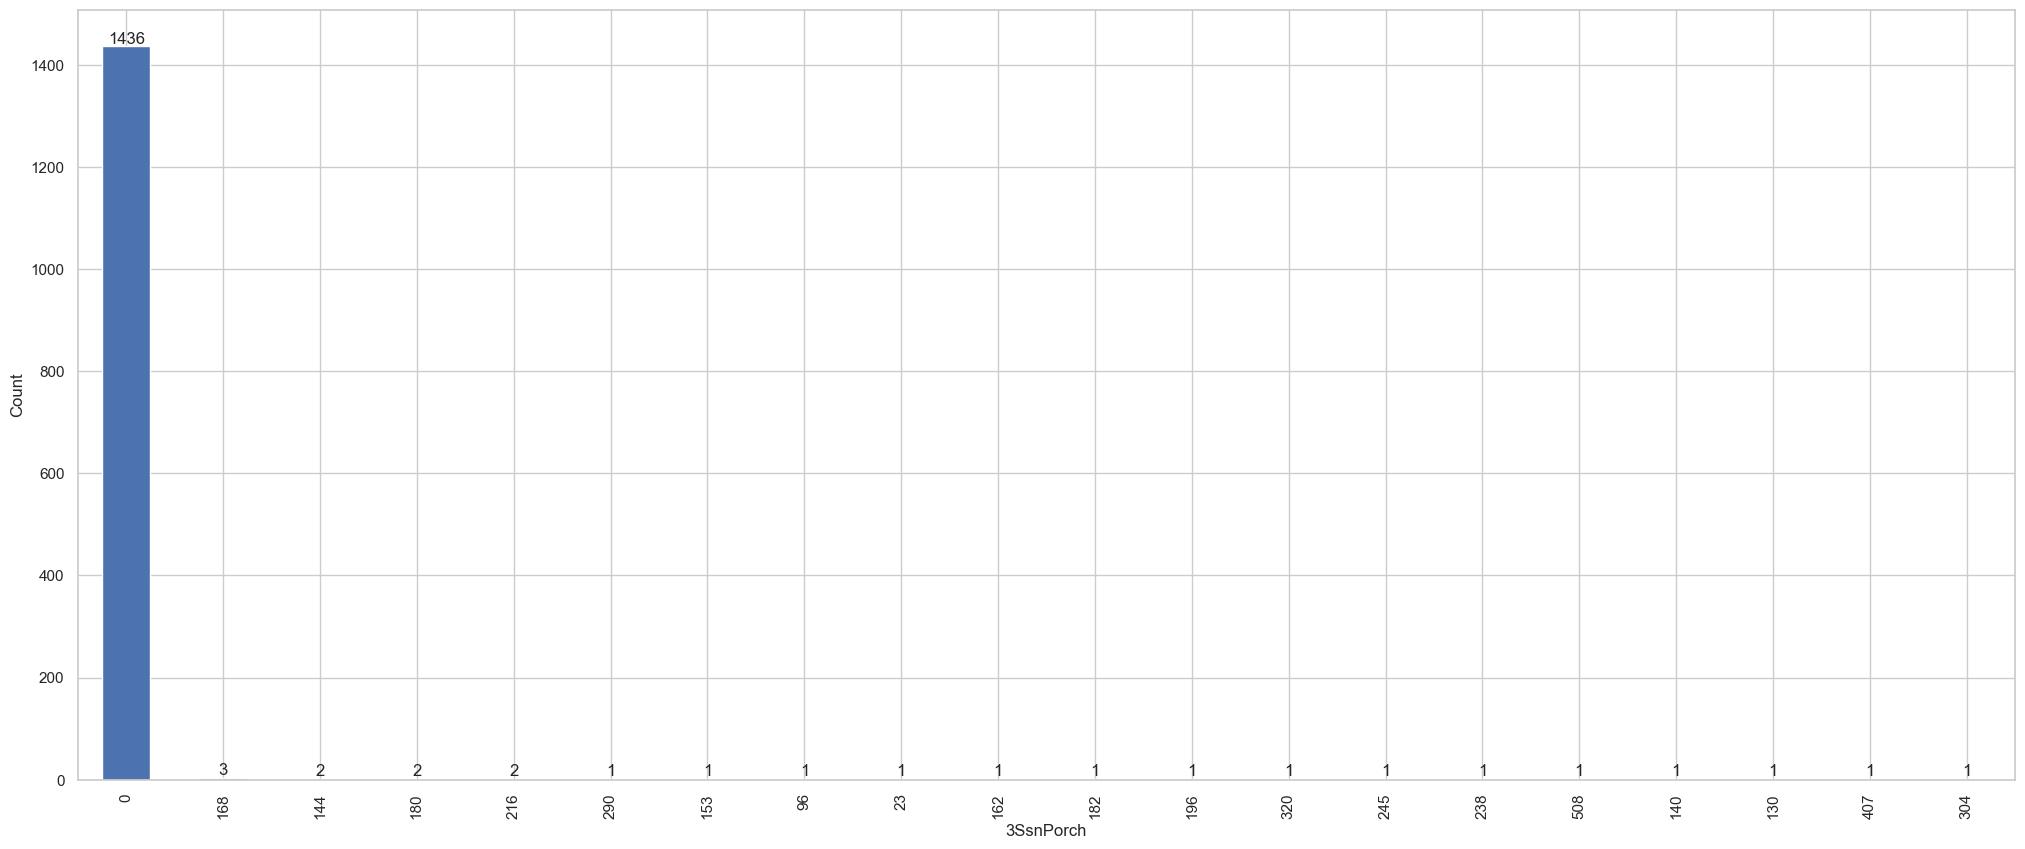

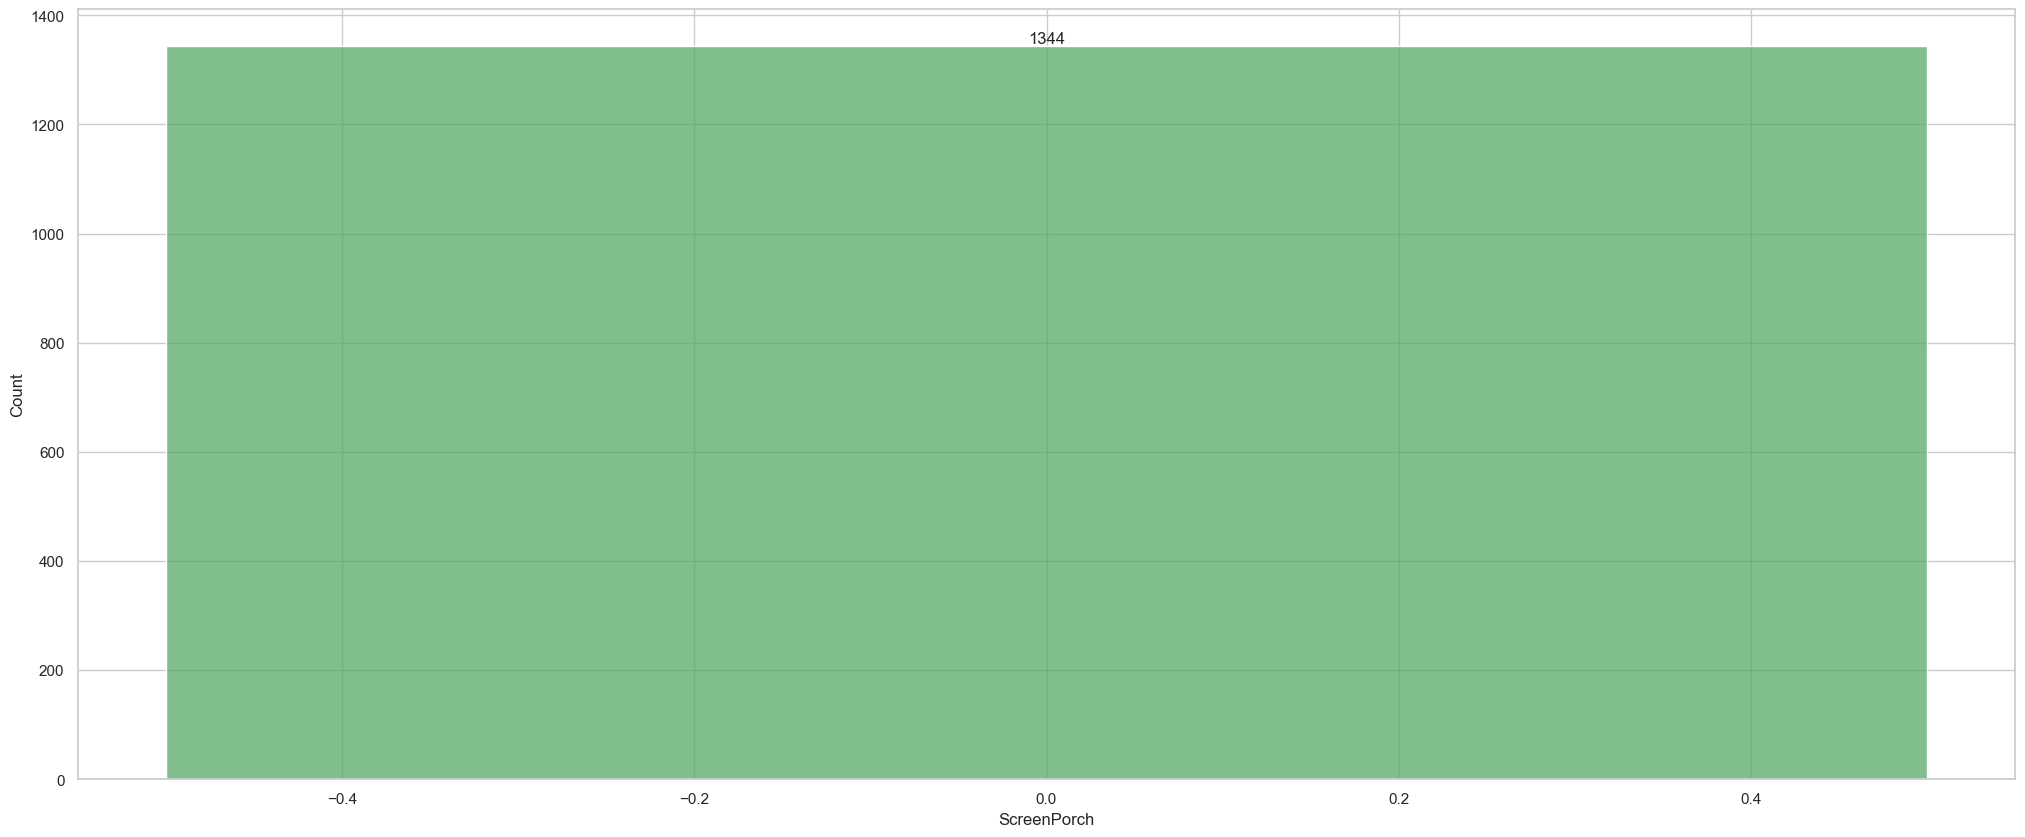

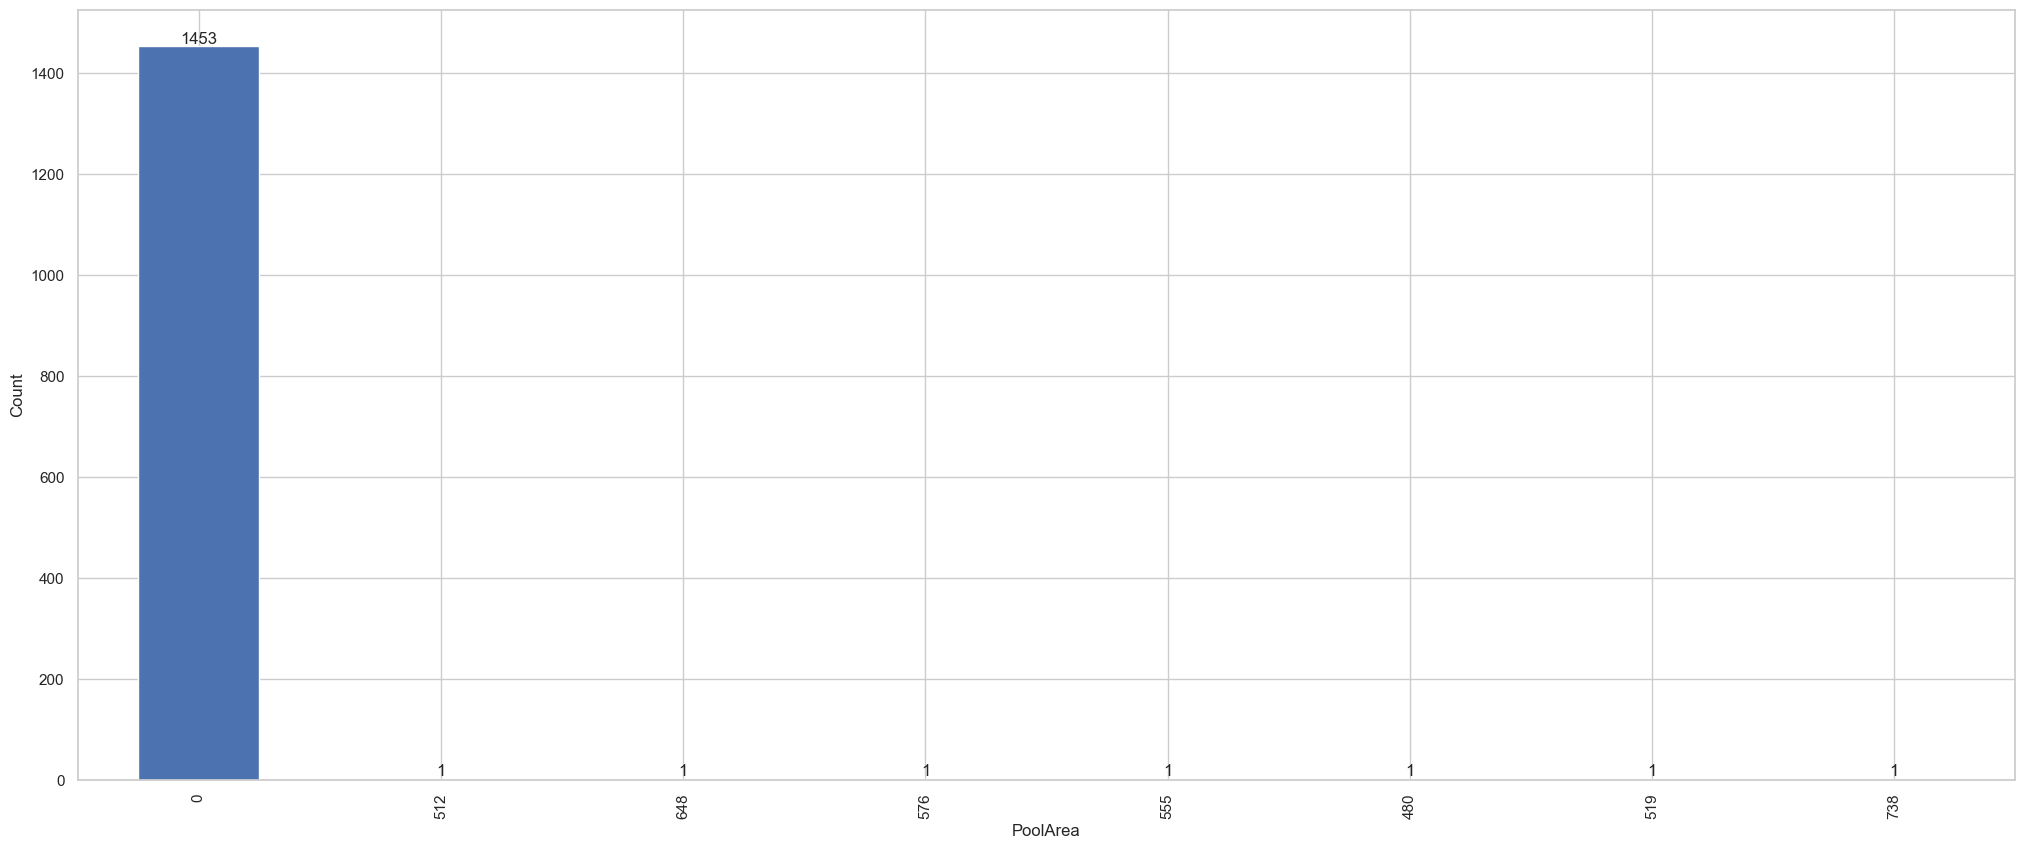

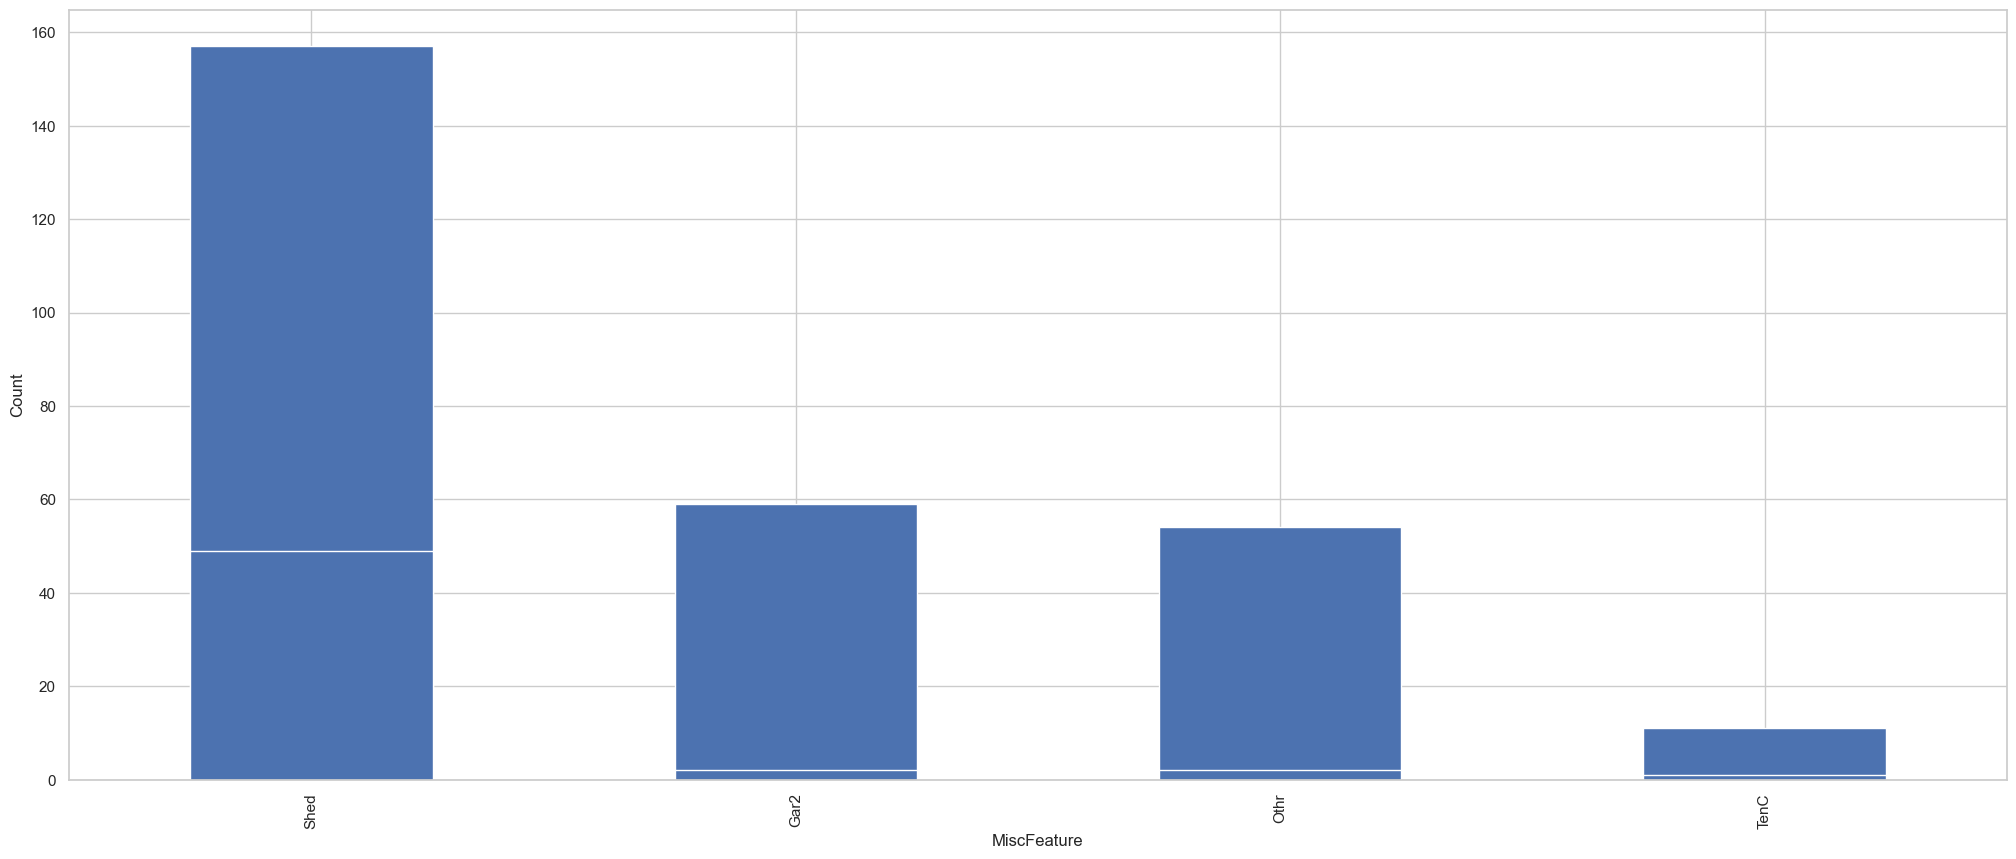

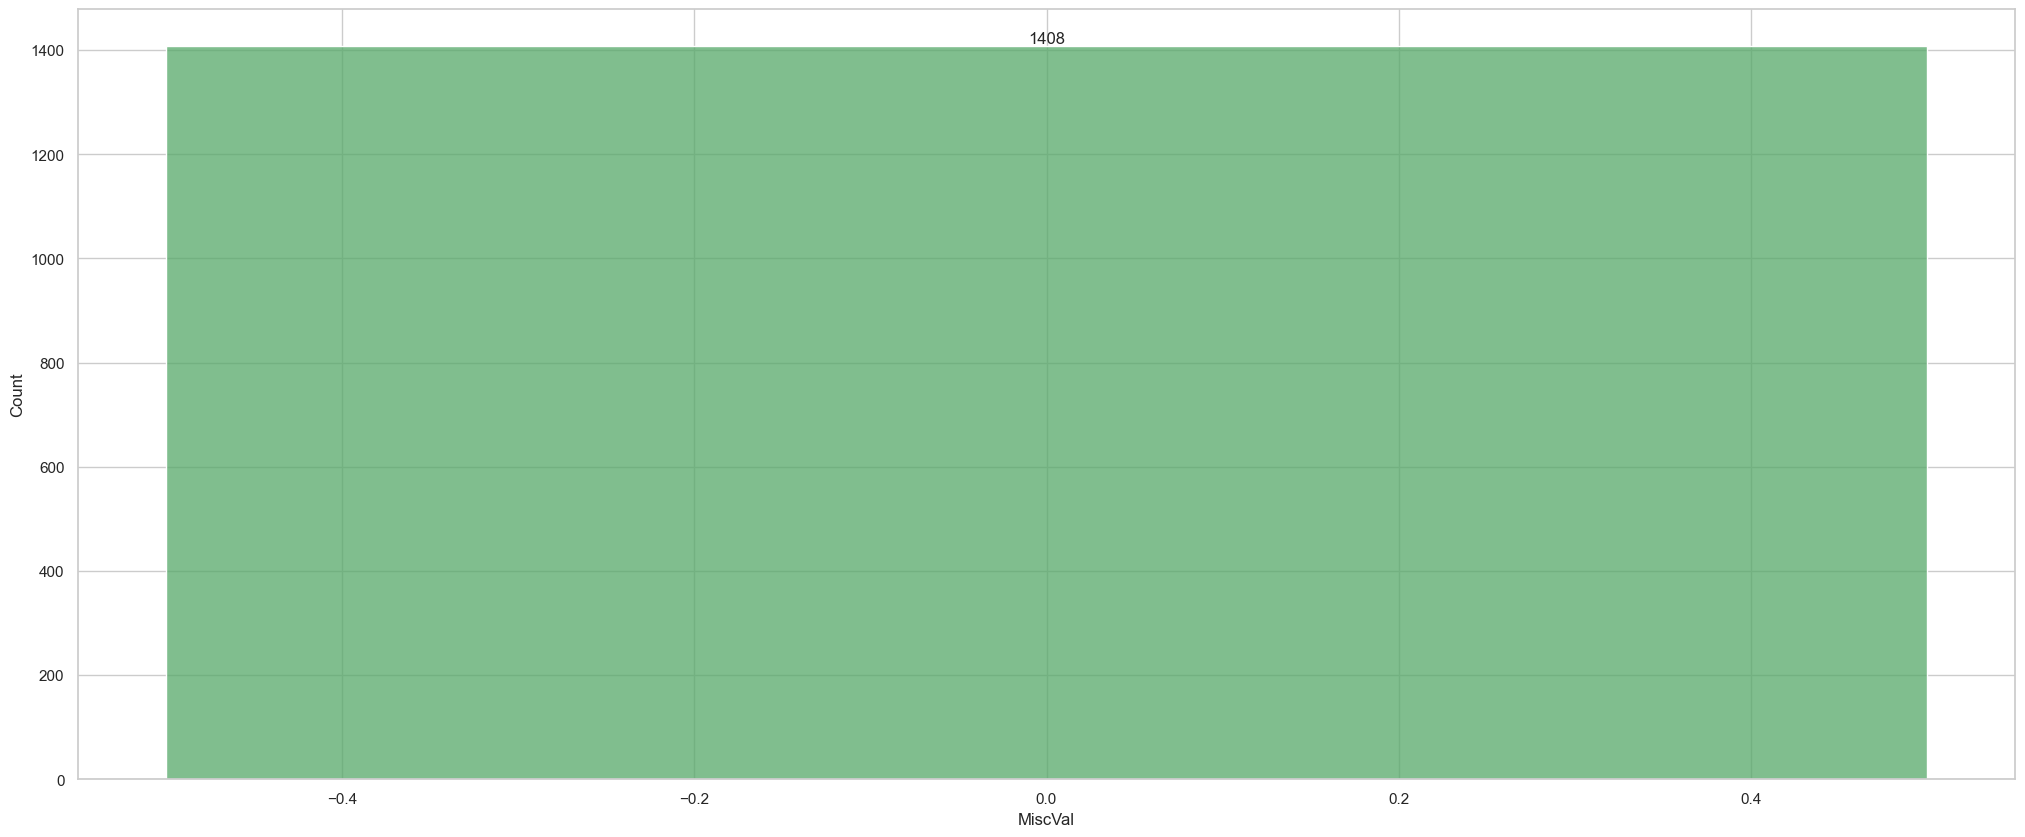

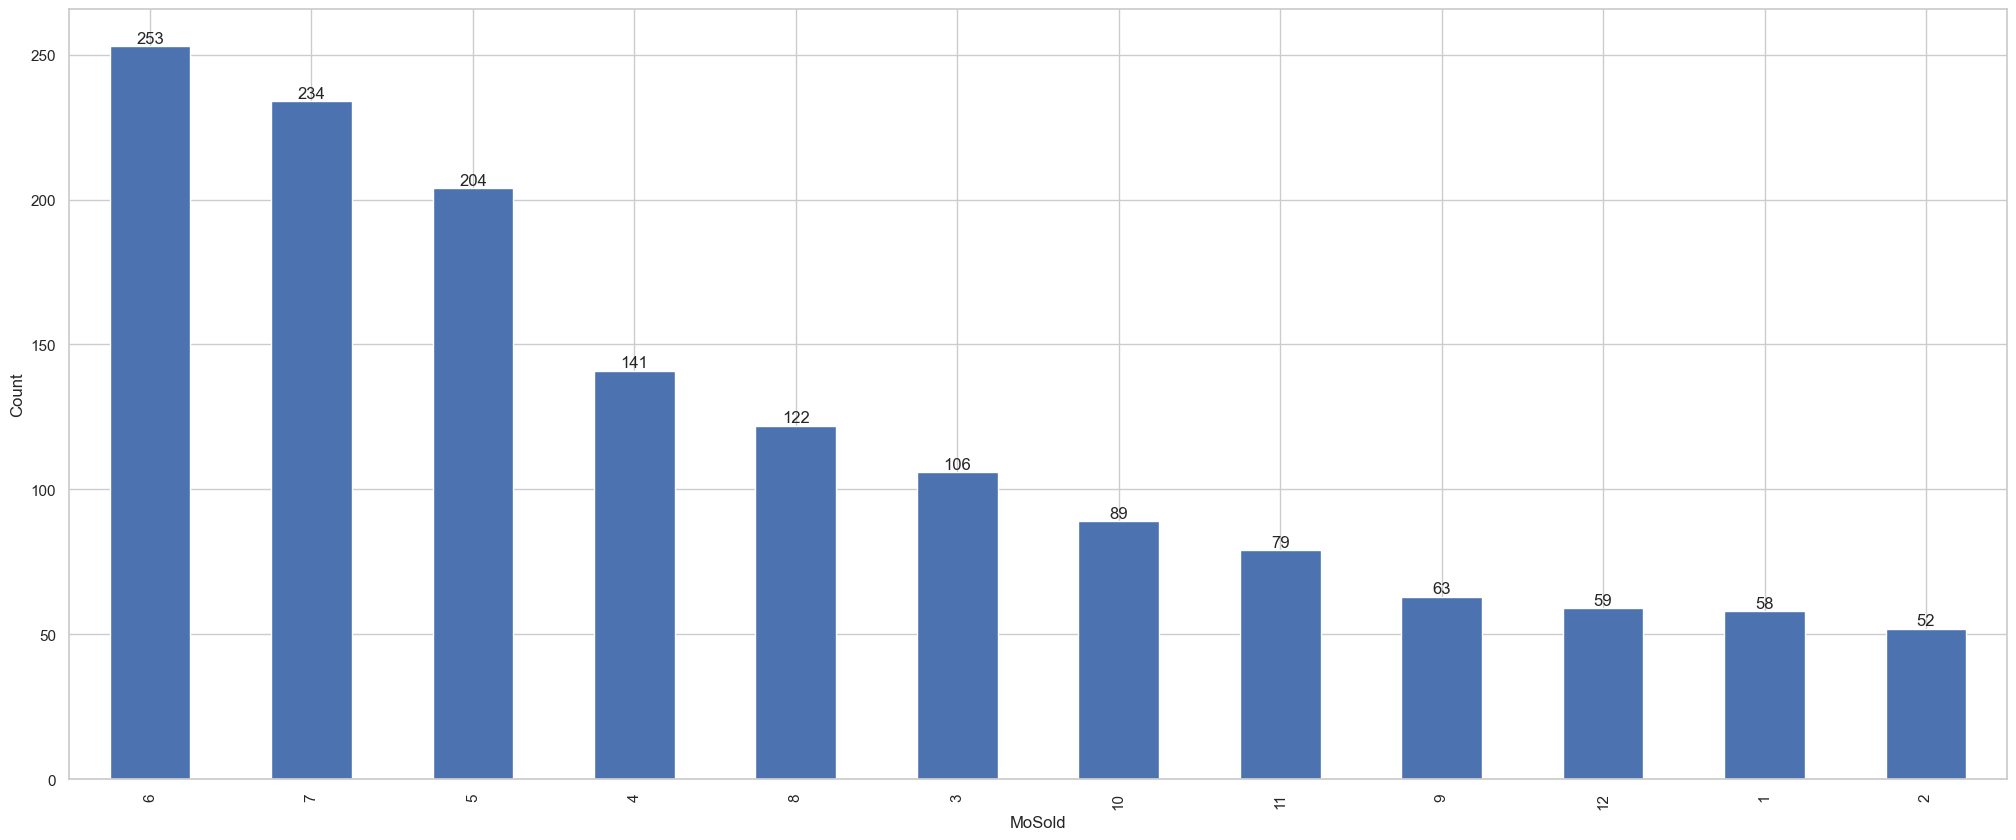

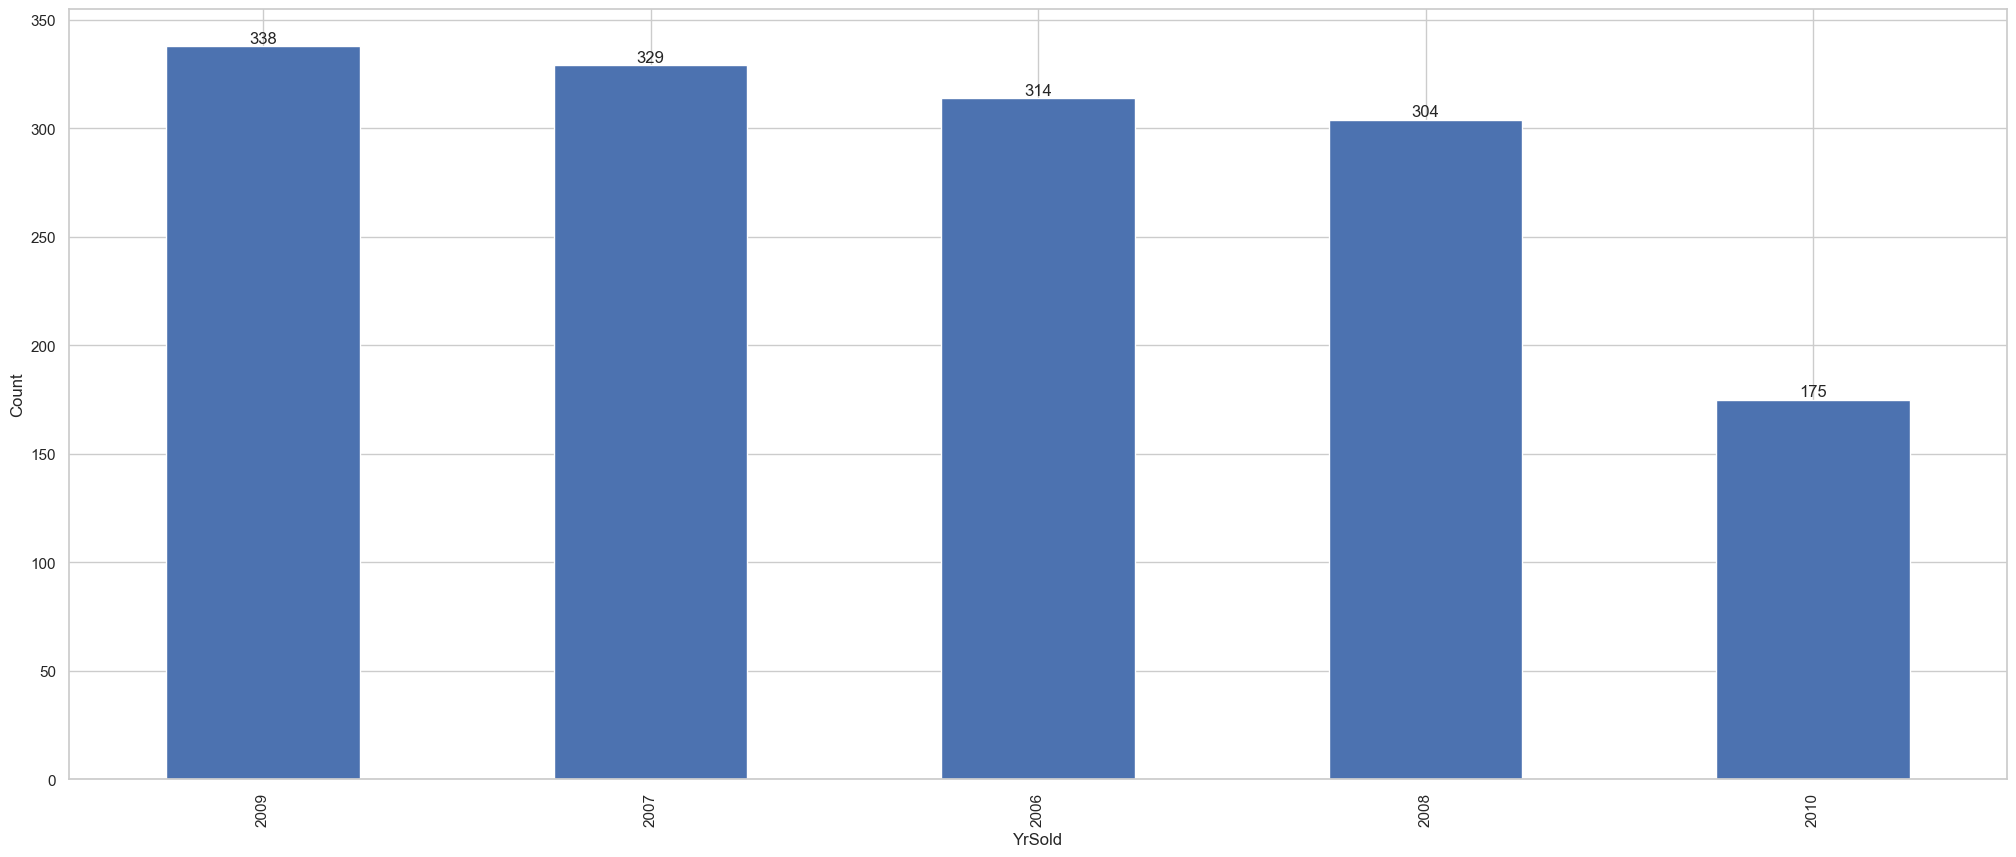

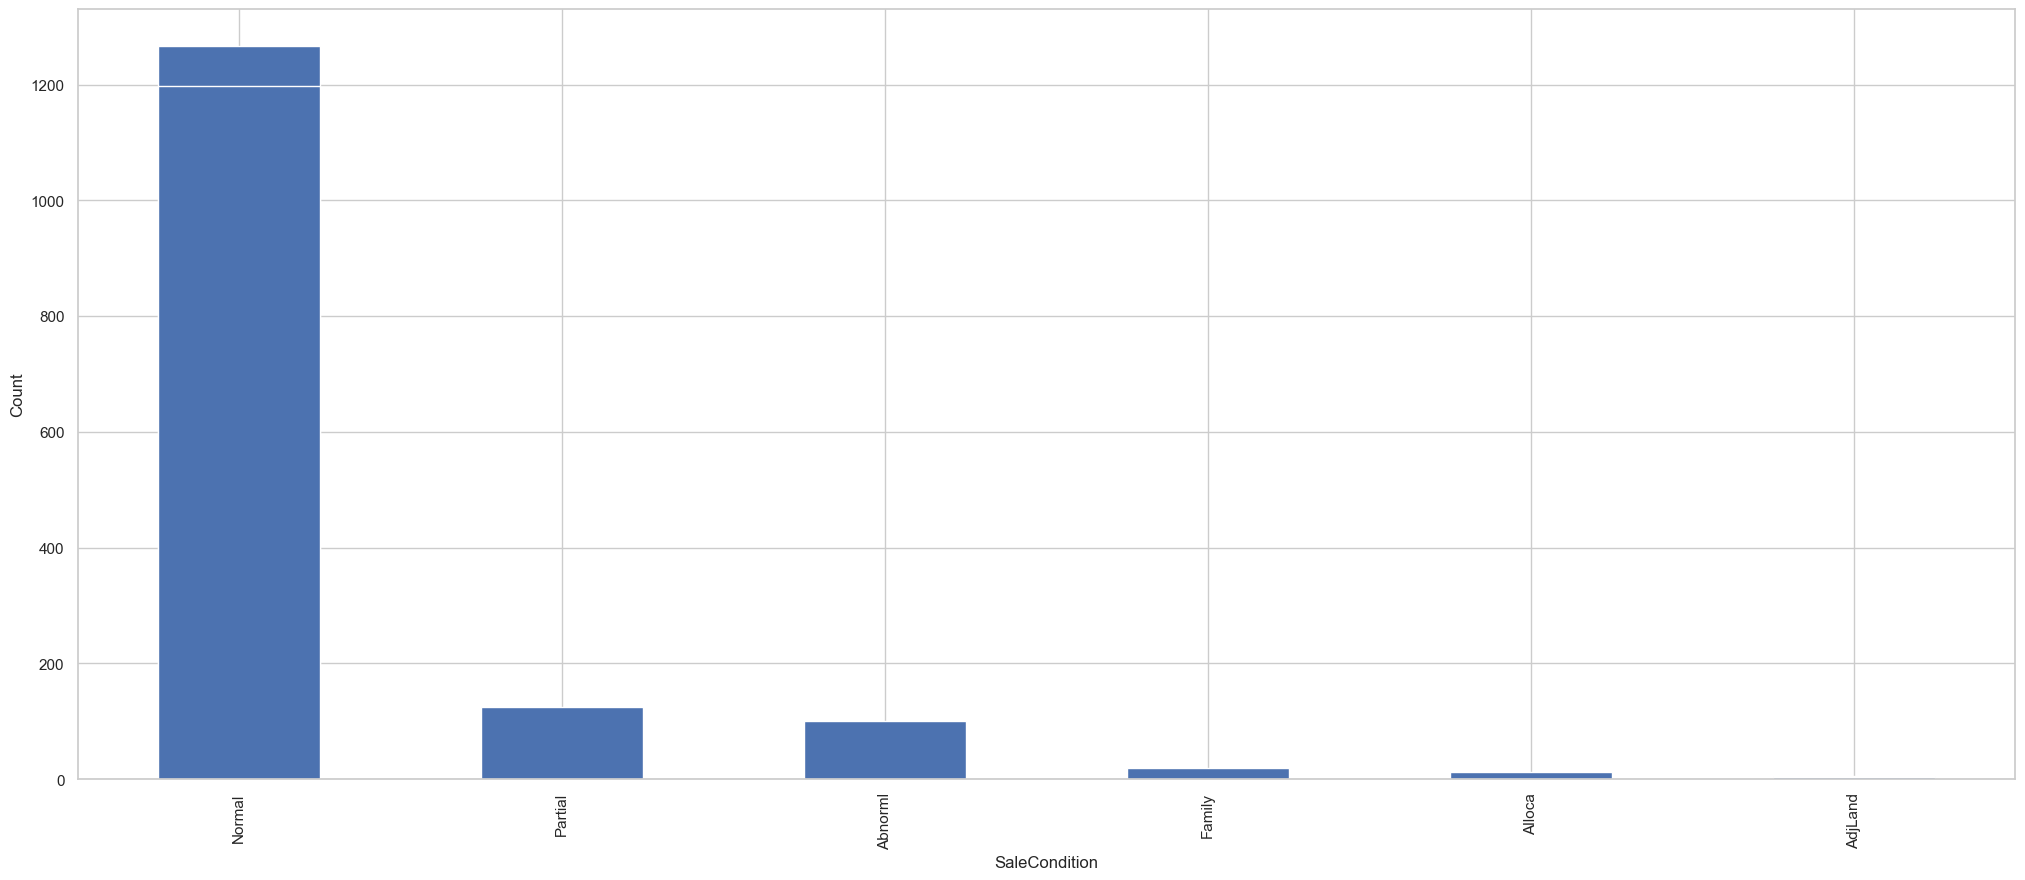

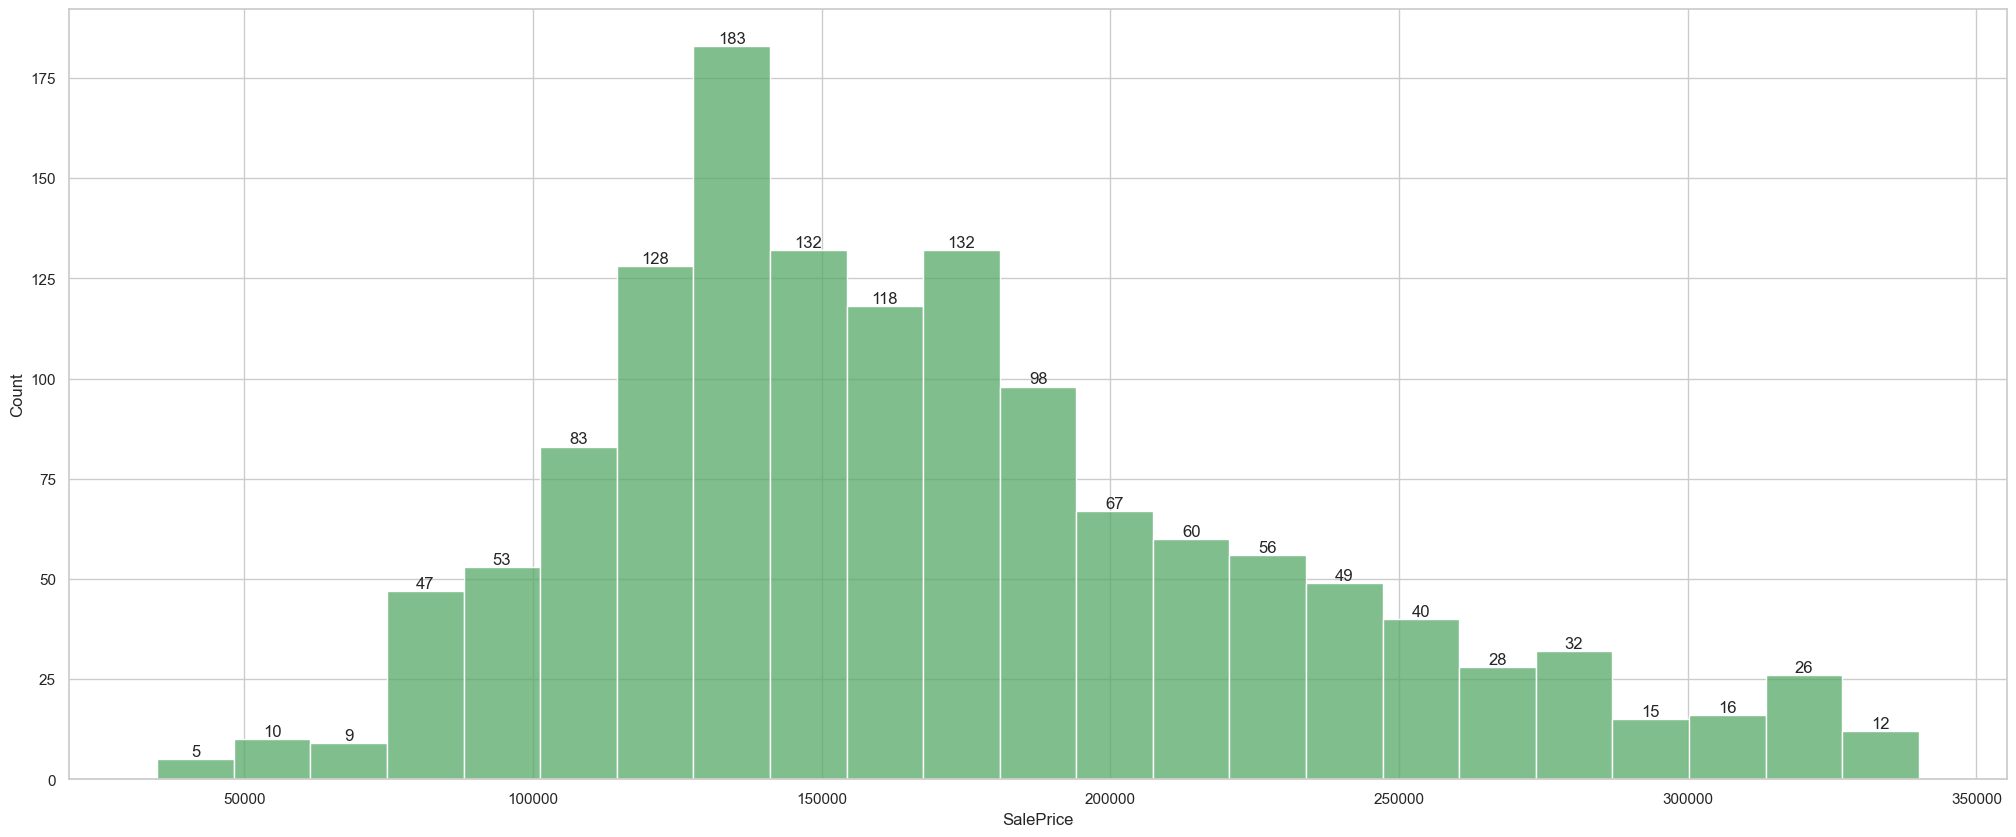

In [32]:
for i, predictor in enumerate(train):
    distribution_plot(str(predictor))
    #print(predictor)

<Axes: >

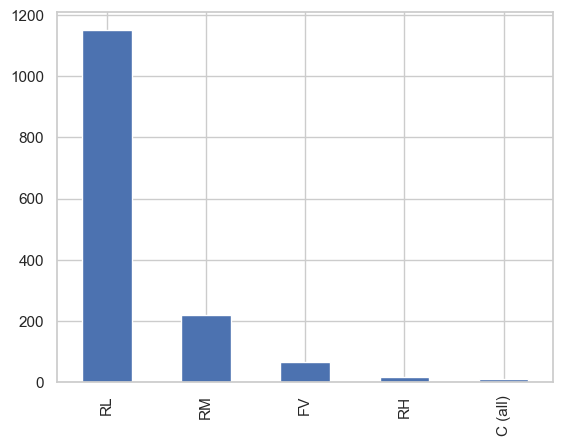

In [18]:
#distribution_plot('MSZoning')
train.MSZoning.value_counts().plot(kind='bar')

In [33]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

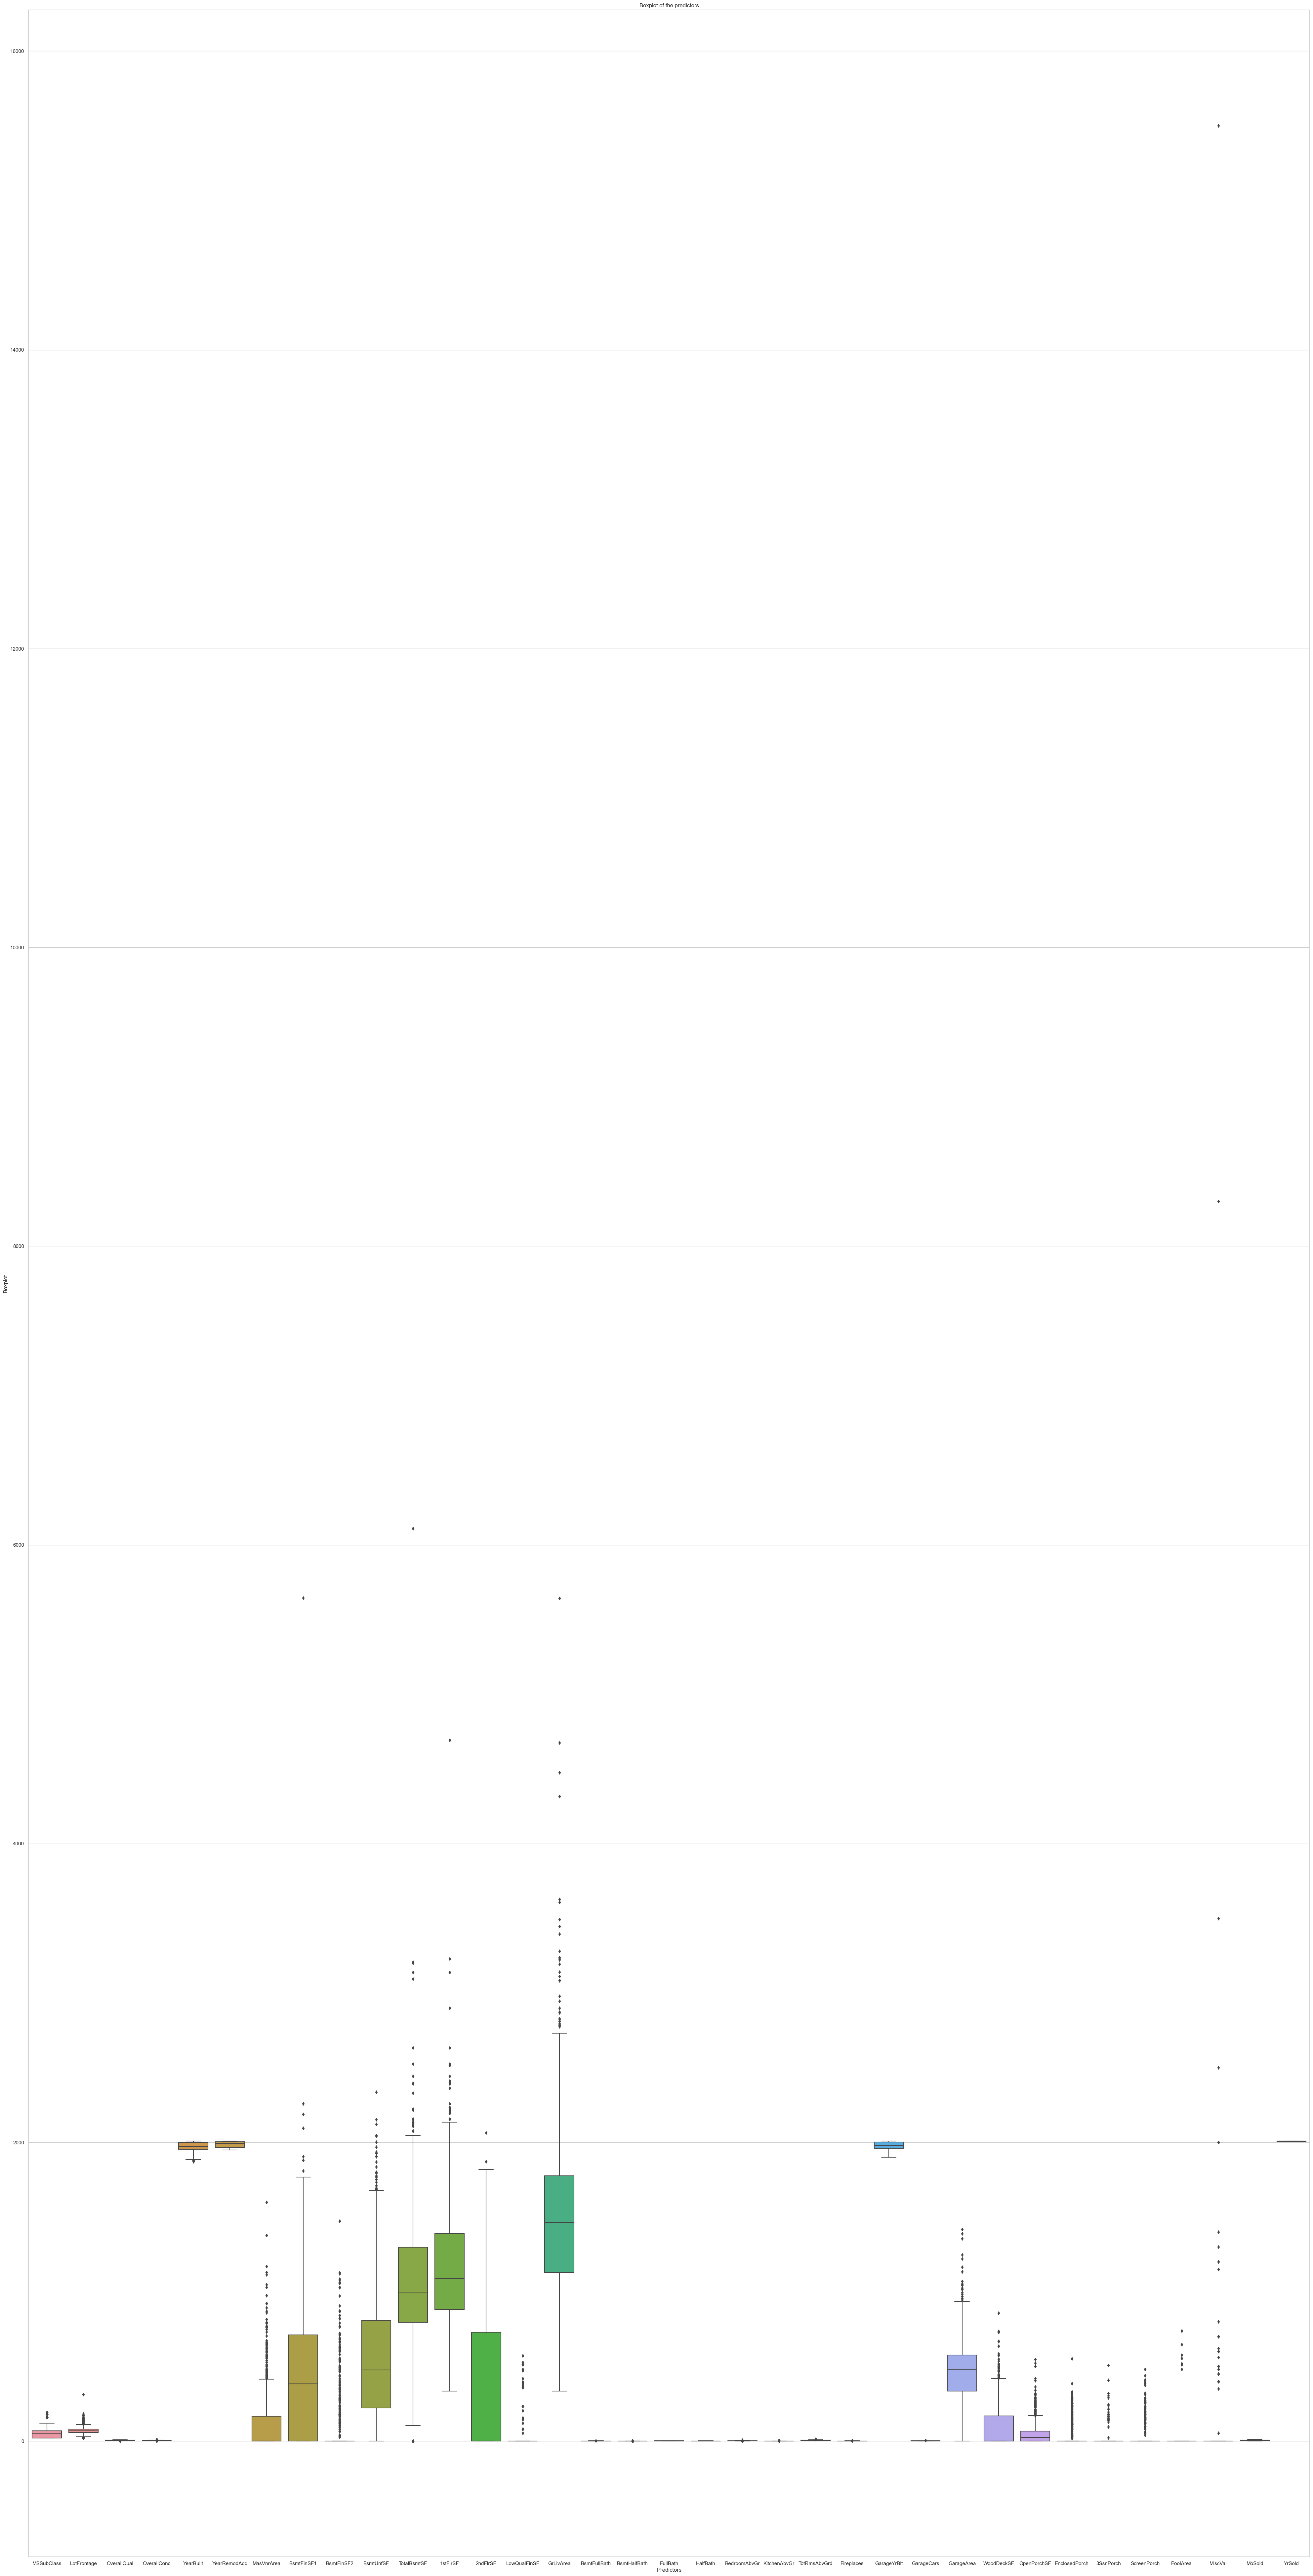

In [14]:
#Attempt to visualize outliers using box plot
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 100))
sns.boxplot(data=train.drop(columns=['SalePrice','LotArea']),ax=ax)
plt.xlabel("Predictors")
plt.ylabel("Boxplot")
plt.title("Boxplot of the predictors");

In [15]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [16]:
#count no of outliers
for i,j in train.items():
    if train[i].dtypes != 'O':
        #make sure it is not object type and apply fillna
        print('Column Name : ', i)
        print('No of outliers : ', len(find_anomalies(train[i].fillna(0))))
        print('Outliers % : ', round(len(find_anomalies(train[i].fillna(0)))/train.shape[0]*100,2))
        #if it is a float type, convert to int
        if train[i].dtypes == 'float64':
            print('Column Name : ', i)
            print('No of outliers : ', len(find_anomalies(train[i].fillna(0).astype(int))))
            print('Outliers % : ', round(len(find_anomalies(train[i].fillna(0).astype(int)))/train.shape[0]*100,2))

Column Name :  MSSubClass
No of outliers :  30
Outliers % :  2.05
Column Name :  LotFrontage
No of outliers :  6
Outliers % :  0.41
Column Name :  LotFrontage
No of outliers :  6
Outliers % :  0.41
Column Name :  LotArea
No of outliers :  13
Outliers % :  0.89
Column Name :  OverallQual
No of outliers :  2
Outliers % :  0.14
Column Name :  OverallCond
No of outliers :  28
Outliers % :  1.92
Column Name :  YearBuilt
No of outliers :  6
Outliers % :  0.41
Column Name :  YearRemodAdd
No of outliers :  0
Outliers % :  0.0
Column Name :  MasVnrArea
No of outliers :  32
Outliers % :  2.19
Column Name :  MasVnrArea
No of outliers :  32
Outliers % :  2.19
Column Name :  BsmtFinSF1
No of outliers :  6
Outliers % :  0.41
Column Name :  BsmtFinSF2
No of outliers :  50
Outliers % :  3.42
Column Name :  BsmtUnfSF
No of outliers :  11
Outliers % :  0.75
Column Name :  TotalBsmtSF
No of outliers :  10
Outliers % :  0.68
Column Name :  1stFlrSF
No of outliers :  12
Outliers % :  0.82
Column Name :  2n

Let's take MSSubClass as a case study of reducing outliers

<Axes: xlabel='MSSubClass'>

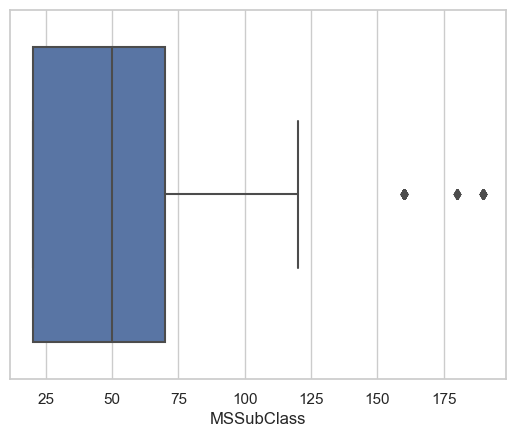

In [17]:
#create box and whisker plot for MSSubClass
sns.boxplot(x=train.MSSubClass)

There are some outliers can be seen. Let's try to use log transform to see if it solves this issue.

<Axes: xlabel='MSSubClass'>

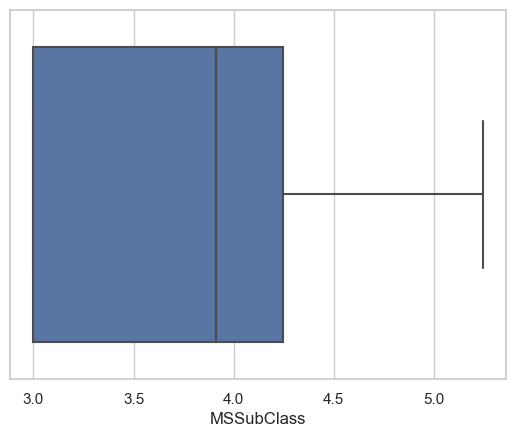

In [18]:
import numpy as np
sns.boxplot(x=np.log(train.MSSubClass))

Practically, the outliers have been fixed. Let's try to use winsorize technique next.

<Axes: >

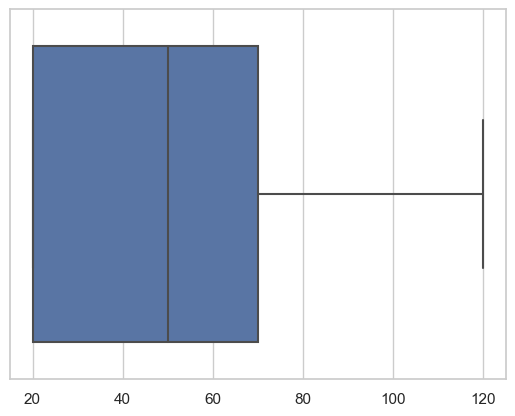

In [19]:
from scipy.stats.mstats import winsorize
sns.boxplot(x=winsorize(train.MSSubClass,(0.01,0.08)))

The advantage of winsorize technique is that you can adjust the percentile until you eliminate outliers. 

Winsorization is essentially similar to imputing, but instead of imputing extreme values with mean, median, mode, min or max values, we imput those outliers with our chosen percentile.For example, 91% winsorization means the replacement of the top 8% and bottom 1% of the data. The top 8% of the data is replaced by the value of the data at the 92nd percentile and the value of the bottom 1% of the data is replaced by the value of the data at the 1st percentile.

We can see the influence of log transform using describe to see the value, instead of box and whisker plot.

In [20]:
train.MSSubClass.describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [21]:
np.log(train.MSSubClass).describe()

count    1460.000000
mean        3.791061
std         0.704706
min         2.995732
25%         2.995732
50%         3.912023
75%         4.248495
max         5.247024
Name: MSSubClass, dtype: float64

Data Exploration

Numerical Analysis

C:\Users\oggy0\AppData\Local\Temp\ipykernel_16668\3087957357.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.791'),
 Text(0, 0, '0.709'),
 Text(0, 0, '0.640'),
 Text(0, 0, '0.623'),
 Text(0, 0, '0.614'),
 Text(0, 0, '0.606'),
 Text(0, 0, '0.561'),
 Text(0, 0, '0.534'),
 Text(0, 0, '0.523'),
 Text(0, 0, '0.507'),
 Text(0, 0, '0.486'),
 Text(0, 0, '0.477'),
 Text(0, 0, '0.467'),
 Text(0, 0, '0.386'),
 Text(0, 0, '0.352'),
 Text(0, 0, '0.324'),
 Text(0, 0, '0.319'),
 Text(0, 0, '0.316'),
 Text(0, 0, '0.284'),
 Text(0, 0, '0.264'),
 Text(0, 0, '0.227'),
 Text(0, 0, '0.214'),
 Text(0, 0, '0.168'),
 Text(0, 0, '0.111'),
 Text(0, 0, '0.092'),
 Text(0, 0, '0.046'),
 Text(0, 0, '0.045'),
 Text(0, 0, '-0.011'),
 Text(0, 0, '-0.017'),
 Text(0, 0, '-0.021'),
 Text(0, 0, '-0.026'),
 Text(0, 0, '-0.029'),
 Text(0, 0, '-0.078'),
 Text(0, 0, '-0.084'),
 Text(0, 0, '-0.129'),
 Text(0, 0, '-0.136')]

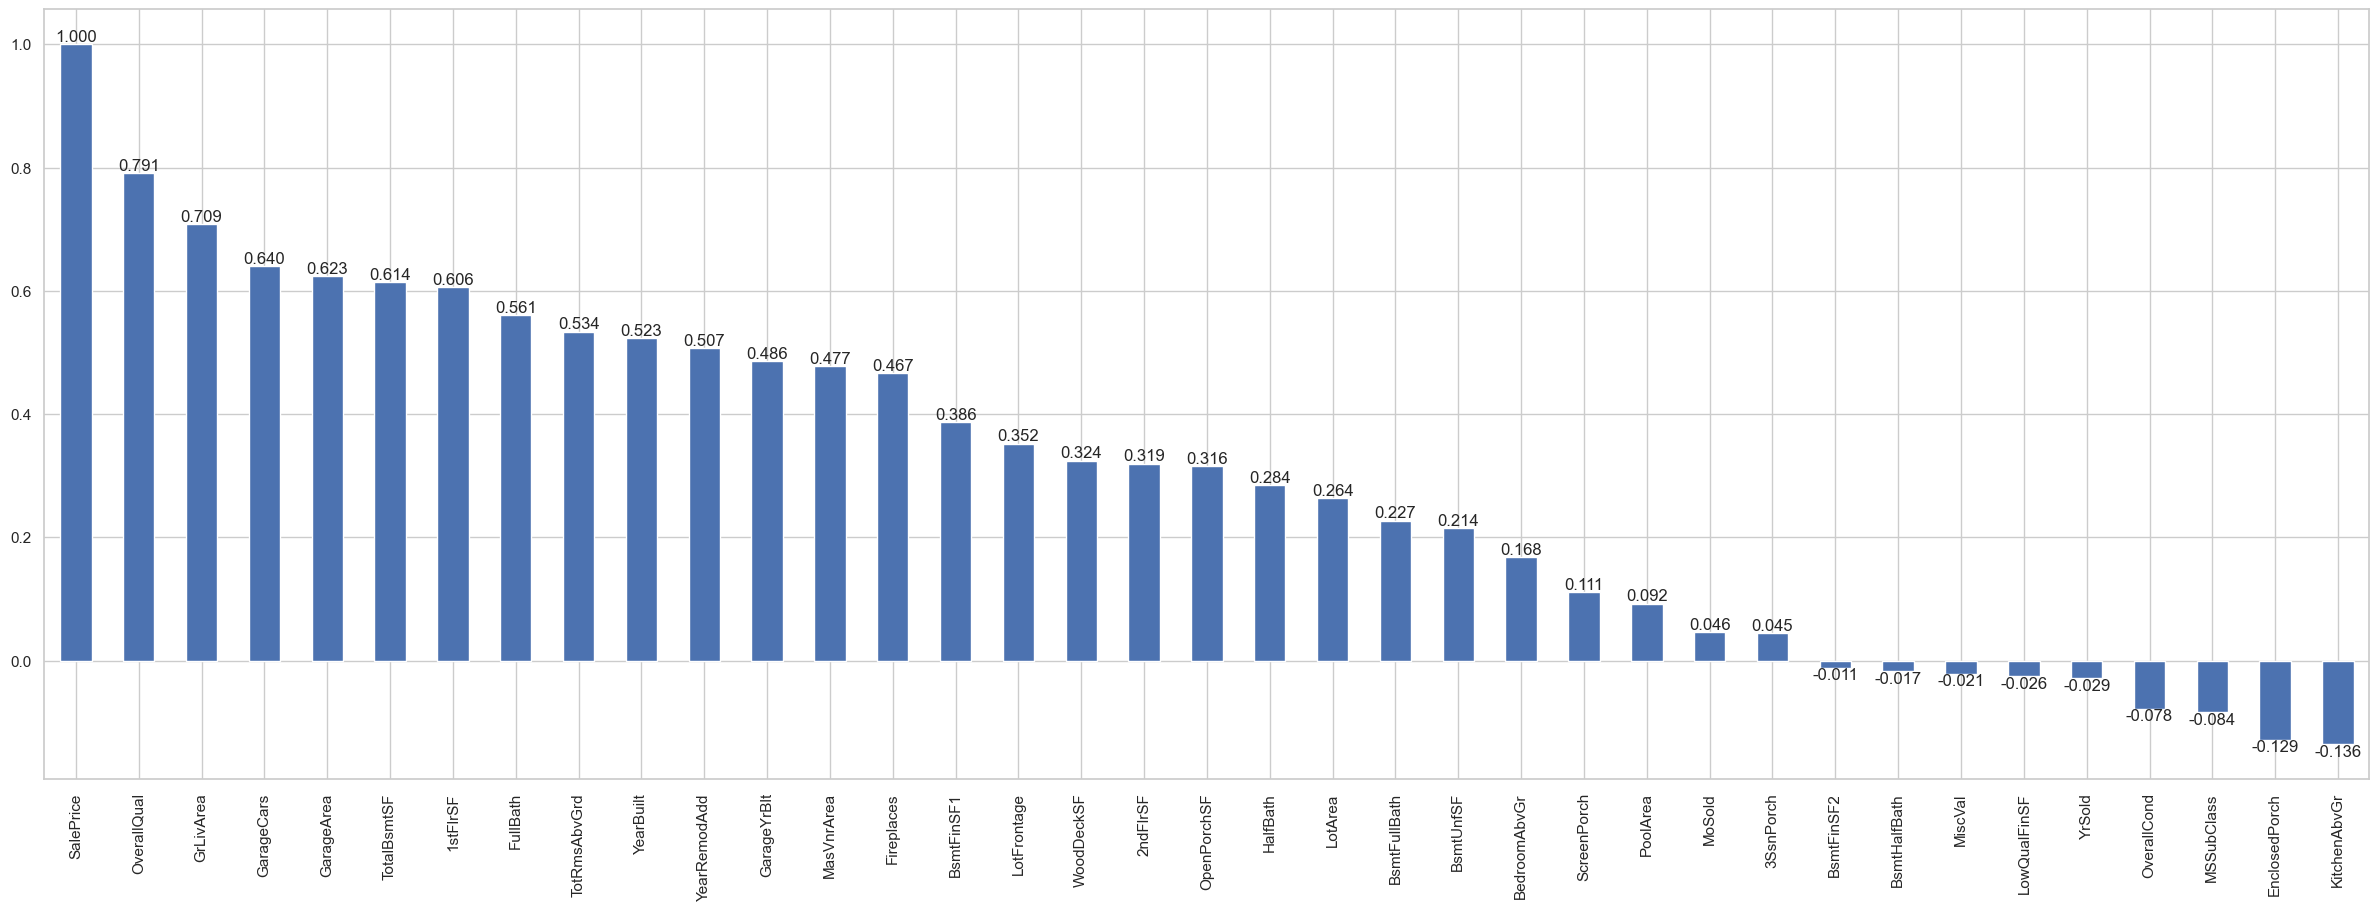

In [22]:
#check the correlation between columns and target variable
plt.figure(figsize=(30,10))
ax=train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

In [23]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

OverallQual and GrLivArea have strong positive correlation with SalePrice. GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea and Fireplaces have moderate positive correlation with SalePrice. 

C:\Users\oggy0\AppData\Local\Temp\ipykernel_16668\2023006245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='Paired')


<Axes: >

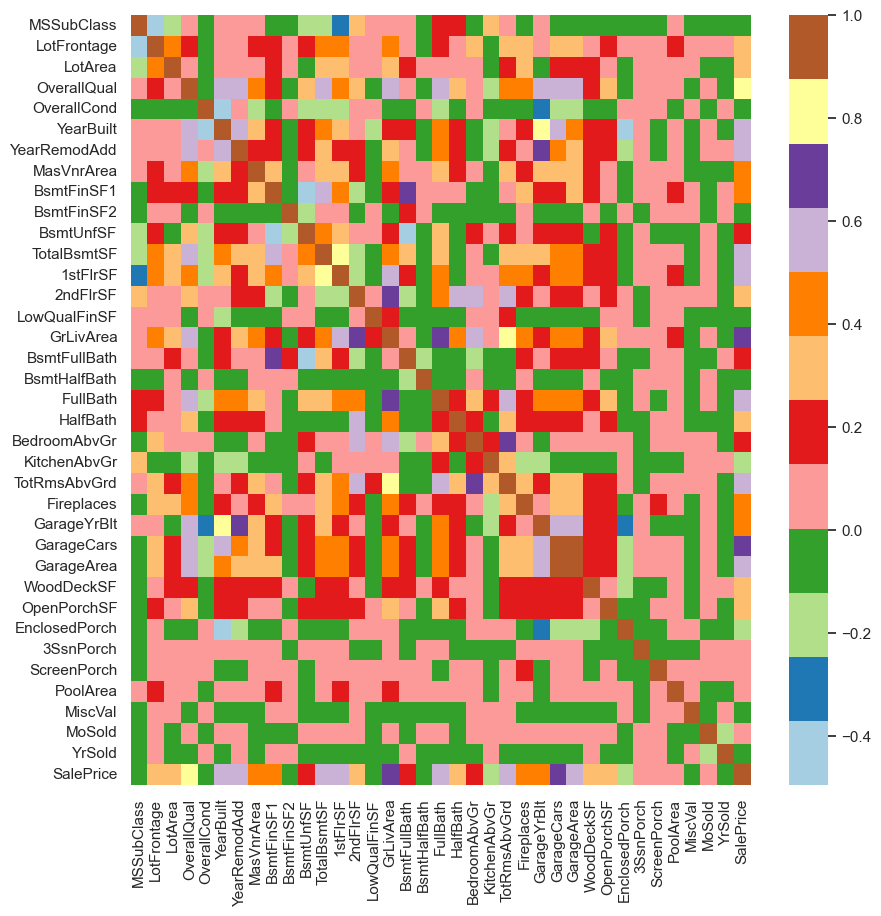

In [24]:
#check the correlation between columns using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='Paired')

Let's see the skewness of selected columns and see the effect of log transform on it. Skewness might help us to get some insights for columns with very low correlation. But in this case, we just use the strongly correlated columns to see the effect of log transform on skewness.

In [25]:
#check the skewness of each column
train.skew()

C:\Users\oggy0\AppData\Local\Temp\ipykernel_16668\1456700477.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

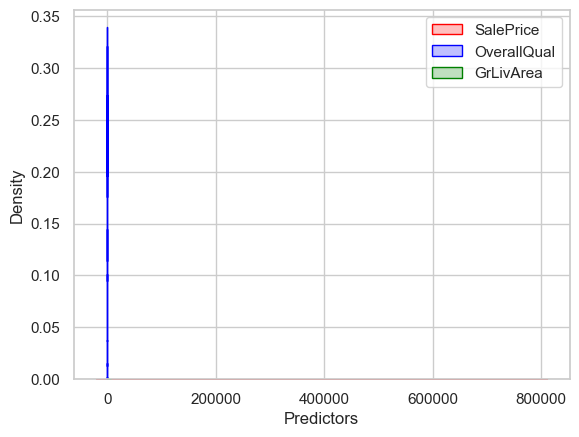

In [26]:
#visualize the skewness of the selected columns
ax = sns.kdeplot(train.SalePrice,color="Red", fill=True)
ax = sns.kdeplot(train.OverallQual,color="Blue", fill=True)
ax = sns.kdeplot(train.GrLivArea,color="Green", fill=True)
ax.set_xlabel("Predictors")
ax.set_ylabel("Density")
ax.legend(["SalePrice","OverallQual","GrLivArea"],loc='upper right')

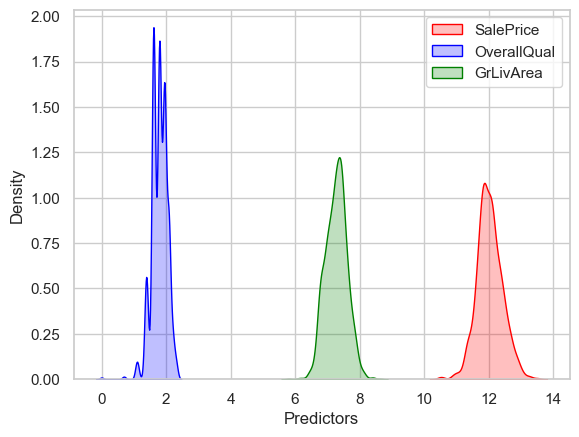

In [27]:
#visualize the skewness of the selected columns after applying logarithmic measure
ax = sns.kdeplot(np.log(train.SalePrice),color="Red", fill=True)
ax = sns.kdeplot(np.log(train.OverallQual),color="Blue", fill=True)
ax = sns.kdeplot(np.log(train.GrLivArea),color="Green", fill=True)
ax.set_xlabel("Predictors")
ax.set_ylabel("Density")
ax.legend(["SalePrice","OverallQual","GrLivArea"],loc='upper right')

In [28]:
np.log(train.SalePrice).skew()

0.12133506220520406

In [29]:
np.log(train.OverallQual).skew()

-0.9297813122818752

In [30]:
np.log(train.GrLivArea).skew()

-0.006995182187690808

All the selected columns are more asymmetrically distributed after the logarithmic measure

Univariate Analysis

Text(0, 0.5, 'Count of SalePrice')

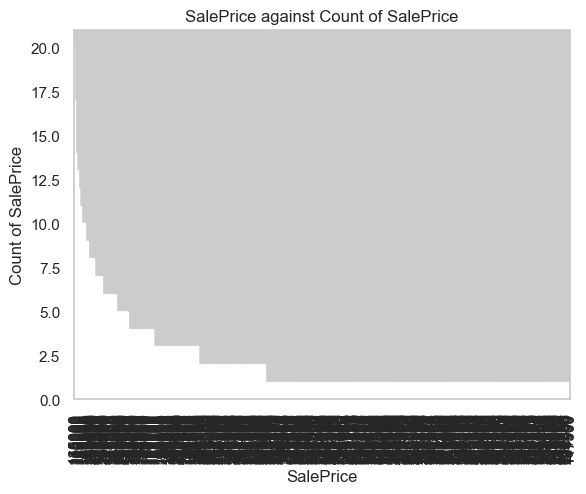

In [31]:
#visualize the distribution
ax=train.SalePrice.value_counts().plot(kind='bar',title='SalePrice against Count of SalePrice')
ax.set_xlabel("SalePrice")
ax.set_ylabel("Count of SalePrice")

Feature Binning to get insights

In [32]:
train_copy=train.copy()

In [ ]:
#binning for the rest
for i,j in train_copy:
    cut_bins = np.arange(train_copy[i].min(),train_copy[i].max(), 10)
    # Create a new column grouping column data into generations
    s= i + '_bins'
    train_copy[s] = pd.cut(train_copy[i], bins=cut_bins)

In [ ]:
for i, predictor in enumerate(train_copy):
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.figure(i)
    sns.countplot(data=train_copy, x=predictor, hue='SalePrice',ax=ax)

Feature Encoding object type columns

In [ ]:
# Number of unique classes in each object column
#train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

In [ ]:
# sklearn preprocessing for dealing with categorical variables
#from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
#le = LabelEncoder()
#le_count = 0

# Iterate through the columns
#for col in train:
#    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
 #       if len(list(train[col].unique())) <= 2:
            # Train on the training data
   #         le.fit(train[col])
            # Transform training data
   #         train[col] = le.transform(train[col])      
            # Keep track of how many columns were label encoded
    #        le_count += 1
            
#print('%d columns were label encoded.' % le_count)

In [ ]:
# Create a label encoder object
#le = LabelEncoder()
#le_count = 0

# Iterate through the columns
#for col in test:
#    if test[col].dtype == 'object':
        # If 2 or fewer unique categories
#        if len(list(test[col].unique())) <= 2:
            # test on the testing data
#            le.fit(test[col])
            # Transform testing data
#            test[col] = le.transform(test[col])      
            # Keep track of how many columns were label encoded
 #           le_count += 1
            
p#rint('%d columns were label encoded.' % le_count)

In [ ]:
# one-hot encoding of categorical variables
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)

#print('Training Features shape: ', train.shape)
#print('Testing Features shape: ', test.shape)

In [ ]:
#train_labels = train['SalePrice']

# Align the training and testing data, keep only columns present in both dataframes
#train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
#train['SalePrice'] = train_labels

#print('Training Features shape: ', train.shape)
#print('Testing Features shape: ', test.shape)

Correlation :
.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

In [35]:
# Find correlations with the target and sort
correlations = train.corr()['SalePrice'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(30))
print('\nMost Negative Correlations:\n', correlations.head(30))

Most Positive Correlations:
 BsmtHalfBath   -0.016844
BsmtFinSF2     -0.011378
3SsnPorch       0.044584
MoSold          0.046432
PoolArea        0.092404
ScreenPorch     0.111447
BedroomAbvGr    0.168213
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
LotFrontage     0.351799
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

Most Negative Correlations:
 KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Mis

C:\Users\oggy0\AppData\Local\Temp\ipykernel_16668\344627379.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()['SalePrice'].sort_values()


OverallQual, GrLivArea, GarageCars and GarageArea have strong positive correlation with SalePrice. TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,Neighborhood_NridgHt, GarageFinish_Fin, HeatingQC_Ex, BsmtFinType1_GLQ, ExterQual_Ex and ExterQual_Gd have moderate positive correlation with SalePrice. 

Univariate & Bivariate Analysis

Let's see how the columns with positive strong correlation and the one with most negative correlation influence the distribution of SalePrice. But first, let's see their individual distribution via histogram

Text(0.5, 0, 'SalePrice')

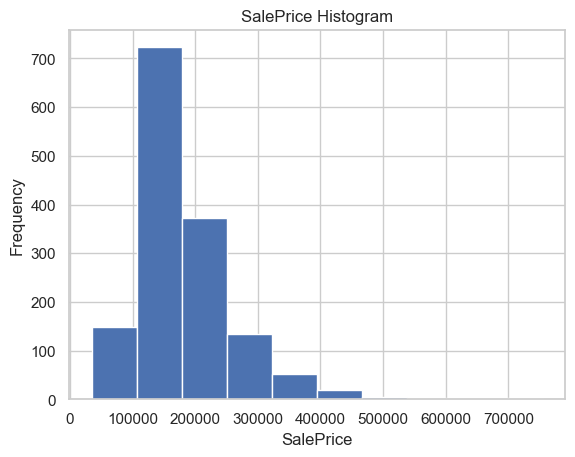

In [36]:
train['SalePrice'].plot.hist(title = 'SalePrice Histogram')
plt.xlabel('SalePrice')

About half of the houses' sale prices are between 100000-200000 and a quarter of them are at 200000-300000.

Text(0.5, 0, 'OverallQual')

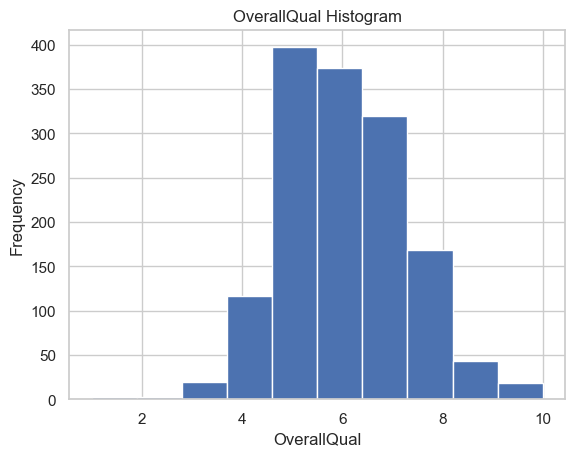

In [37]:
train['OverallQual'].plot.hist(title = 'OverallQual Histogram')
plt.xlabel('OverallQual')

The majority distribution of OverallQual or Rates the overall material and finish of the house are between 5-7 scores which means most of the houses are at least at average or better standard in terms of material and finish.

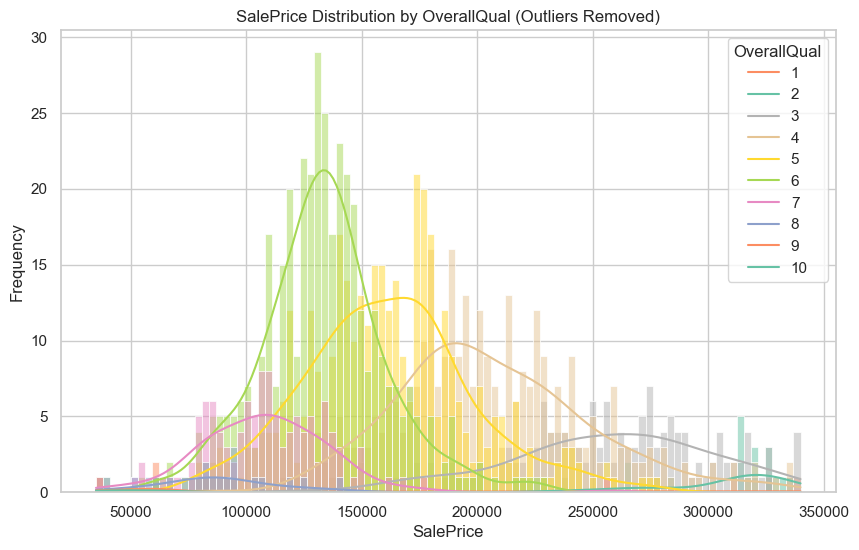

In [9]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_train = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_train, x='SalePrice', hue='OverallQual', kde=True, bins=100, palette="Set2")
plt.title('SalePrice Distribution by OverallQual (Outliers Removed)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(["1","2","3","4","5","6","7","8","9","10"],title='OverallQual')
plt.show()

The graph above shows the correlation between OverallQual and SalePrice as the OverallQual between 5-7 are the majority with SalePrice between 100000-200000. The top rated OverallQual (10) is definitely within the highest margin of SalePrice but the houses from lower bracket of OverallQual can also reach the top margin of SalePrice like OverallQual at 3. Hence, OverallQual is just one of the factor affecting the SalePrice.   

In [14]:
train['GrLivArea'].value_counts(bins=1000)

(859.492, 864.8]        24
(986.884, 992.192]      17
(1039.964, 1045.272]    16
(1570.764, 1576.072]    14
(1655.692, 1661.0]      14
                        ..
(3396.716, 3402.024]     0
(3402.024, 3407.332]     0
(3407.332, 3412.64]      0
(3412.64, 3417.948]      0
(2988.0, 2993.308]       0
Name: GrLivArea, Length: 1000, dtype: int64

Text(0.5, 0, 'GrLivArea')

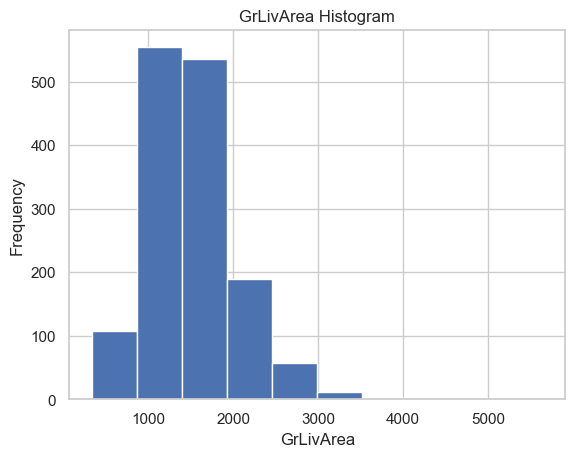

In [40]:
train['GrLivArea'].plot.hist(title = 'GrLivArea Histogram')
plt.xlabel('GrLivArea')

The majority of GrLivArea or Above grade (ground) living area square feet are between 1000-2000 square feet.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


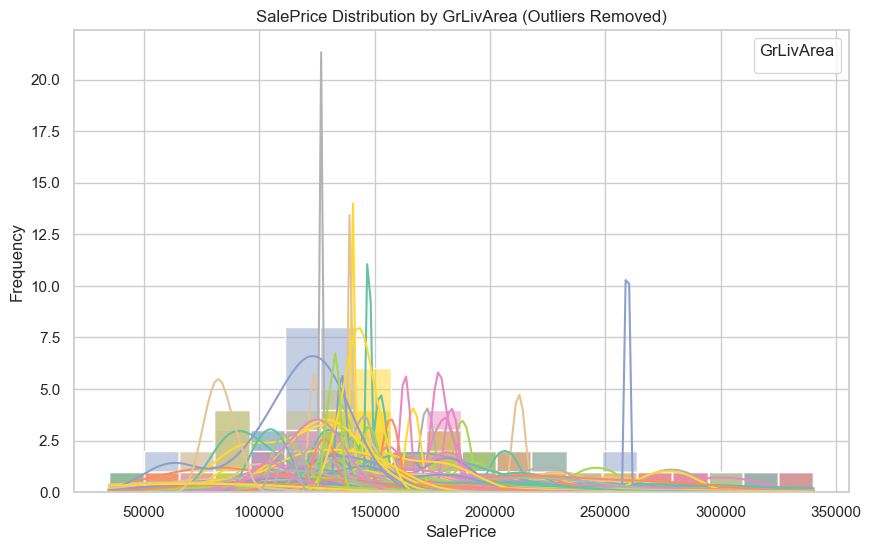

In [17]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_train = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_train, x='SalePrice', hue='GrLivArea', kde=True, bins=20,palette="Set2")
plt.title('SalePrice Distribution by GrLivArea (Outliers Removed)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(title='GrLivArea')
plt.show()

Similarly, the majority of GrLivArea or Above grade (ground) living area square feet which are between 1000-2000 square feet are also priced between 100000-150000.

Text(0.5, 0, 'GarageCars')

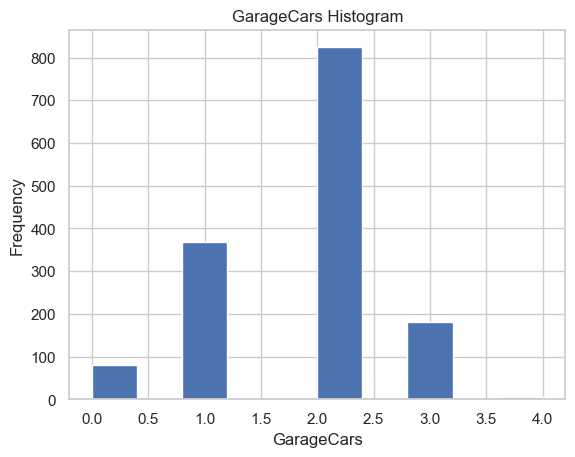

In [46]:
train['GarageCars'].plot.hist(title = 'GarageCars Histogram')
plt.xlabel('GarageCars')

The majority of GarageCars or Size of garage in car capacity is about 2 cars, followed by 1 car. It means that most of them owns car and at least owns 2 cars which can imply that many of them are families and each partner has their own car. Another theory is that one car is for intracity travel and another one is for intercity travel, or simply for two different purposes.   

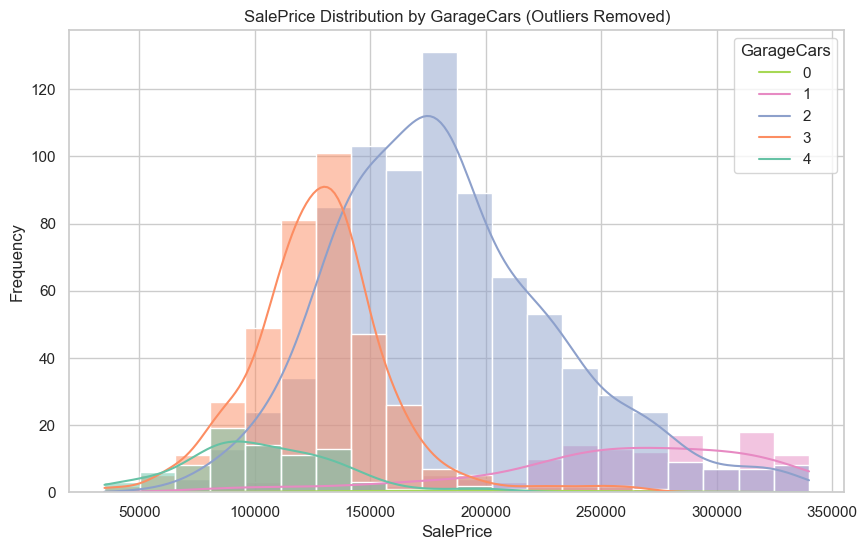

In [16]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_train = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_train, x='SalePrice', hue='GarageCars', kde=True, bins=20,palette="Set2")
plt.title('SalePrice Distribution by GarageCars (Outliers Removed)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(["0","1","2","3","4"],title='GarageCars')
plt.show()

The houses with GarageCars of 1 or 2 cars capacities represent the majority of them where the SalePrice ranges between 100000-250000. The higher capacity does translates to higher SalePrice.

Text(0.5, 0, 'GarageArea')

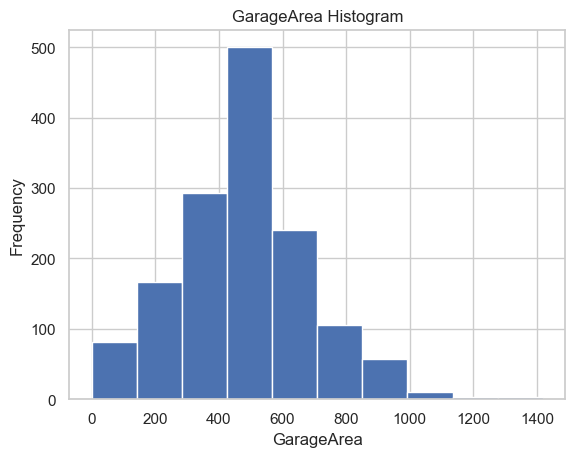

In [47]:
train['GarageArea'].plot.hist(title = 'GarageArea Histogram')
plt.xlabel('GarageArea')

More than a quarter has GarageArea between 400-600 square feet. This also related to GarageCars and most probably related to houses that can have 2 cars in the garage. The majority is between 300-700 square feet area which translates to 1-2 cars capacity.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


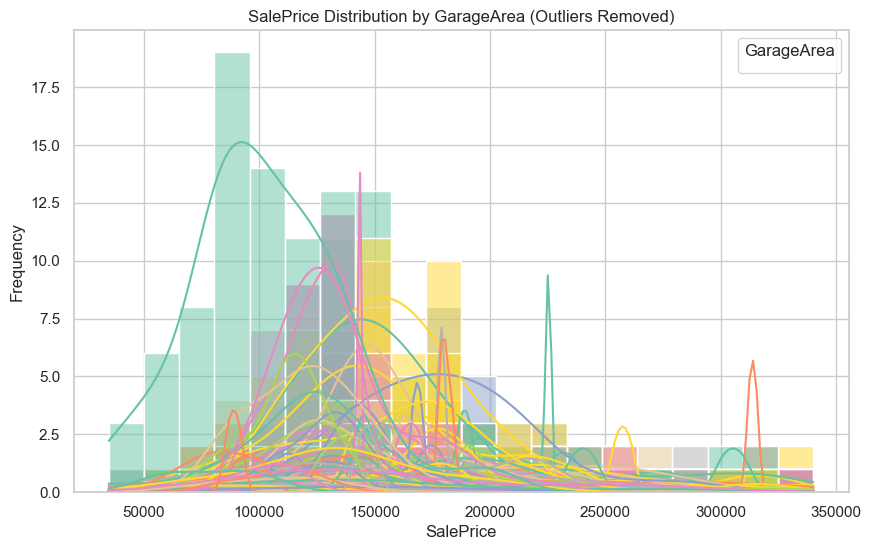

In [19]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_train = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_train, x='SalePrice', hue='GarageArea', kde=True, bins=20,palette="Set2")
plt.title('SalePrice Distribution by GarageArea (Outliers Removed)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(title='GarageArea')
plt.show()

From the graph, the majority SalePrice is between 80000-150000 which represents between 300-700 square feet area for GarageArea. The SalePrice increases with increasing GarageArea.

These are the variables that are strong correlated to SalePrice and can aid in predicting the missing SalePrice in the test dataset.